# Part I - Ford GoBike System Dataset Analysis
## by Ajani Ayooluwa

## Introduction
> In this project, I will be working with the Ford GoBike System dataset.
The dataset consists of information regarding the rides made in a bike-sharing system covering the greater San Francisco Bay area for the month of february in the year 2019. The dataset features include the duration of the trip, the time at which the trip started, the time at which the trip ended, the name of the station at which the passengers embarked and much more.<br>

## Preliminary Wrangling

In [1]:
# importing all packages and setting plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['figure.dpi'] = 400  # to improve image quality

**Importing The Dataset**

In [2]:
ride_data = pd.read_csv('./201902-fordgobike-tripdata.csv')

#Checking the shape of the dataset.
ride_data.shape

(183412, 16)


**Visual Assessment of the given dataset.**

In [3]:
ride_data.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

#### Programmatic Assessment of the given dataset.
**A concise summary of the data.**

In [4]:
ride_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

`Quality Issue:` Incorrect datatype, the start_time and end_time columns have the string datatype(i.e object) instead of the datetime datatype.<br>
`Quality Issue:` Incorrect datatype, member_birth_year, end_station_id and start_station_id columns have the float datatype instead of the Integer datatype.<br>

**Checking the percentage of missing values in each field in the data.**

In [5]:
ride_data.isnull().sum().sort_values(ascending=False) * 100/ride_data.shape[0]  

member_birth_year          4.506248
member_gender              4.506248
start_station_id           0.107408
start_station_name         0.107408
end_station_id             0.107408
end_station_name           0.107408
duration_sec               0.000000
start_time                 0.000000
end_time                   0.000000
start_station_latitude     0.000000
start_station_longitude    0.000000
end_station_latitude       0.000000
end_station_longitude      0.000000
bike_id                    0.000000
user_type                  0.000000
bike_share_for_all_trip    0.000000
dtype: float64

`Quality Issue:` The member_birth_year, member_gender, start_station_id, start_station_name, end_station_id and end_station_name have missing values and the rows contain the missing values will have to be dropped.

**Checking the number of unique values in each column**

In [6]:
ride_data.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

There are only 329 stations in dataset.


**Checking for duplicated rows**

In [7]:
ride_data.duplicated().sum()

0

There are no duplicated rows in that dataset.

**Checking the descriptive Statistics**

In [8]:
ride_data.describe()

duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.000000             37.770407   
50%                -122.398285      100.000000             37.781010   
75%                -122.286533      235.000000             37.797320   
max                -121.874119      398.000000             37.880222   

       end_station_longitude        bike_id  member_birth_year  
count          183412.000000  183412.000000      175147.000000  
mean             -122.352250    4472.906375        1984.806437  
std                 0.116673    1664.383394          10.116689  
min              -122.453704      11.000000        1878.000000  
25%              -122.411726    3777.000000        1980.000000  
50%              -122.398279    4958.000000        1987.000000  
75%              -122.288045    5502.000000        1992.000000  
max              -121.874119    6645.000000        2001.000000

The duration_sec column appears to have some outliers as the difference between the 75th percentile and the 100th percentile is quite alarming and requires further investigation.

## Data Cleaning

**<u>Issues Identified</u><br>**
1. Incorrect datatype, the start_time and end_time columns have the string datatype(i.e object) instead of the datetime datatype.
2. Missing Values in the member_birth_year, member_gender, start_station_id, start_station_name, end_station_id and end_station_name column.
3. Incorrect datatype, member_birth_year, end_station_id and start_station_id columns have the float datatype instead of the Integer datatype.

**Making a copy of the Ride Dataframe**

In [9]:
ride_data_copy = ride_data.copy()

**Define**<br>
Incorrect datatype, the start_time and end_time columns have the string datatype(i.e object) instead of the datetime datatype.<br>
- Use the to_datetime method to correct that datatype of the start_time and end_time columns

**Code**

In [10]:
ride_data_copy['start_time'] = pd.to_datetime(ride_data_copy['start_time'])
ride_data_copy['end_time'] = pd.to_datetime(ride_data_copy['end_time'])

**Test**

In [11]:
#Checking the datatype of the start_time and end_time columns
ride_data_copy[['start_time', 'end_time']].dtypes

start_time    datetime64[ns]
end_time      datetime64[ns]
dtype: object

**Define**<br>
Missing Values in the member_birth_year, member_gender, start_station_id, start_station_name, end_station_id and end_station_name columns.
- Use the dropna method to drop the rows with missing values in the member_birth_year, member_gender, start_station_id, start_station_name, end_station_id and end_station_name columns.

**Code**

In [12]:
ride_data_copy.dropna(subset=['member_birth_year', 'member_gender', 'start_station_id',
                              'start_station_name', 'end_station_id', 'end_station_name'],
                      inplace=True)

**Test**

In [13]:
ride_data_copy.isnull().any().sum()

0

**Define**<br>
Incorrect datatype, member_birth_year, end_station_id and start_station_id columns have the float datatype instead of the Integer datatype.
- Use the astype method to correct the datatype.

**Code**

In [14]:
# CHANGING THE DATATYPE OF THE COLUMNS
ride_data_copy['member_birth_year'] = ride_data_copy['member_birth_year'].astype(int)
ride_data_copy['start_station_id'] = ride_data_copy['start_station_id'].astype(int)
ride_data_copy['end_station_id'] = ride_data_copy['end_station_id'].astype(int)

**Test**

In [15]:
ride_data_copy[['member_birth_year', 'start_station_id', 'end_station_id']].dtypes

member_birth_year    int32
start_station_id     int32
end_station_id       int32
dtype: object

**The structure of the dataset**<br>
There were initially 183,412 rides in the dataset with 16 features which was later dropped to 174952 rides observations after data cleaning. It has 5 categorical columns, 2 datetime columns and 9 numerical columns, totalling at only 16 columns in all.

**The main feature of interest in the dataset**<br>
I am most interested in the how and what makes the duration of the trips longer or shorter.

**The features in the dataset support my investigation into the ride duration feature**<br>
I believe that the user type, gender, member birth year, bike share variables will help provide the much needed information for my investigation into the trip duration of the riders.

# EXPLORATION DATA ANALYSIS
## Univariate Exploration
#### What is the average trip duration?

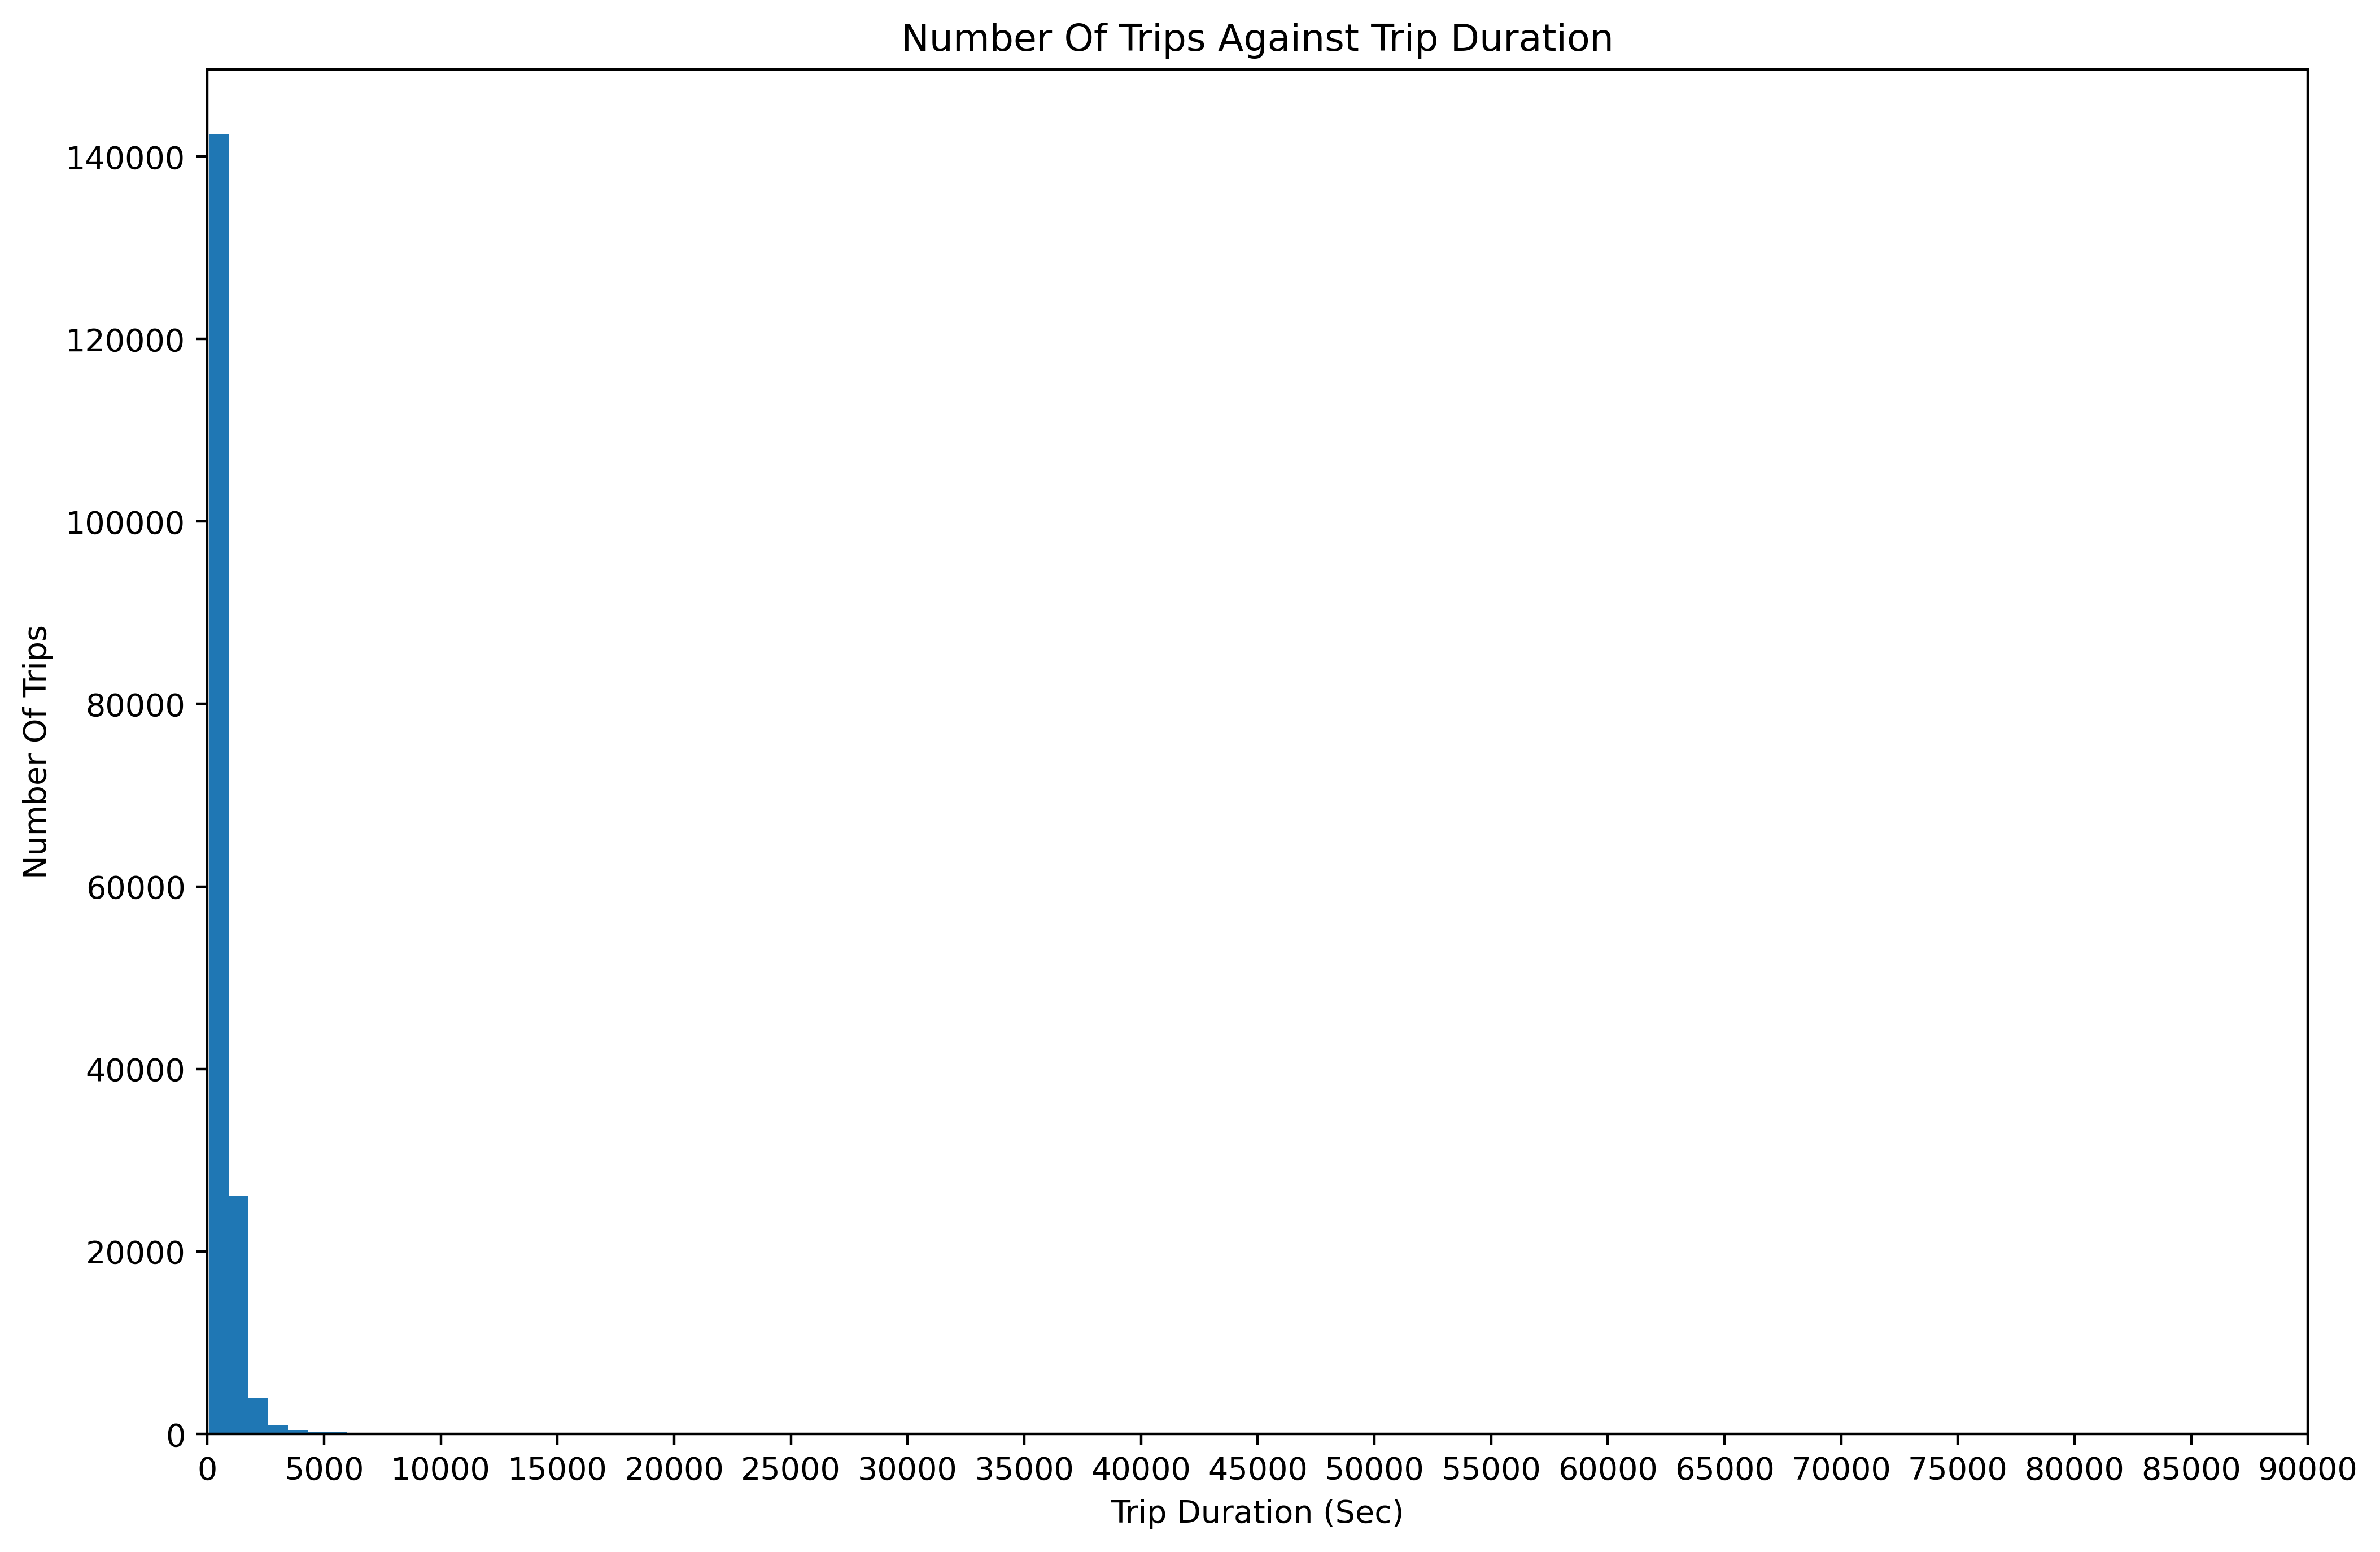

In [16]:
ride_data_copy['duration_sec'].hist(grid=False, bins=100)
plt.xlabel("Trip Duration (Sec)")
plt.ylabel("Number Of Trips")
plt.title("Number Of Trips Against Trip Duration")
ticks = np.arange(0,95000, 5000)
plt.xticks(ticks, ticks)
plt.xlim(left=-1);

**Observations**<br>
>From the graph above, it is clear that most of the values in the ride duration column fall in the range of 0 and 7000 seconds and the graph is right skewed. There are no nulls in the columns but ride duration column appears to have some outliers which we should investigated further. Let’s start by checking the cases where rides has a duration of over 7000  seconds.

In [17]:
ride_data_copy.query("duration_sec >= 7000").head()

duration_sec              start_time                end_time  \
0           52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
2           61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3           36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
199         15123 2019-02-28 18:23:19.035 2019-02-28 22:35:22.294   
297         13061 2019-02-28 18:28:18.728 2019-02-28 22:05:59.954   

     start_station_id                                start_station_name  \
0                  21  Montgomery St BART Station (Market St at 2nd St)   
2                  86                           Market St at Dolores St   
3                 375                           Grove St at Masonic Ave   
199                28                      The Embarcadero at Bryant St   
297                19                              Post St at Kearny St   

     start_station_latitude  start_station_longitude  end_station_id  \
0                 37.789625              -122.400811              13   
2                 37.769305              -122.426826               3   
3                 37.774836              -122.446546              70   
199               37.787168              -122.388098             368   
297               37.788975              -122.403452              19   

                                 end_station_name  end_station_latitude  \
0                  Commercial St at Montgomery St             37.794231   
2    Powell St BART Station (Market St at 4th St)             37.786375   
3                          Central Ave at Fell St             37.773311   
199                          Myrtle St at Polk St             37.785434   
297                          Post St at Kearny St             37.788975   

     end_station_longitude  bike_id   user_type  member_birth_year  \
0              -122.402923     4902    Customer               1984   
2              -122.404904     5905    Customer               1972   
3              -122.444293     6638  Subscriber               1989   
199            -122.419622     5380  Subscriber               1980   
297            -122.403452     5830  Subscriber               1987   

    member_gender bike_share_for_all_trip  
0            Male                      No  
2            Male                      No  
3           Other                      No  
199          Male                      No  
297          Male                      No

In [18]:
ride_data_copy.query("duration_sec >= 7000").count()[0]

557

>There are 557 cases where the ride durations are above 7000 seconds, this might be due to interstate trips. We need to zoom into those cases below 7000 to have a better grasp of the data. 

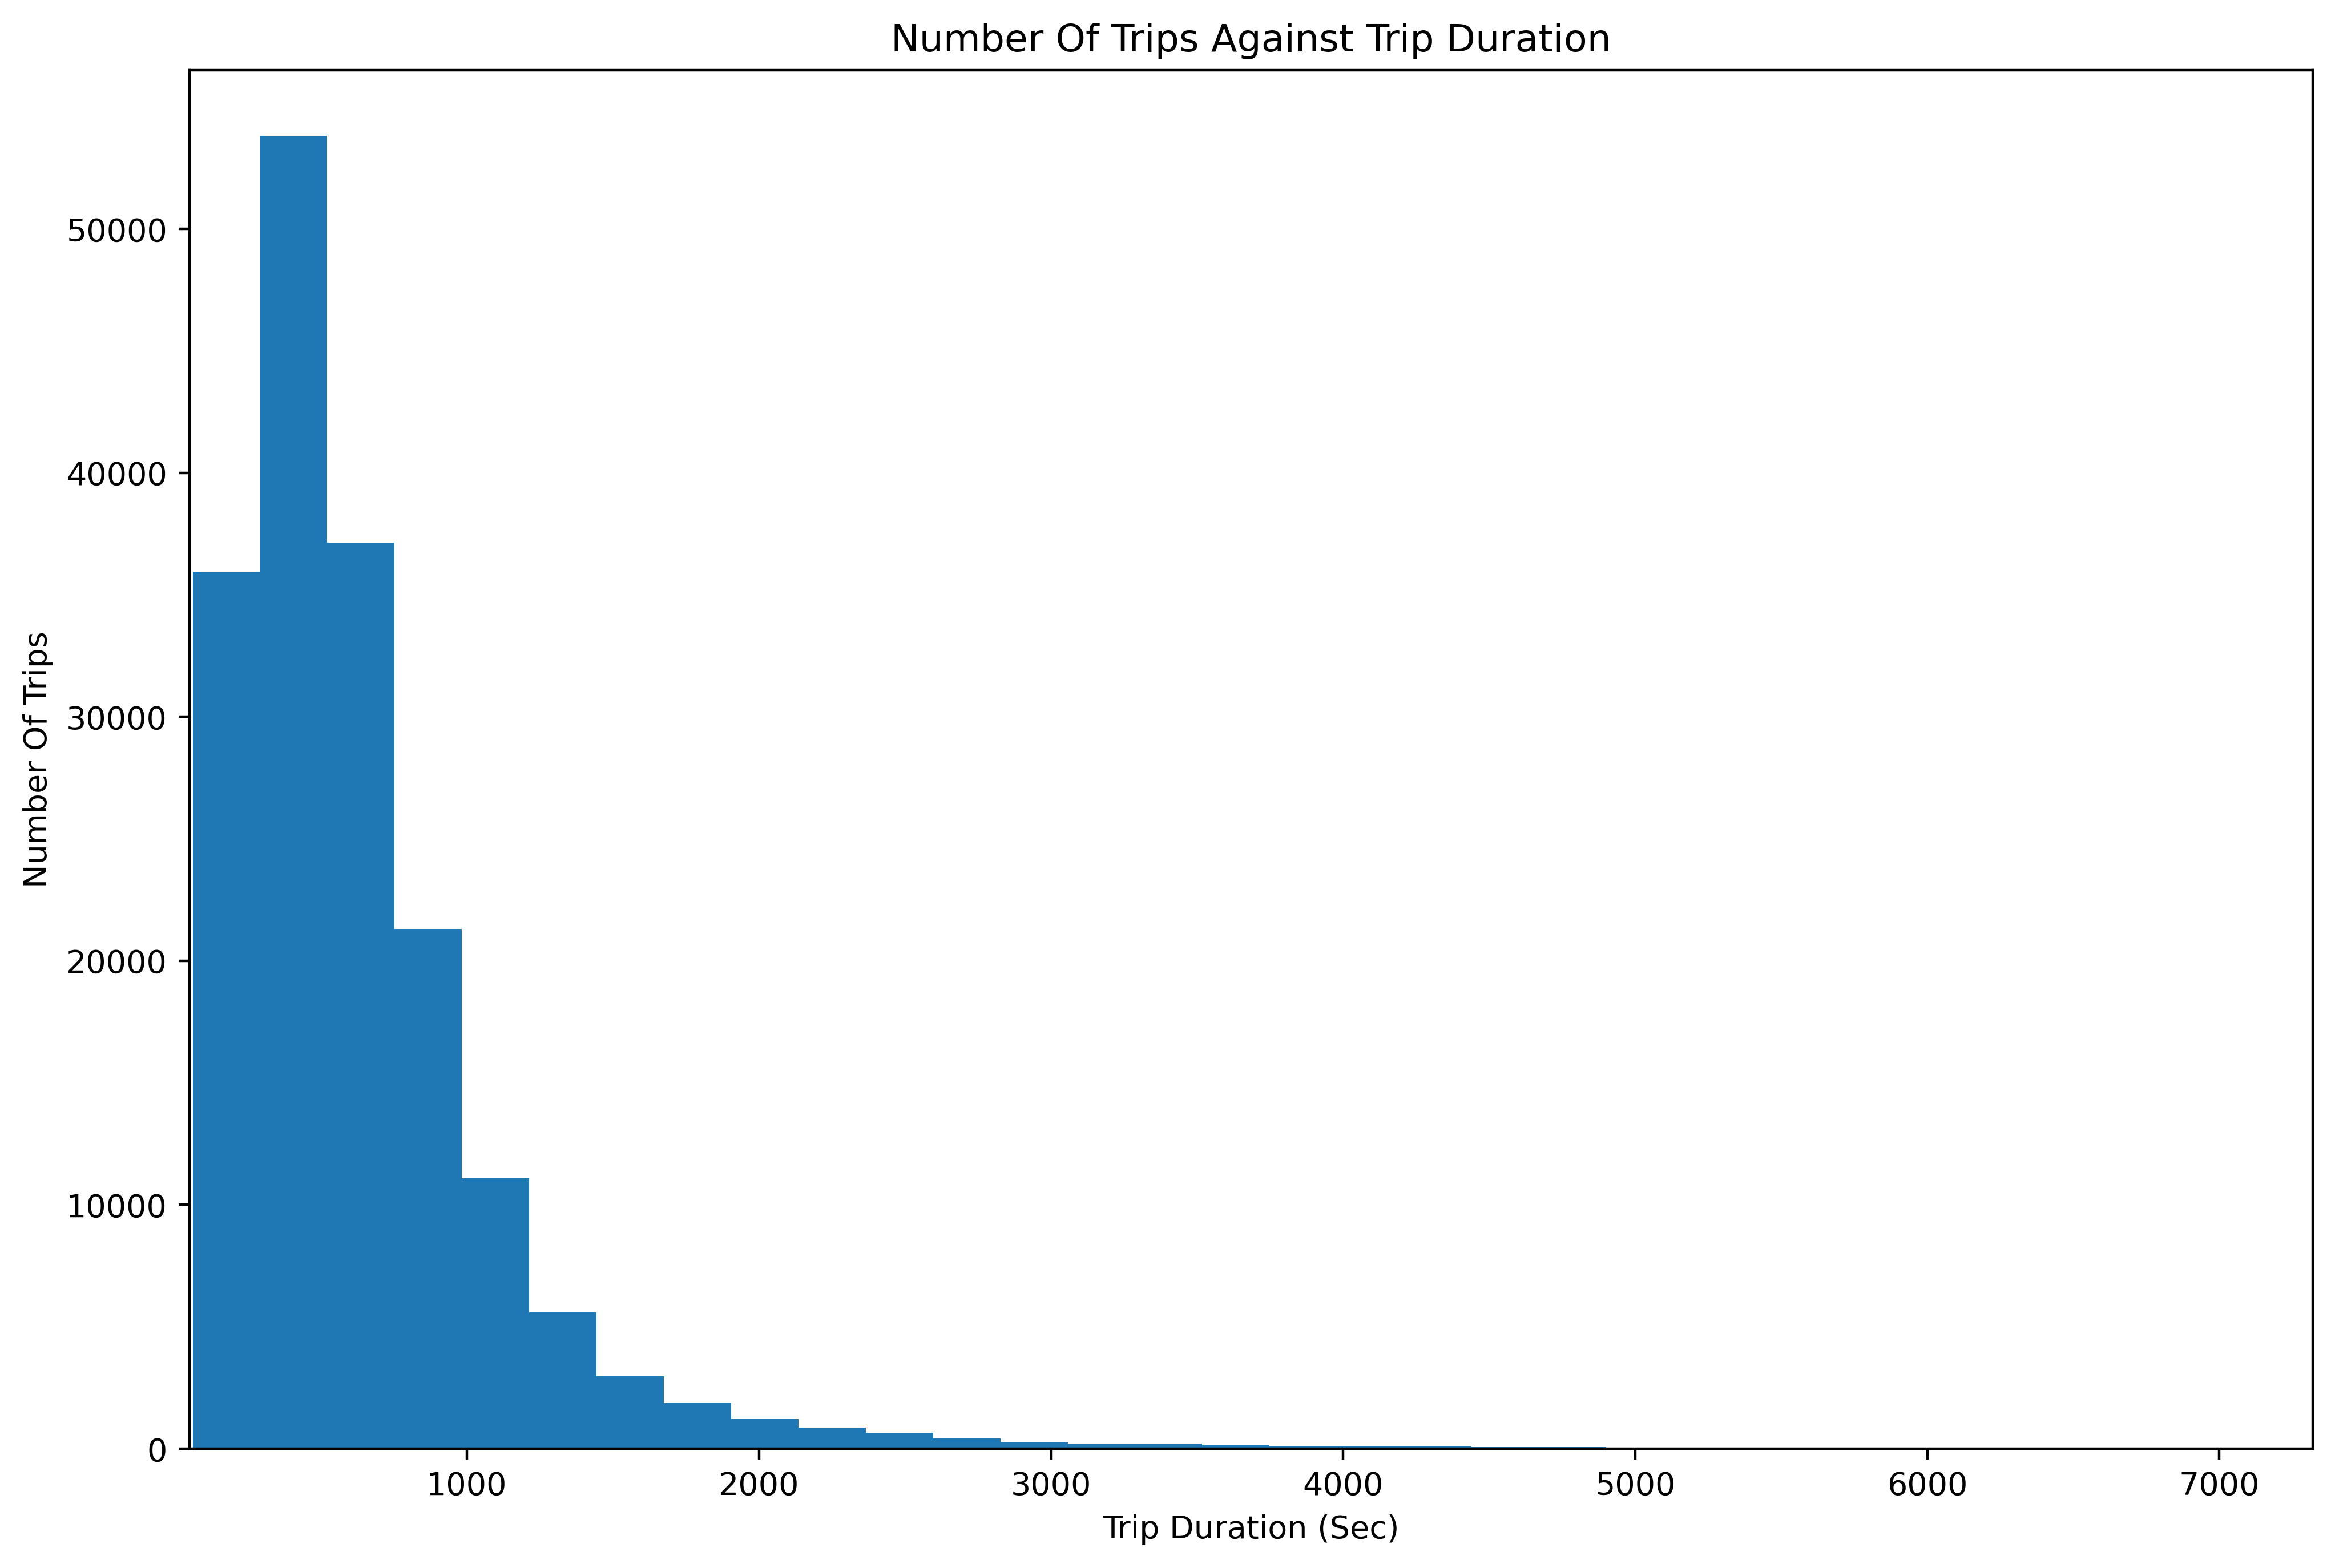

In [19]:
# Plotting graph where ride duration is below 7000 seconds
duration = ride_data_copy.query("duration_sec < 7000") 
duration['duration_sec'].hist(grid=False, bins=30)
plt.xlabel("Trip Duration (Sec)")
plt.ylabel("Number Of Trips")
plt.title("Number Of Trips Against Trip Duration")
plt.xlim(left=50);

>The skewness is easier to view now. The values in the graph are too widely spread, they will require an axis transformation to fully have a grasp on the data.

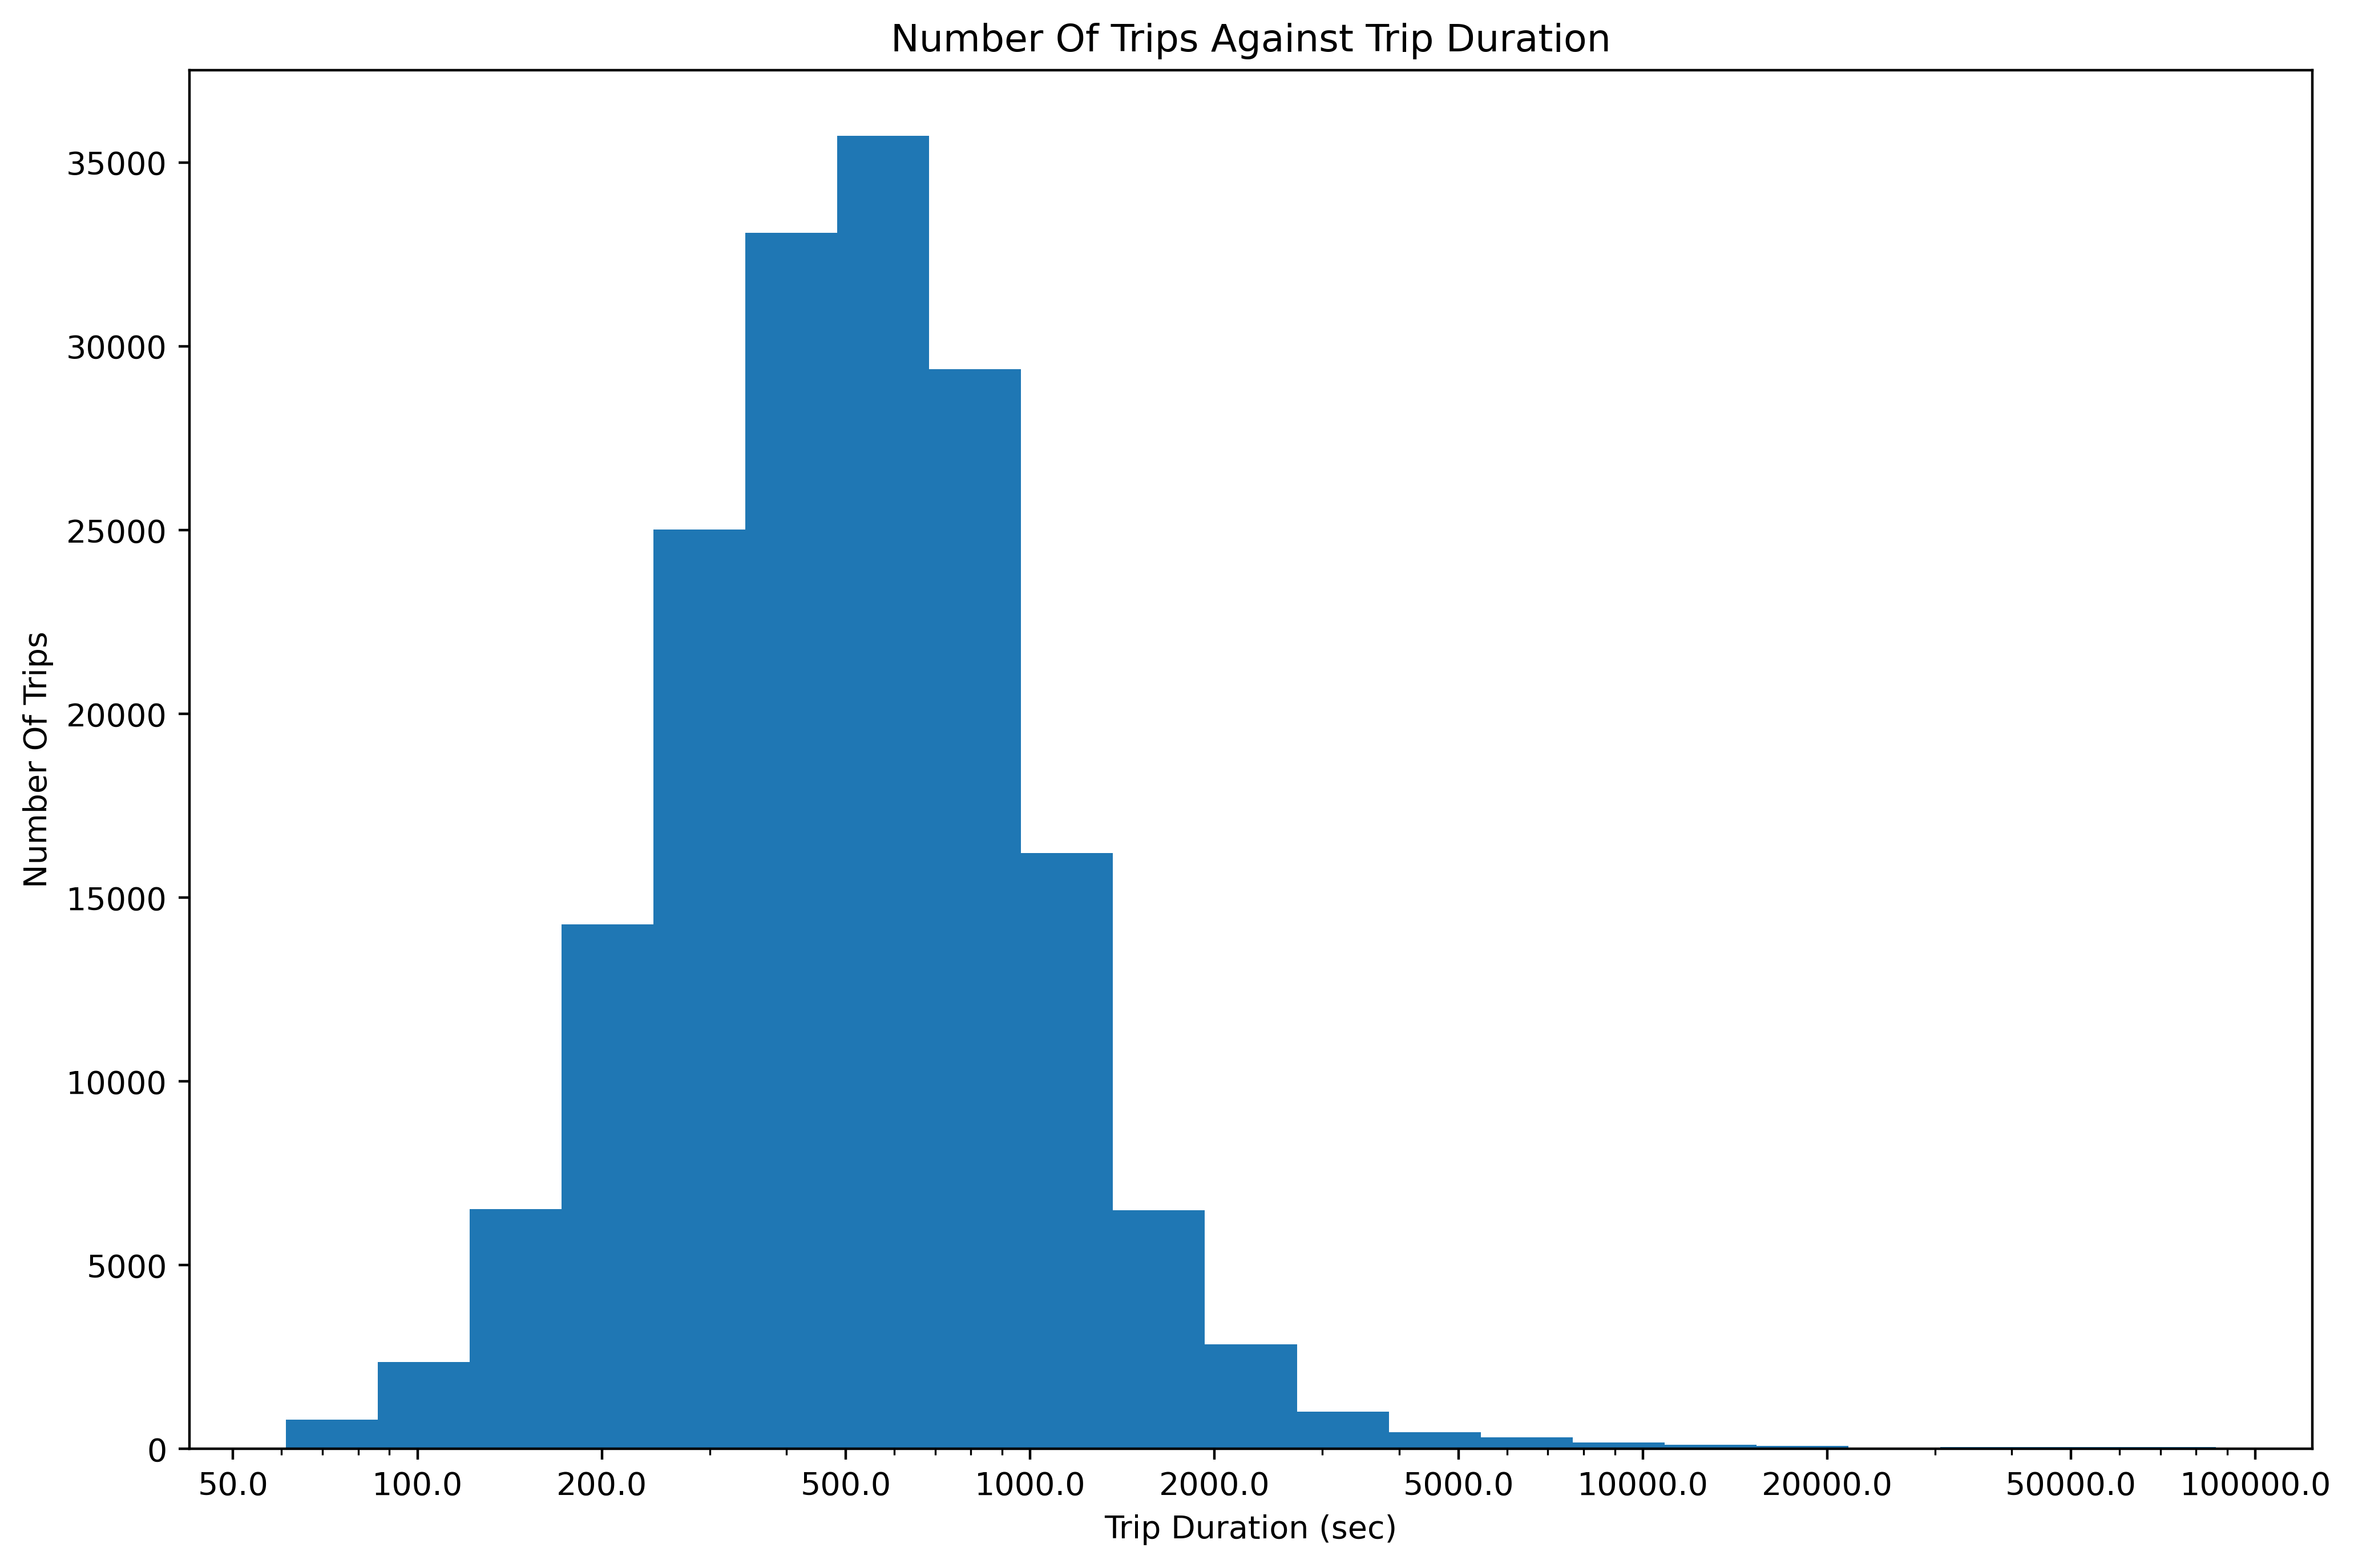

In [20]:
## Creating the bin edges
Ride = ride_data_copy['duration_sec']
minimum_edge, maximum_edge, bin_size = np.log10(Ride.min()), np.log10(Ride.max()), 0.15
bin_edges = 10 ** np.arange(minimum_edge, maximum_edge+bin_size, bin_size)
xticks = [5e1,1e2, 2e2, 5e2, 1e3, 2e3, 5e3, 1e4, 2e4, 5e4, 1e5]

ride_data_copy['duration_sec'].hist(grid=False, bins=bin_edges)
plt.xscale('log')  ## Performing logarithmic axis transformation
plt.xticks(xticks, xticks)
plt.xlabel("Trip Duration (sec)")
plt.ylabel("Number Of Trips")
plt.title("Number Of Trips Against Trip Duration");

**Observation**<br>
>The values in the ride duration column below are not normally distributed on the logarithmic scaling of the x-axis having most trips between 100 and 2000 seconds long and a peak at about 500 seconds.


#### Which gender took the highest number of trips?

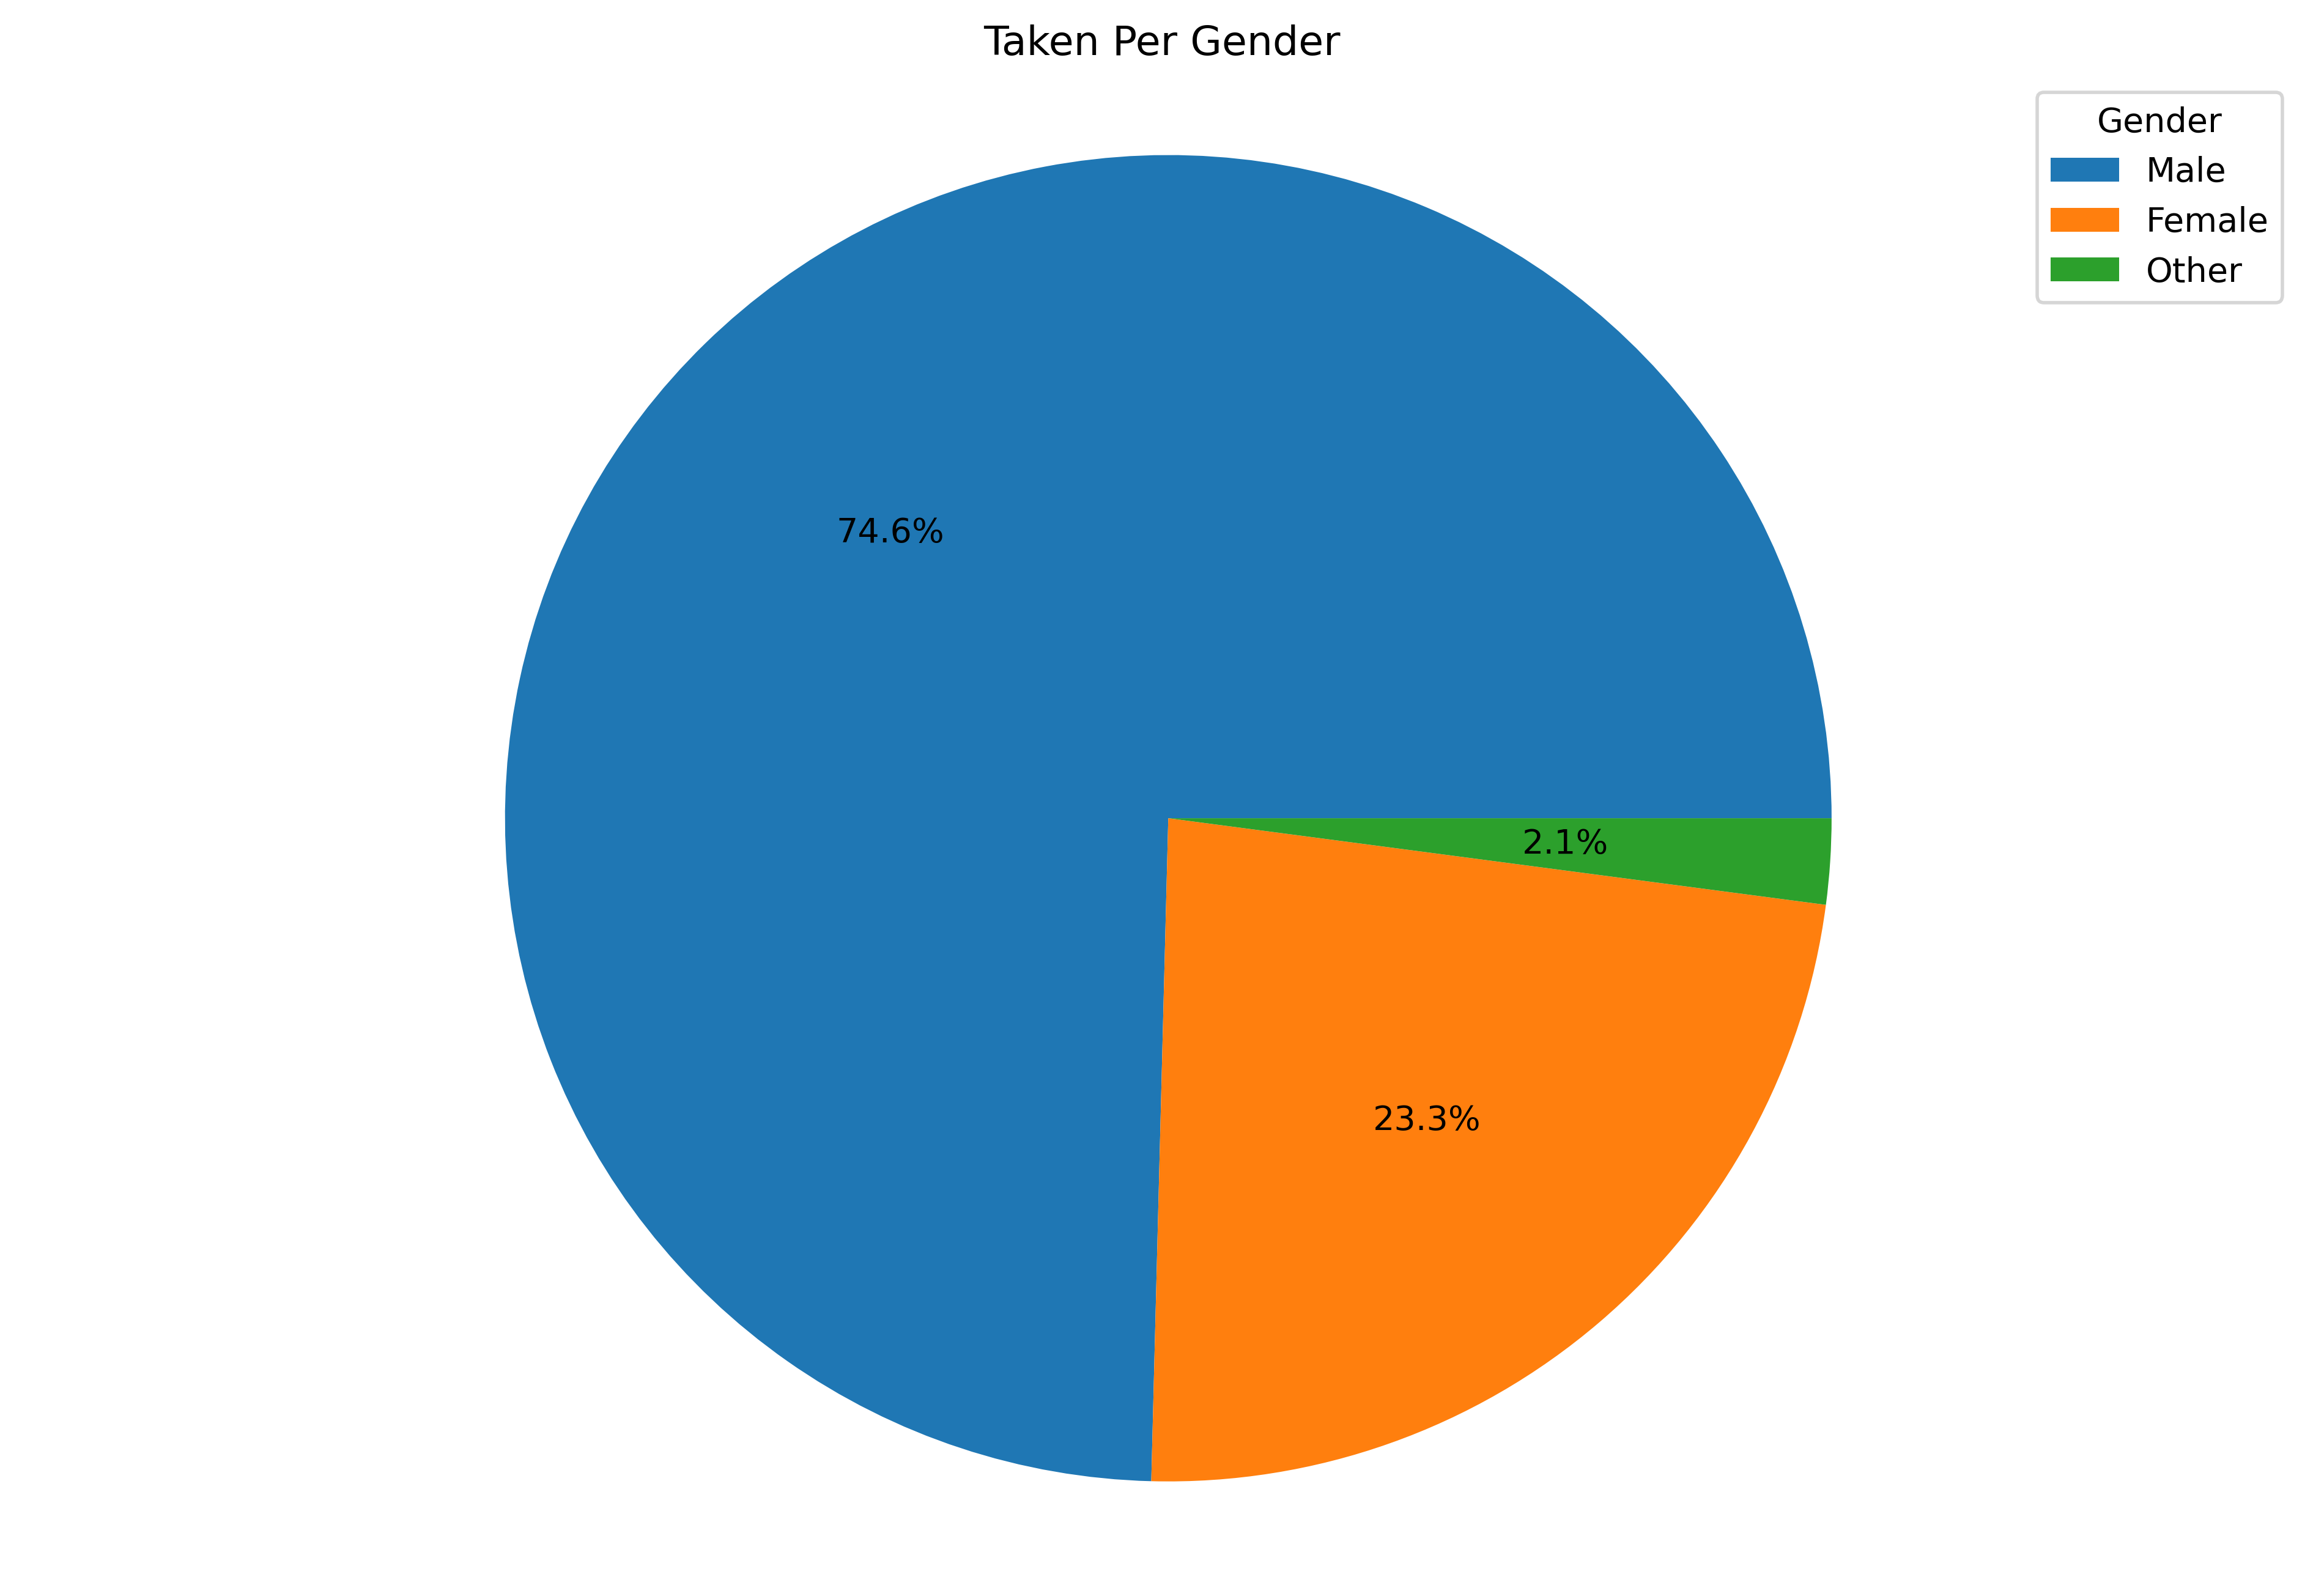

In [21]:
gender = ride_data_copy.member_gender.value_counts()
plt.pie(x=gender.values, autopct='%1.1f%%')
plt.axis('equal')
plt.title("Taken Per Gender")
plt.legend(title='Gender',  labels=gender.index);

**Observation**<br>
>There is a higher percentage of trips taken by males riders than any other gender.


#### Do more riders generally share bikes for the trips embarked on?

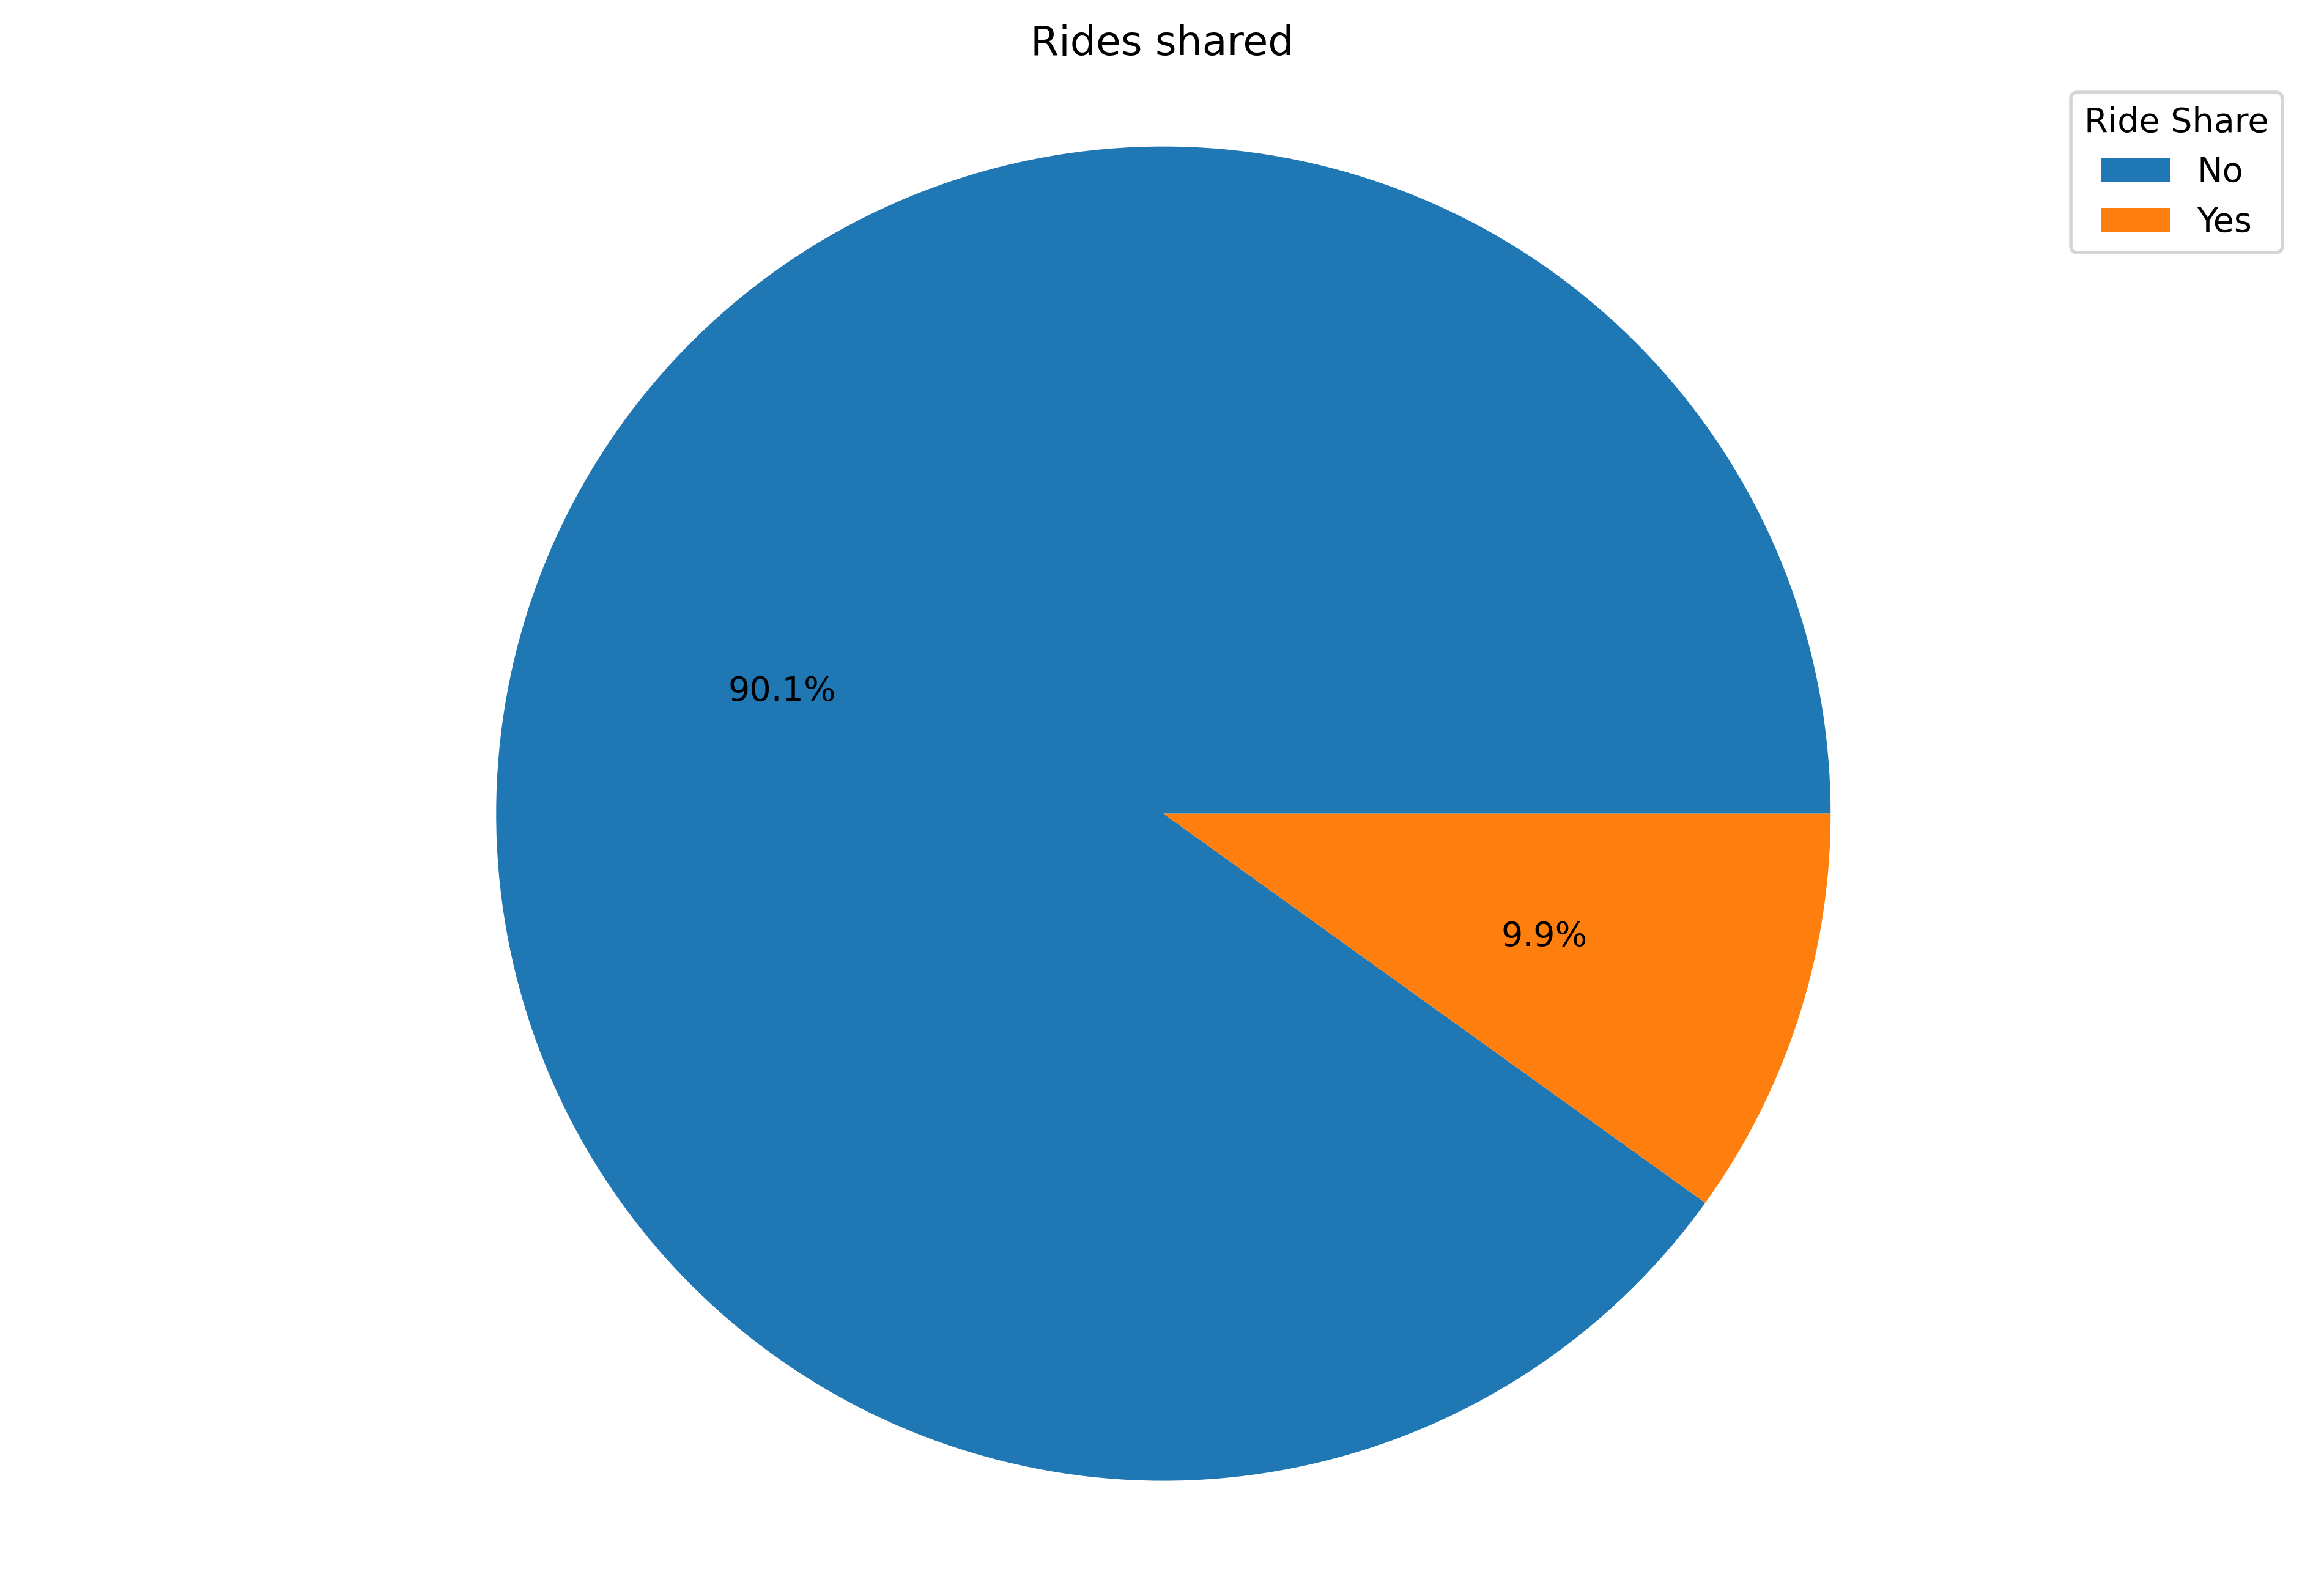

In [22]:
share = ride_data_copy.bike_share_for_all_trip.value_counts()
plt.pie(x=share.values, autopct='%1.1f%%')
plt.title("Rides shared")
plt.axis('equal')
plt.legend(title='Ride Share', labels=share.index);

**Observation**<br>
>There is a huge difference between the number of riders who share the bikes with others and those that do not. It is clear to see that riders generally do not share the bikes with others during their trips.


#### What is the name of the station where the most people got in?

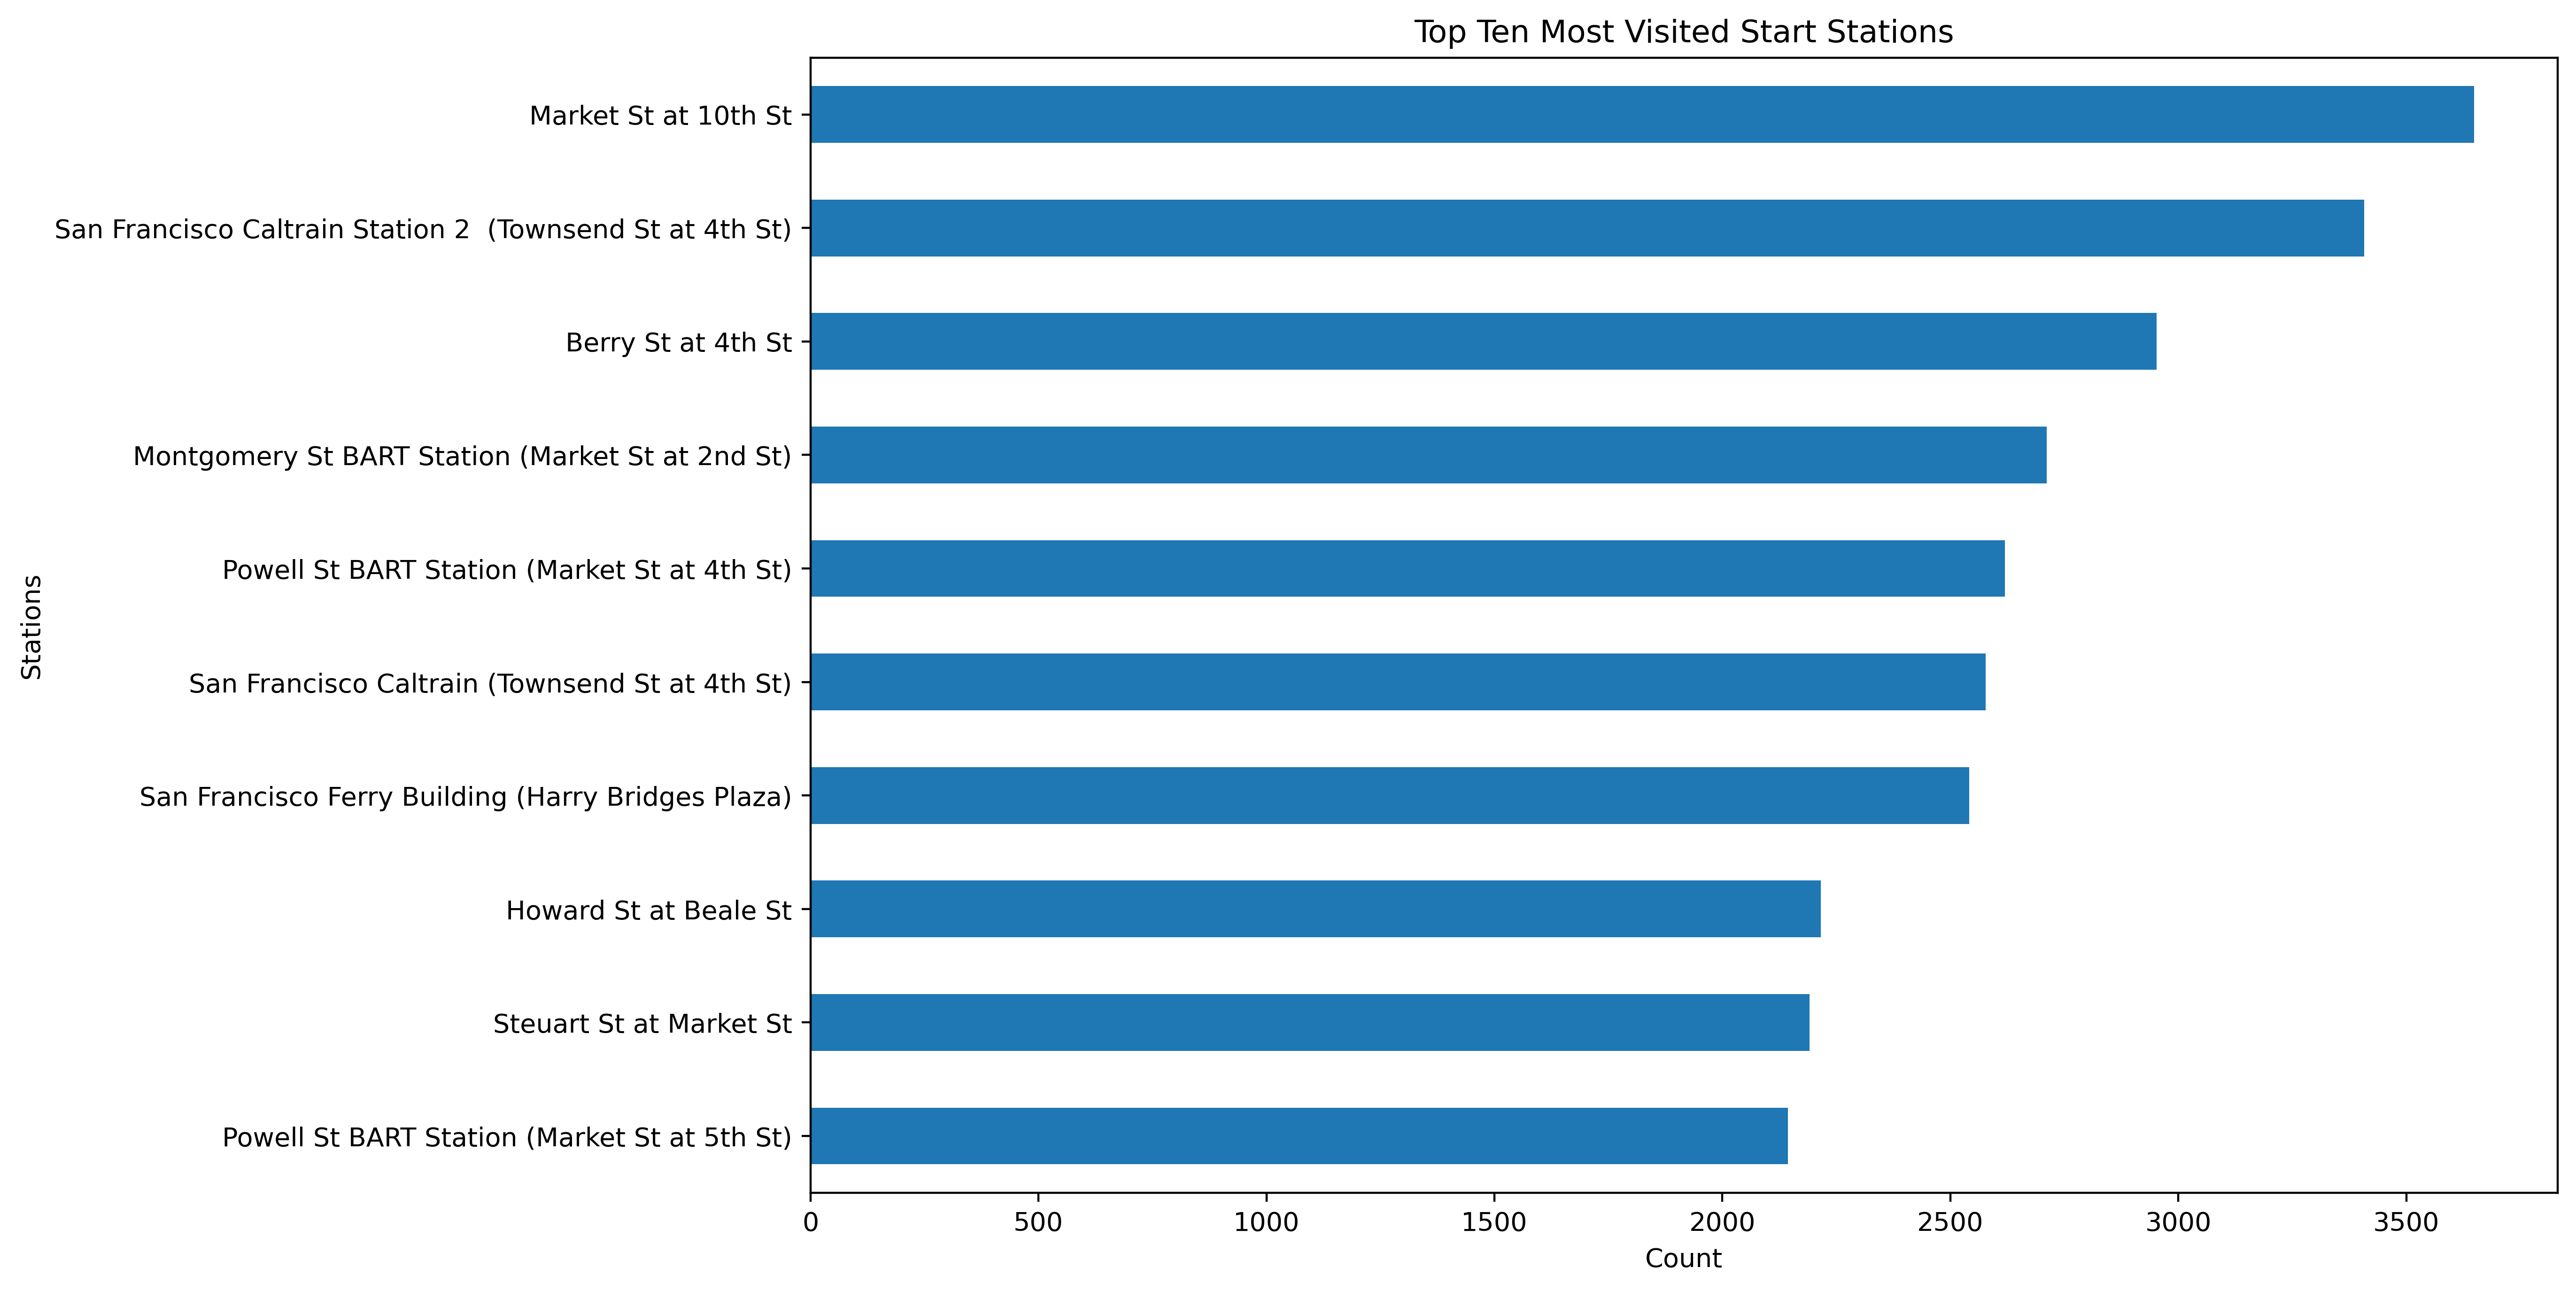

In [23]:
ride_data_copy.groupby('start_station_name').count()['start_station_id']\
.sort_values(ascending=False)[:10][::-1].plot(kind='barh')
plt.ylabel('Stations')
plt.xlabel('Count')
plt.title('Top Ten Most Visited Start Stations');

**Observation**<br>
>The most customers got on at the Market Station at 10th street, this is most likely a station closest to a high populated residential area.

#### What is the name of the end station where the most people got off?

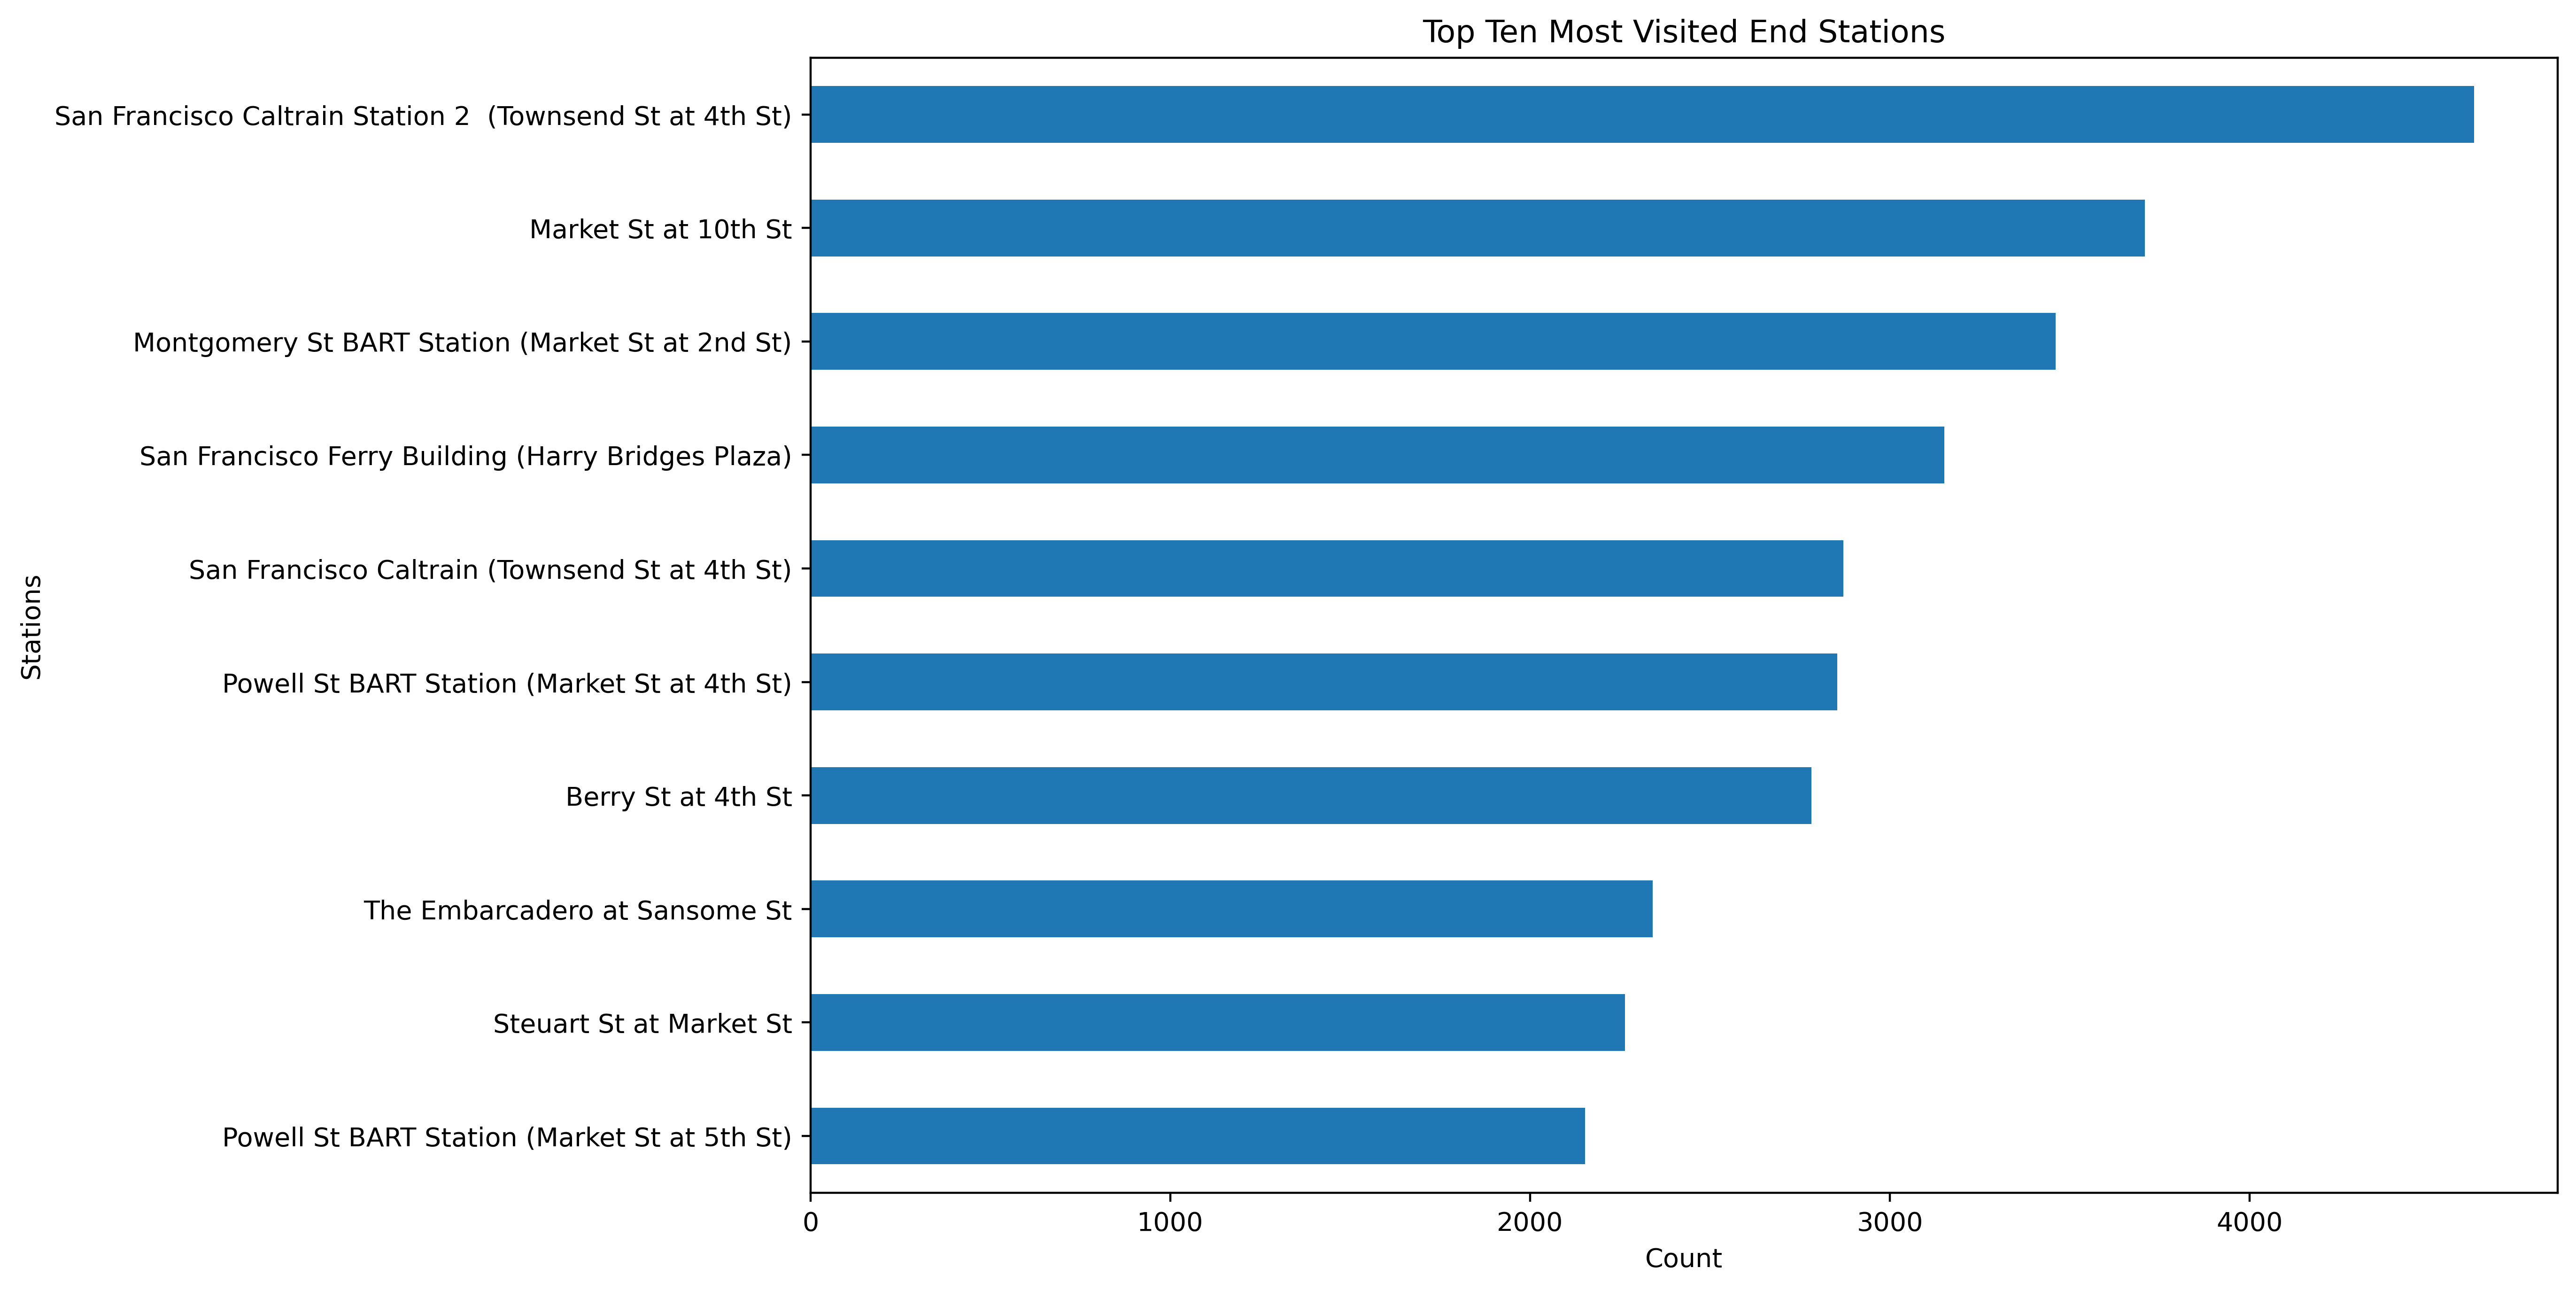

In [24]:
ride_data_copy.groupby('end_station_name').count()['start_station_id']\
.sort_values(ascending=False)[:10][::-1].plot(kind='barh')
plt.ylabel('Stations')
plt.xlabel('Count')
plt.title('Top Ten Most Visited End Stations');

**Observation**<br>
>The station where the most people departed at is San Francisco Caltrain Station 2  (Townsend St at 4th St), which is the station where the second highest number of people got on.

#### Does age affect the number of rides embarked on?

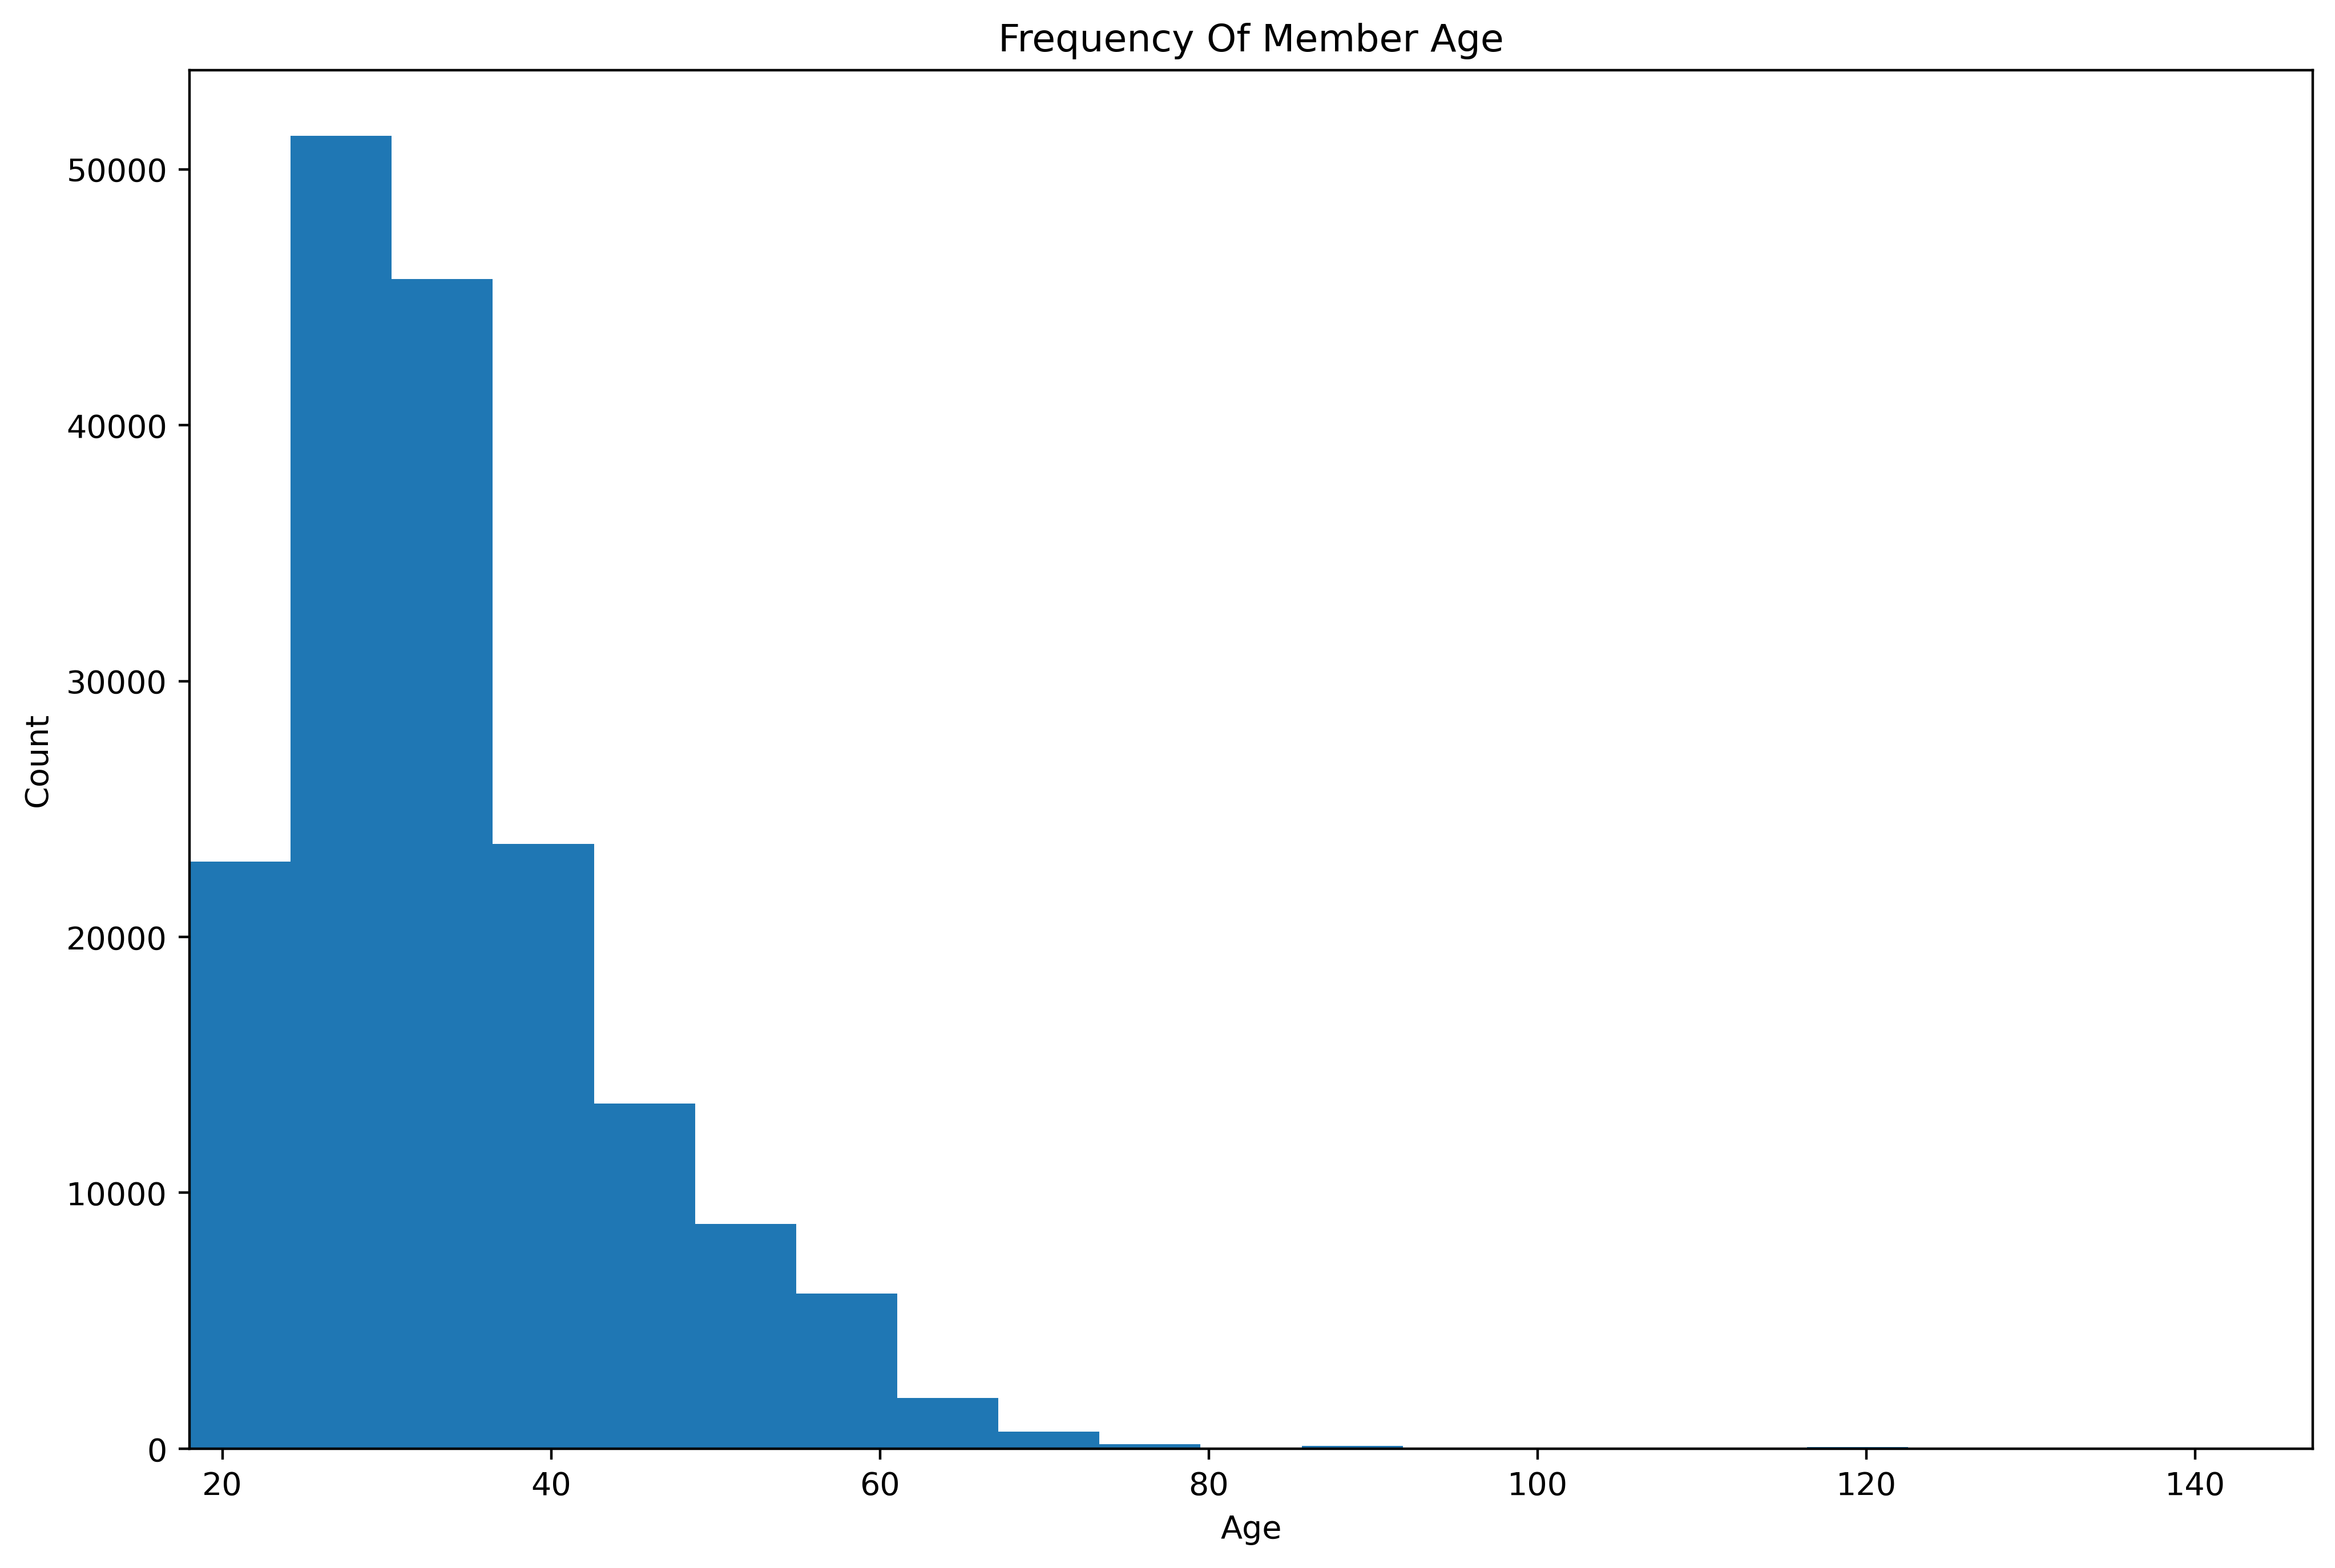

In [25]:
# Creating a new column (Age) that stores the riders age.
ride_data_copy['age'] = 2019 - ride_data_copy.member_birth_year


ride_data_copy.age.hist(grid=False, bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Frequency Of Member Age')
plt.xlim(left = 18);

**Observation**<br>
>From the graph above, it is clear that the active members are between 18 and 50 years. The graph is left skewed. The column appears to have some outliers which we should investigate further. Let’s start by investigating the case where members are 100 years or older.

In [26]:
ride_data_copy.query("member_birth_year < 1920").count()[0]

72

>There is only 72 instance where the members are 100 years or older. The dataset was gathered in the month of february 2019, it is unlikely for individuals over the age of 100 to actually go on the bike trips considering the fact that they are aging and their bodies are not as agile. The ages greater than 100 are outliers and need to be dropped as they are inaccurate and might affect further analysis that will be carried out.

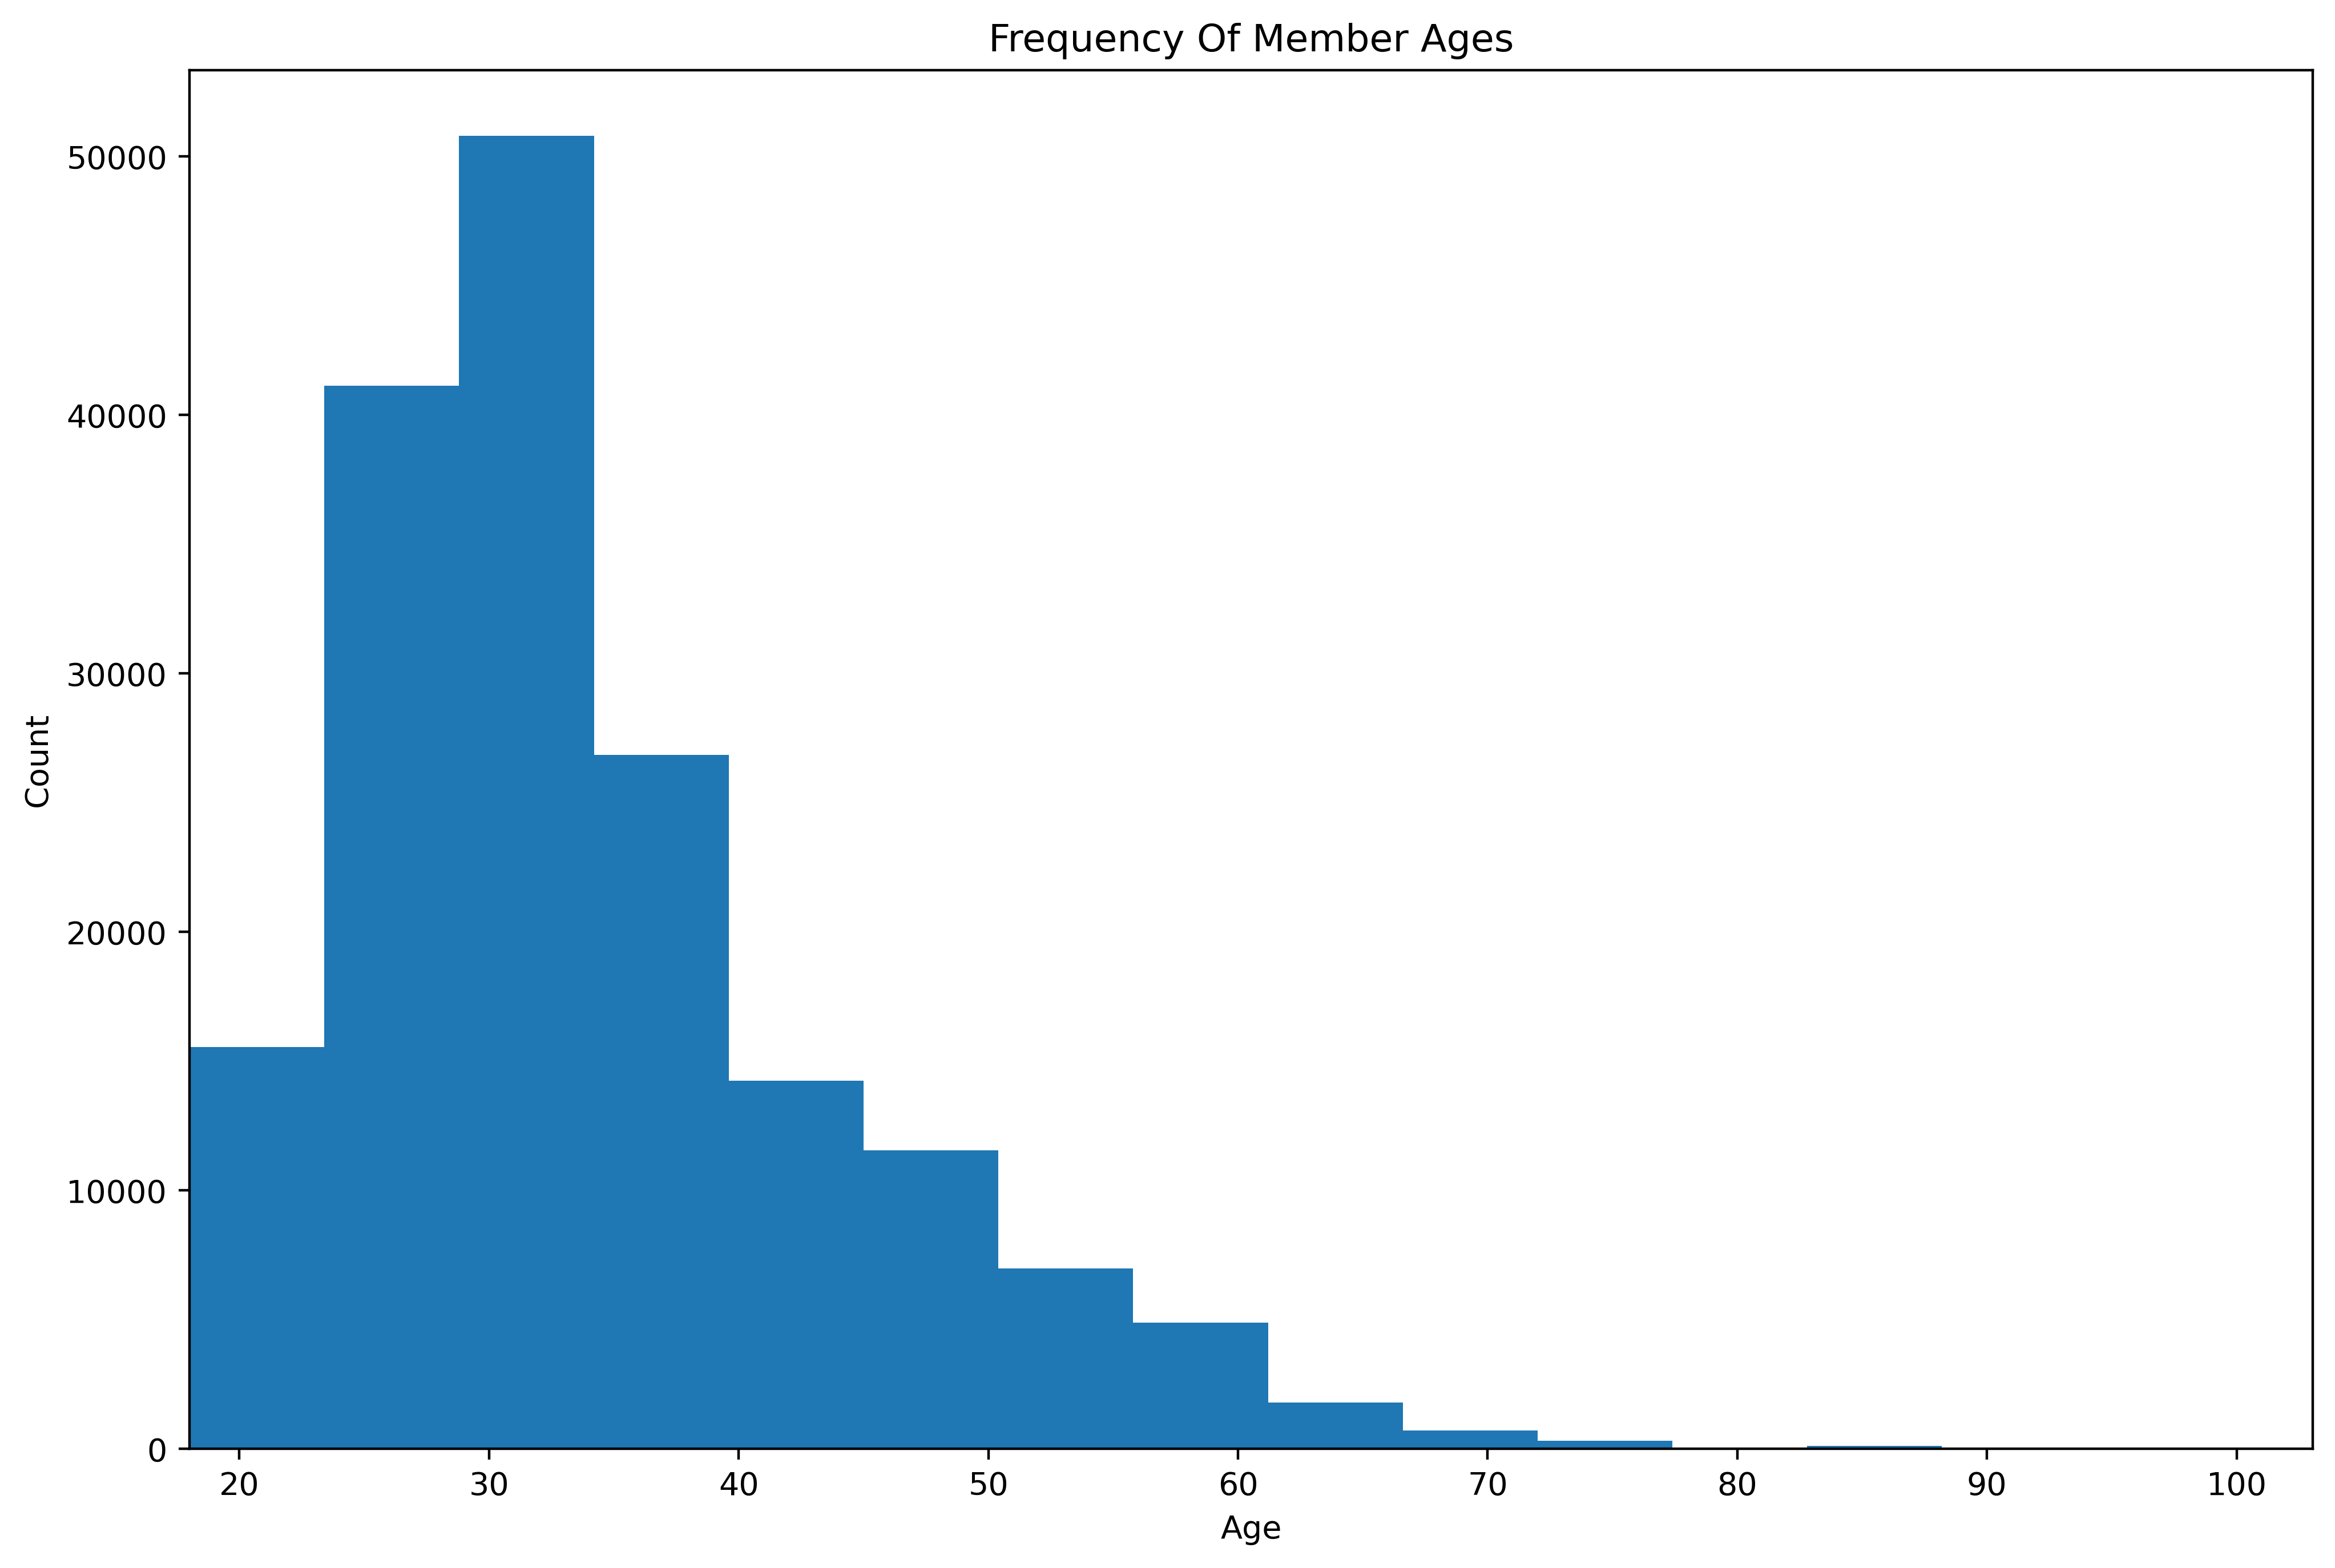

In [27]:
# dropping rows where the members are 100 years or older.
ride_data_copy = ride_data_copy.query("member_birth_year >= 1920")

# Replotting graph
ride_data_copy.age.hist(grid=False, bins=15)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Frequency Of Member Ages')
plt.xlim(left = 18);

#### Which user type takes the most trips?

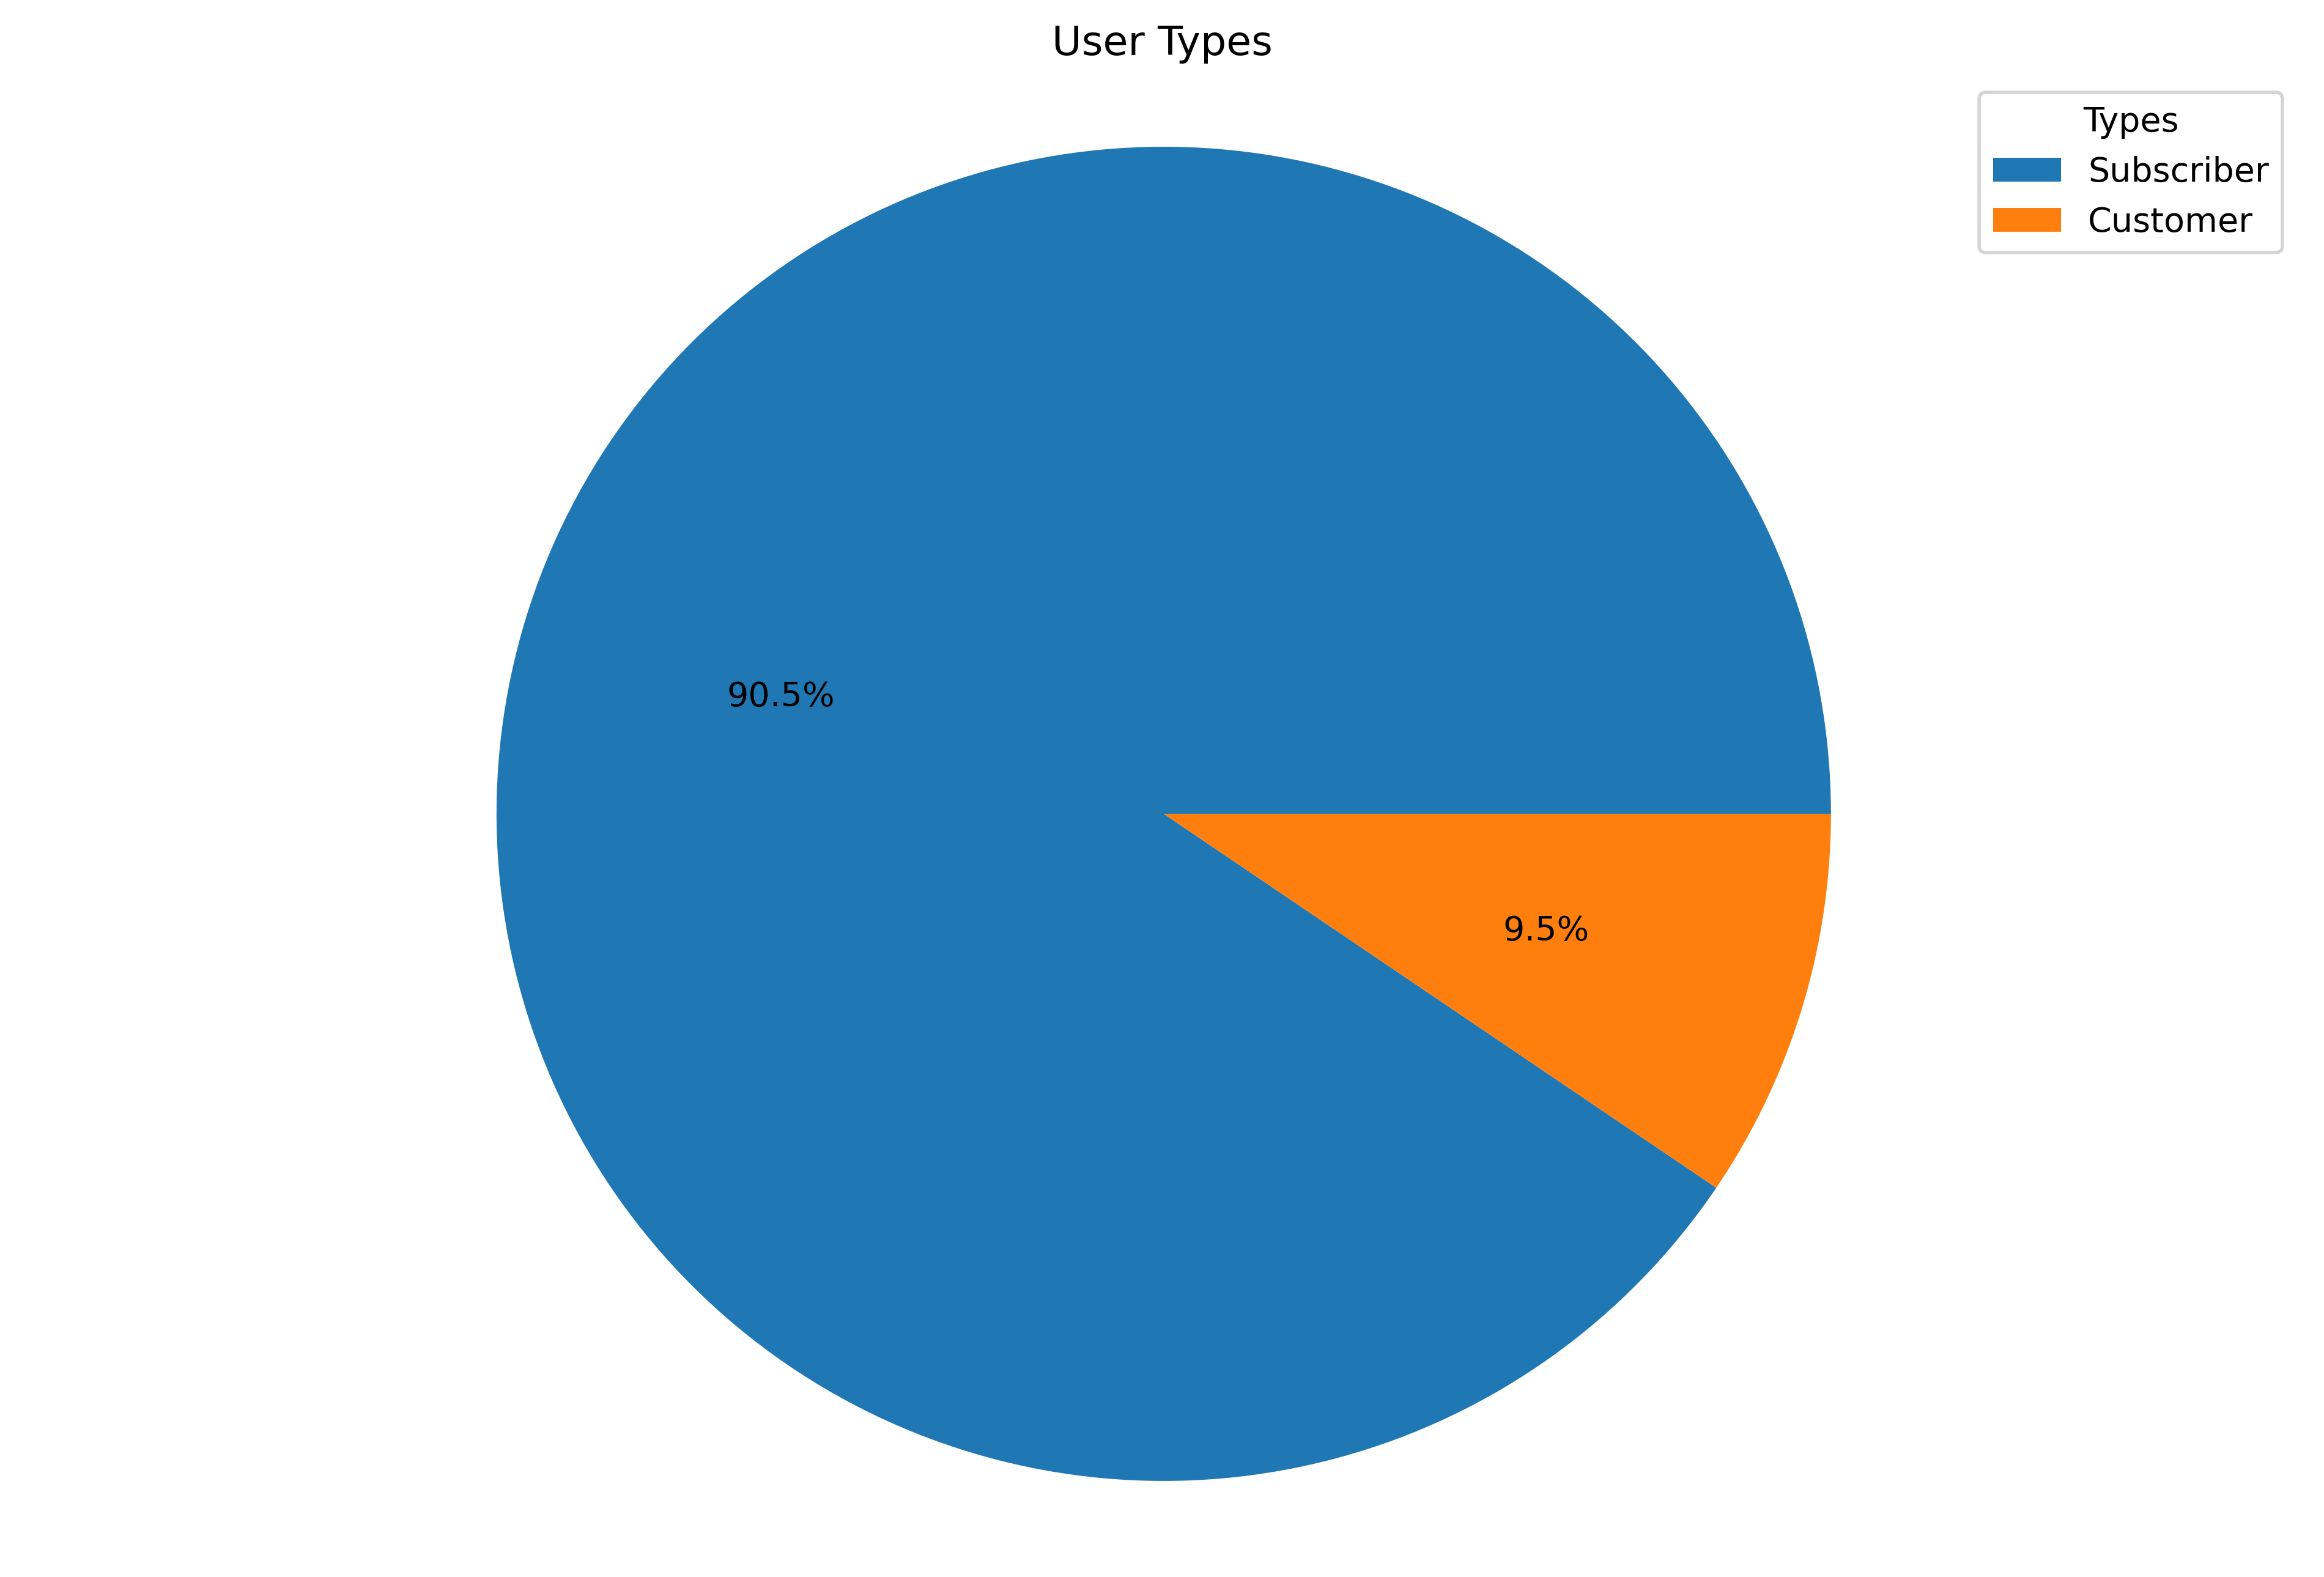

In [28]:
user = ride_data_copy.user_type.value_counts()

plt.pie(x=user.values, autopct='%1.1f%%')
plt.axis('equal')
plt.title("User Types")
plt.legend(title='Types',labels=user.index);

**Observation**<br>
>There is a huge difference between the number of people who are subscribers and those who are not. It is clear to see that people generally are subcribers. The Subscriber riders took the most trips.

#### What is the busiest day of the week?

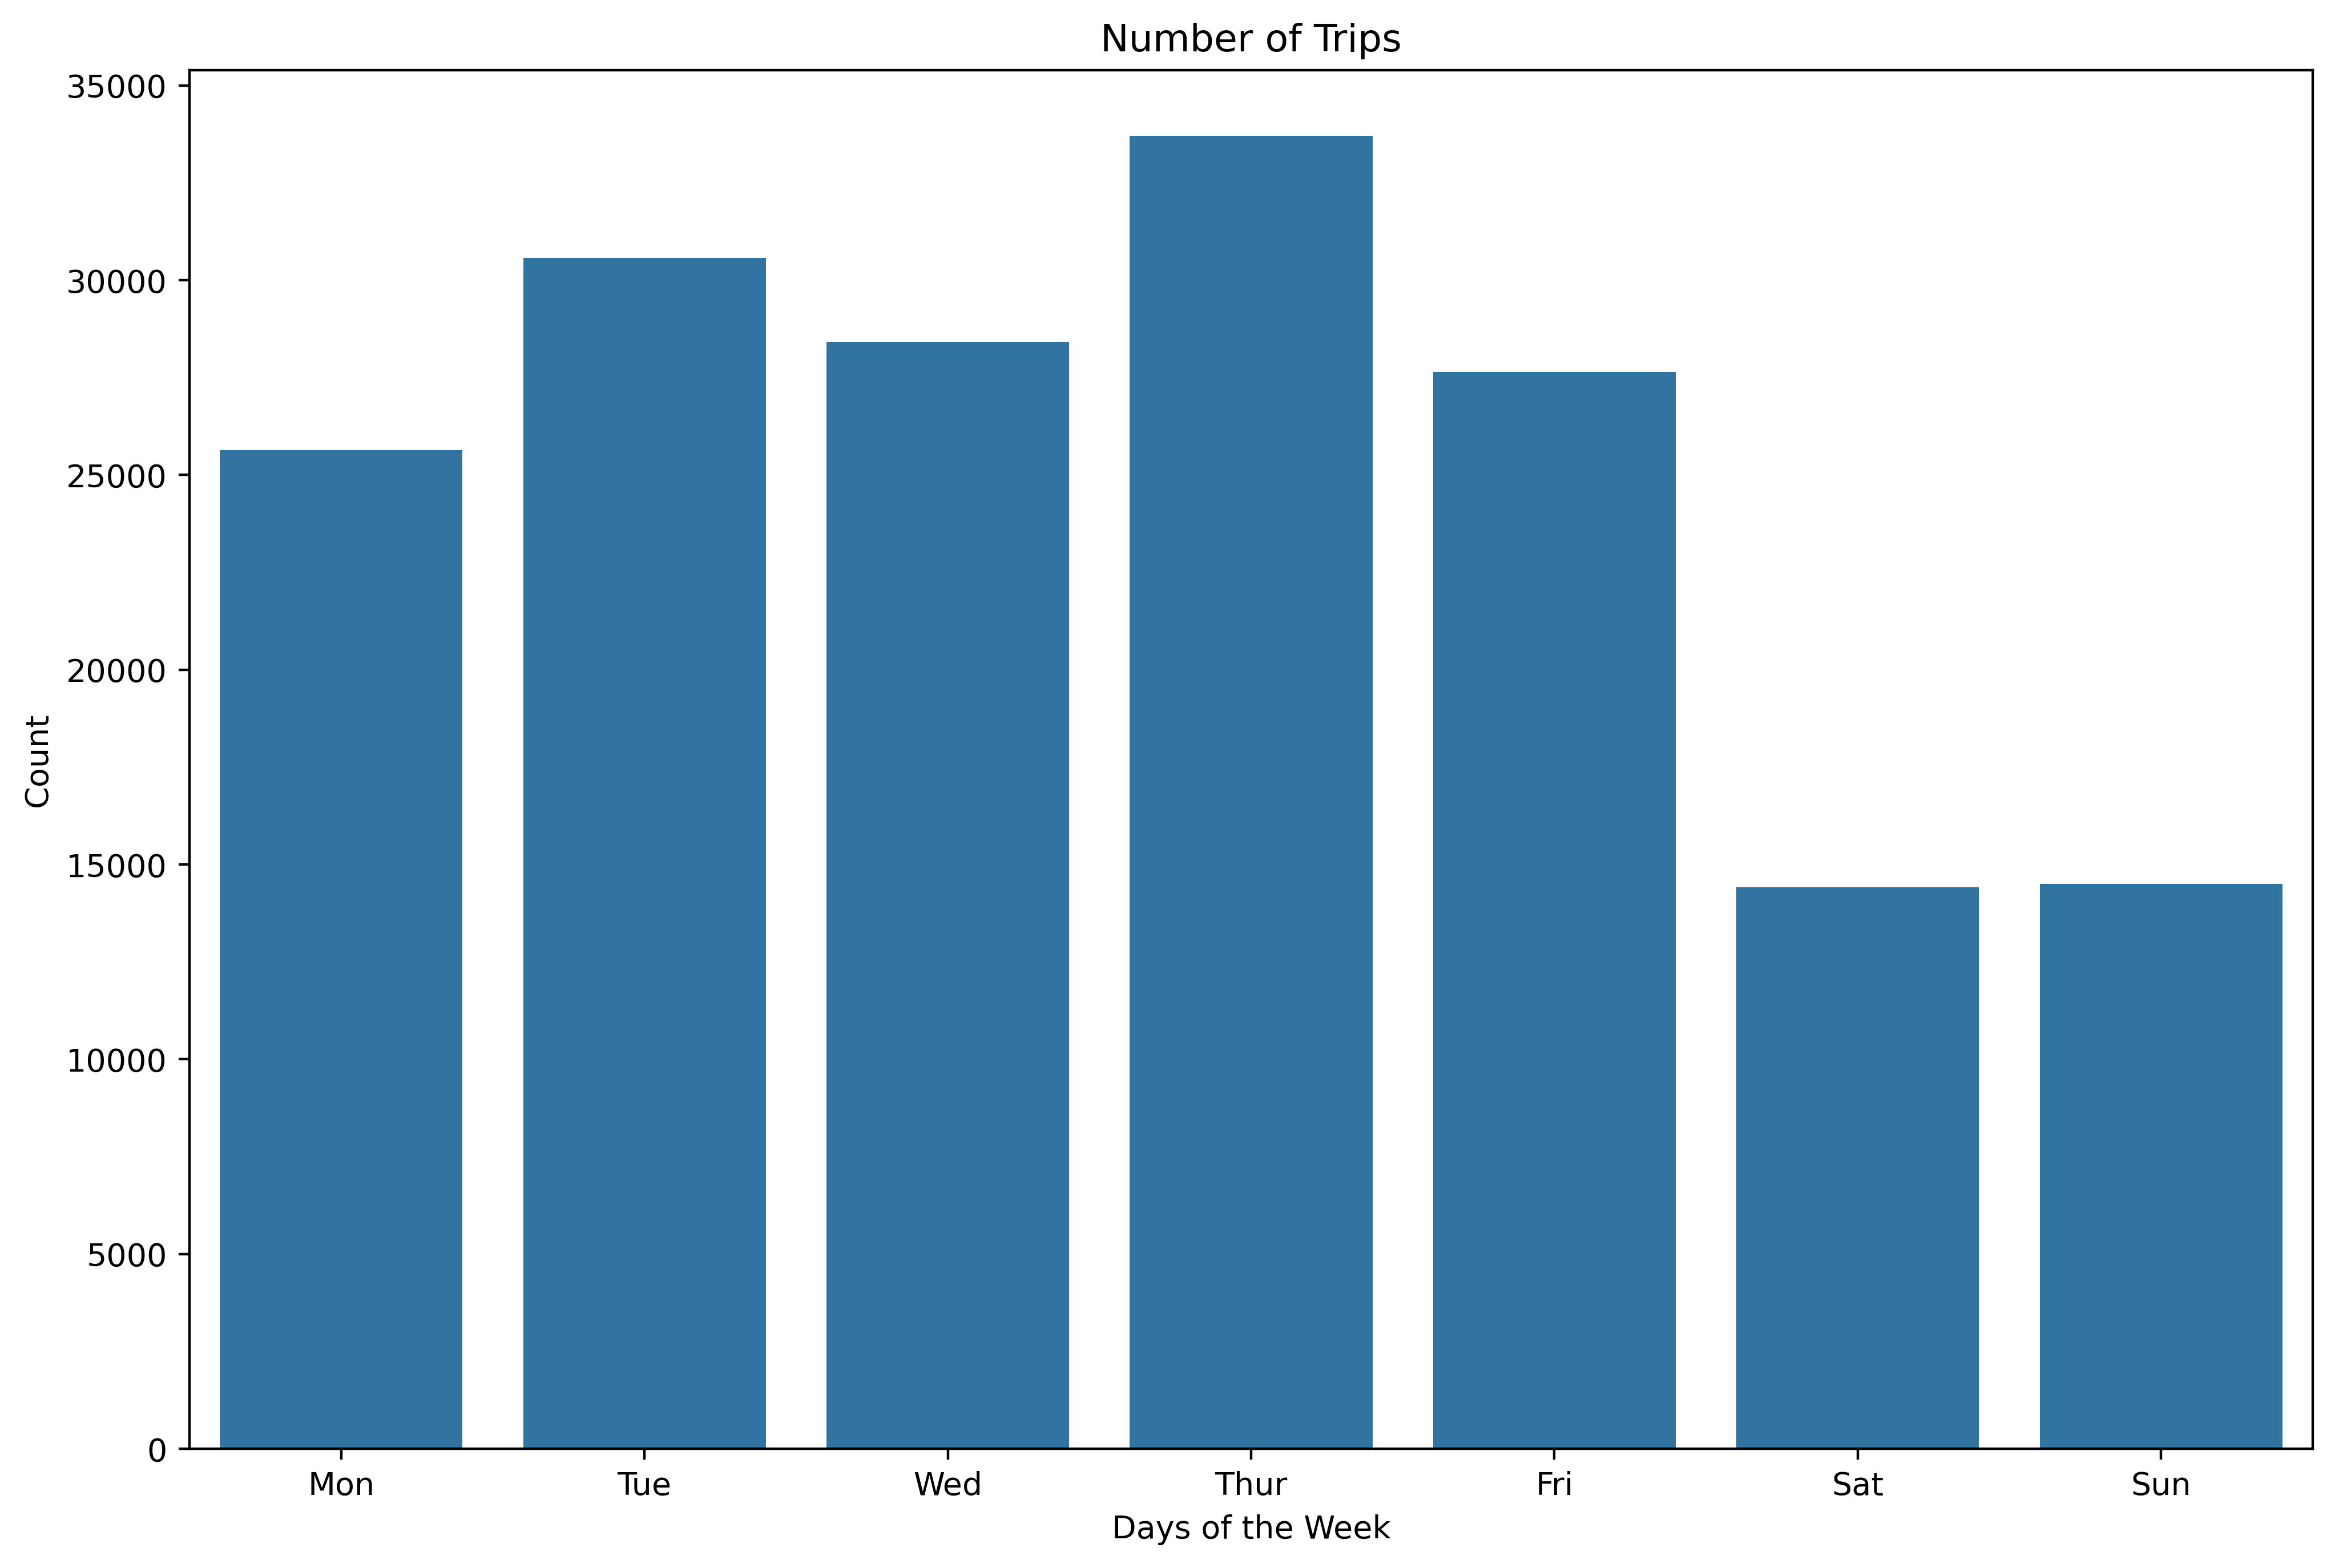

In [29]:
days = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']

base_color = sb.color_palette()[0]
sb.countplot(x = ride_data_copy.start_time.dt.day_of_week, color=base_color)
plt.title("Number of Trips")
plt.xlabel("Days of the Week")
plt.ylabel('Count')
plt.xticks(np.arange(0,7), days);

**Observation**<br>
>Suprisingly the day of the week where the highest number of trips occured is not monday but actually is Thurday, while the weekend as expected have the least number of trips this maybe be due to fact that most people being spend the weekend resting at home.

#### What is the busiest hour of the day?

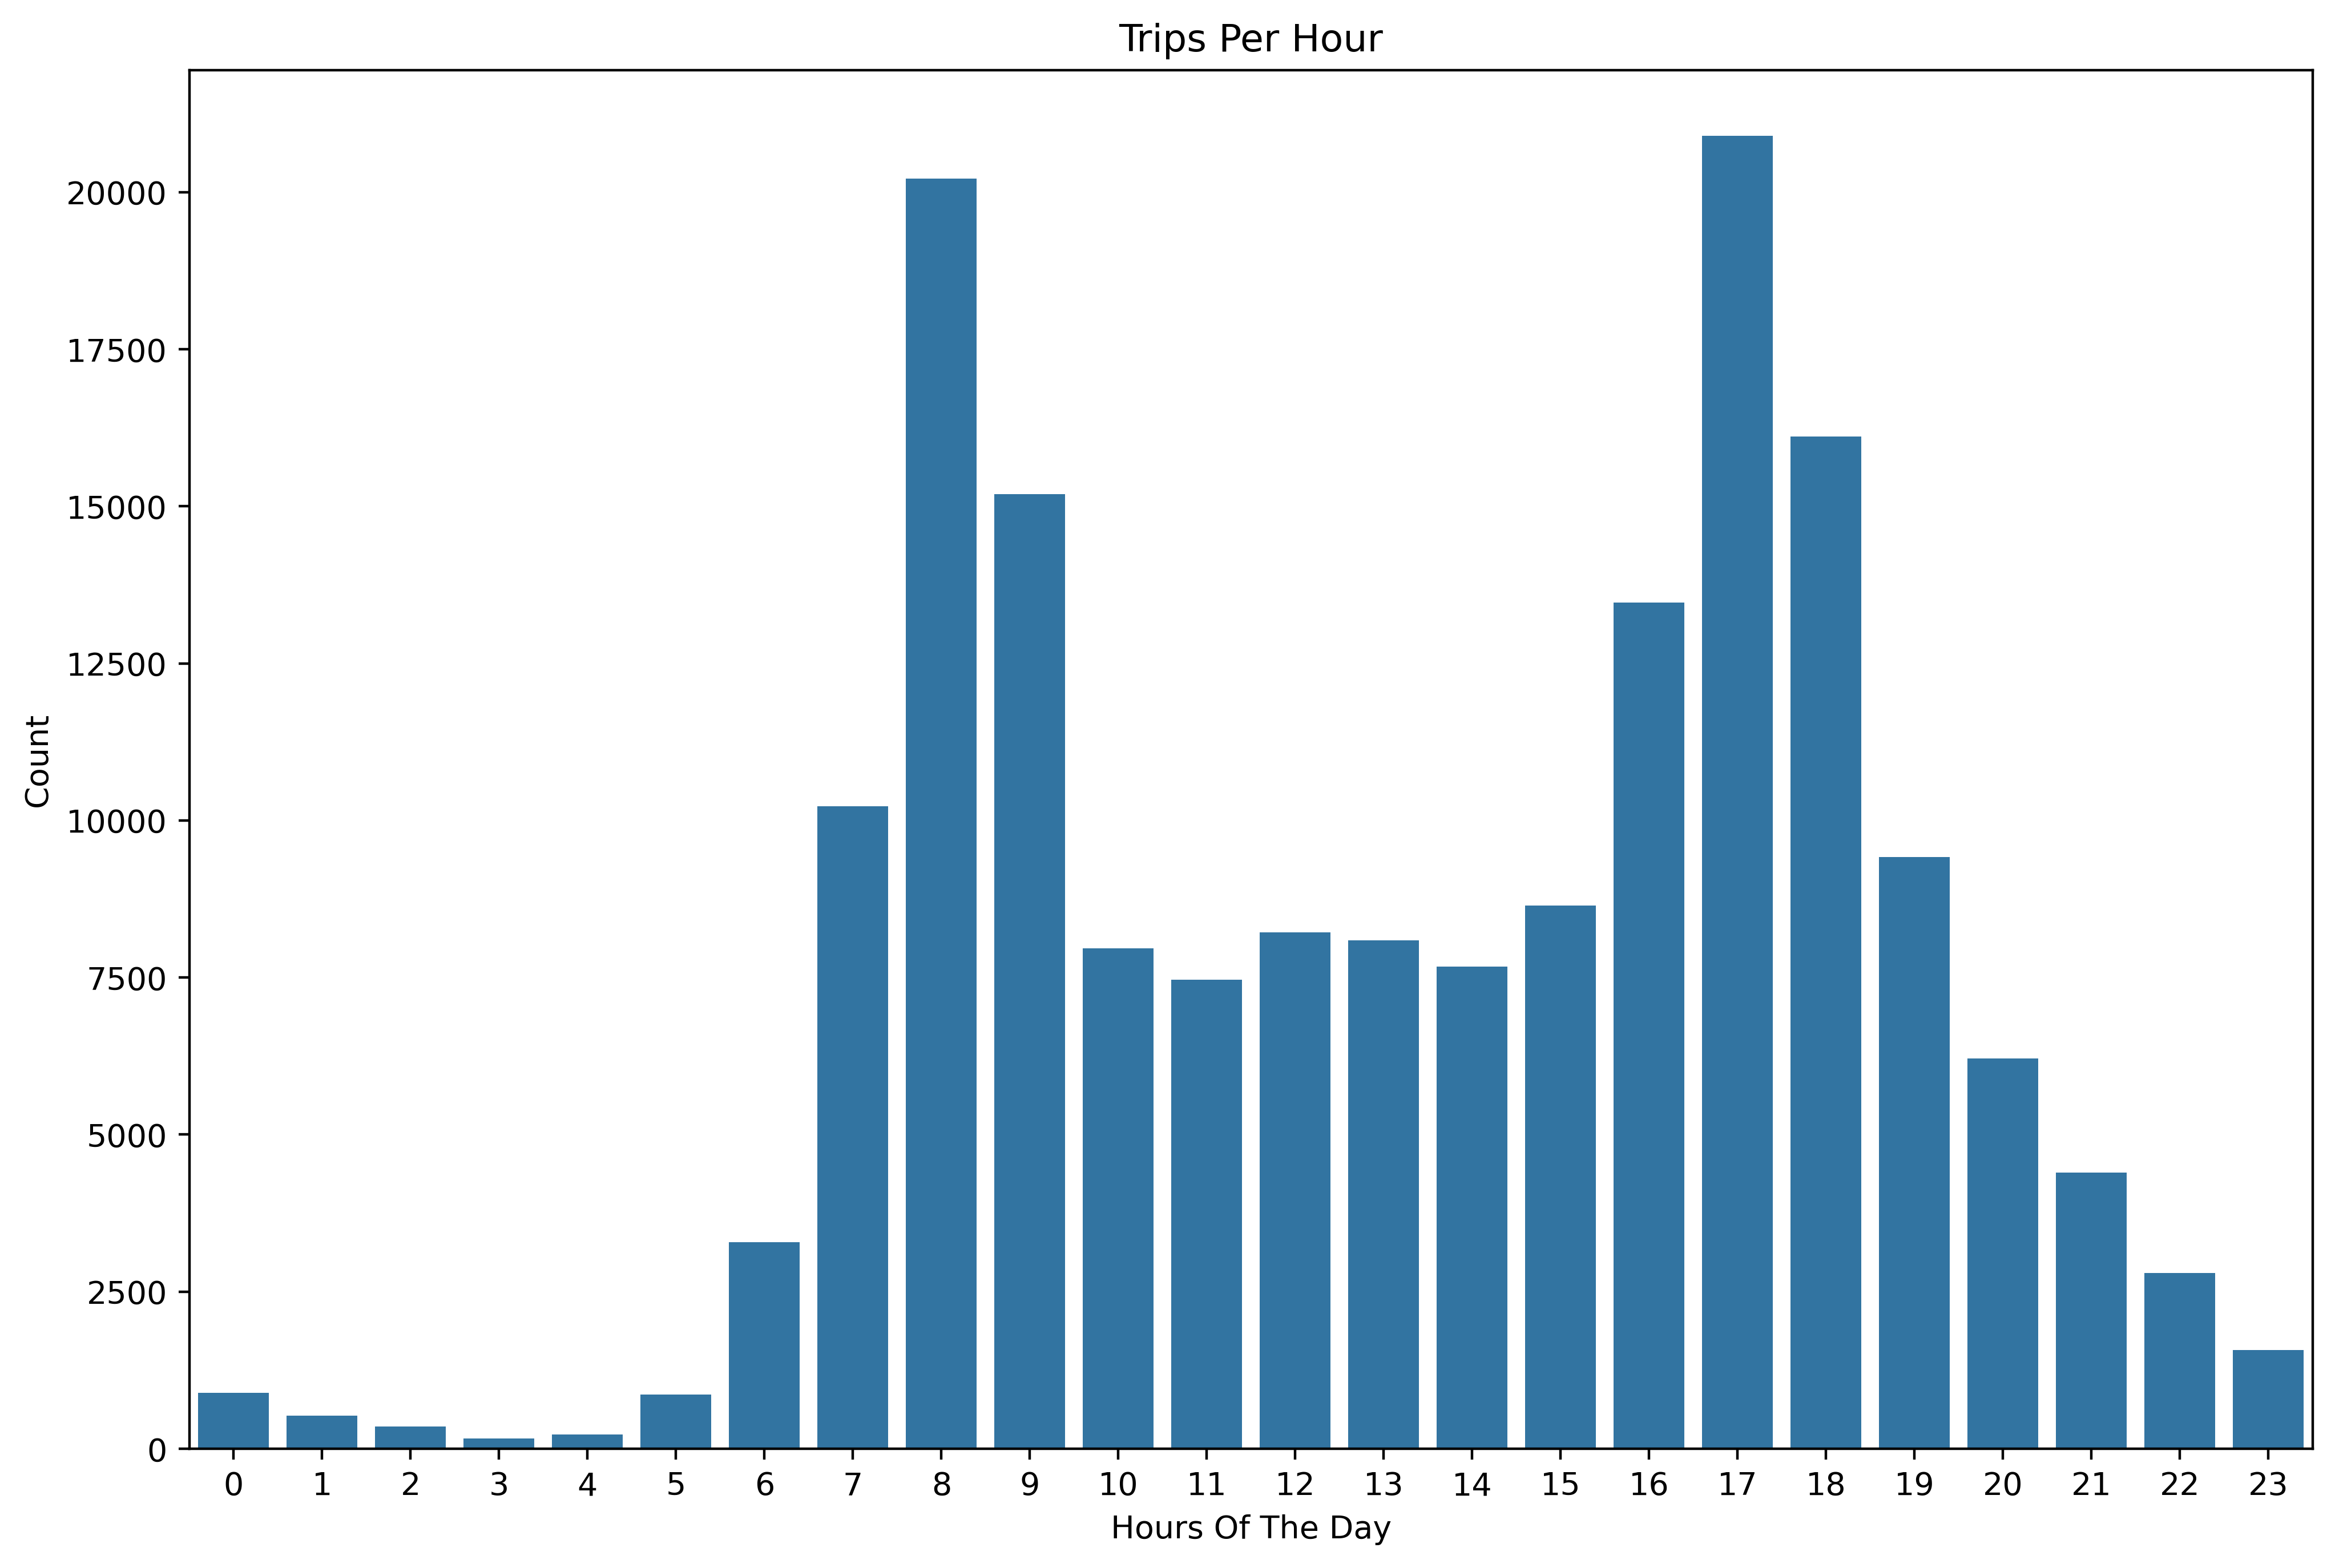

In [30]:
sb.countplot(x = ride_data_copy.start_time.dt.hour, color=base_color)
plt.xlabel("Hours Of The Day")
plt.ylabel("Count")
plt.title("Trips Per Hour");

**Observation**<br>
>The Busiest hours of the day in the morning are 8am and 9am, while in the evening, the busiest hours are 5pm and 6pm.<br>
The trend maybe due to the work arrangements of the working class where most people leave in the morning and return in the evening.

#### Using the number of trips per hour, is the Market Station at 10th Street (i.e. the station at which the most people got on) located near a residential area?

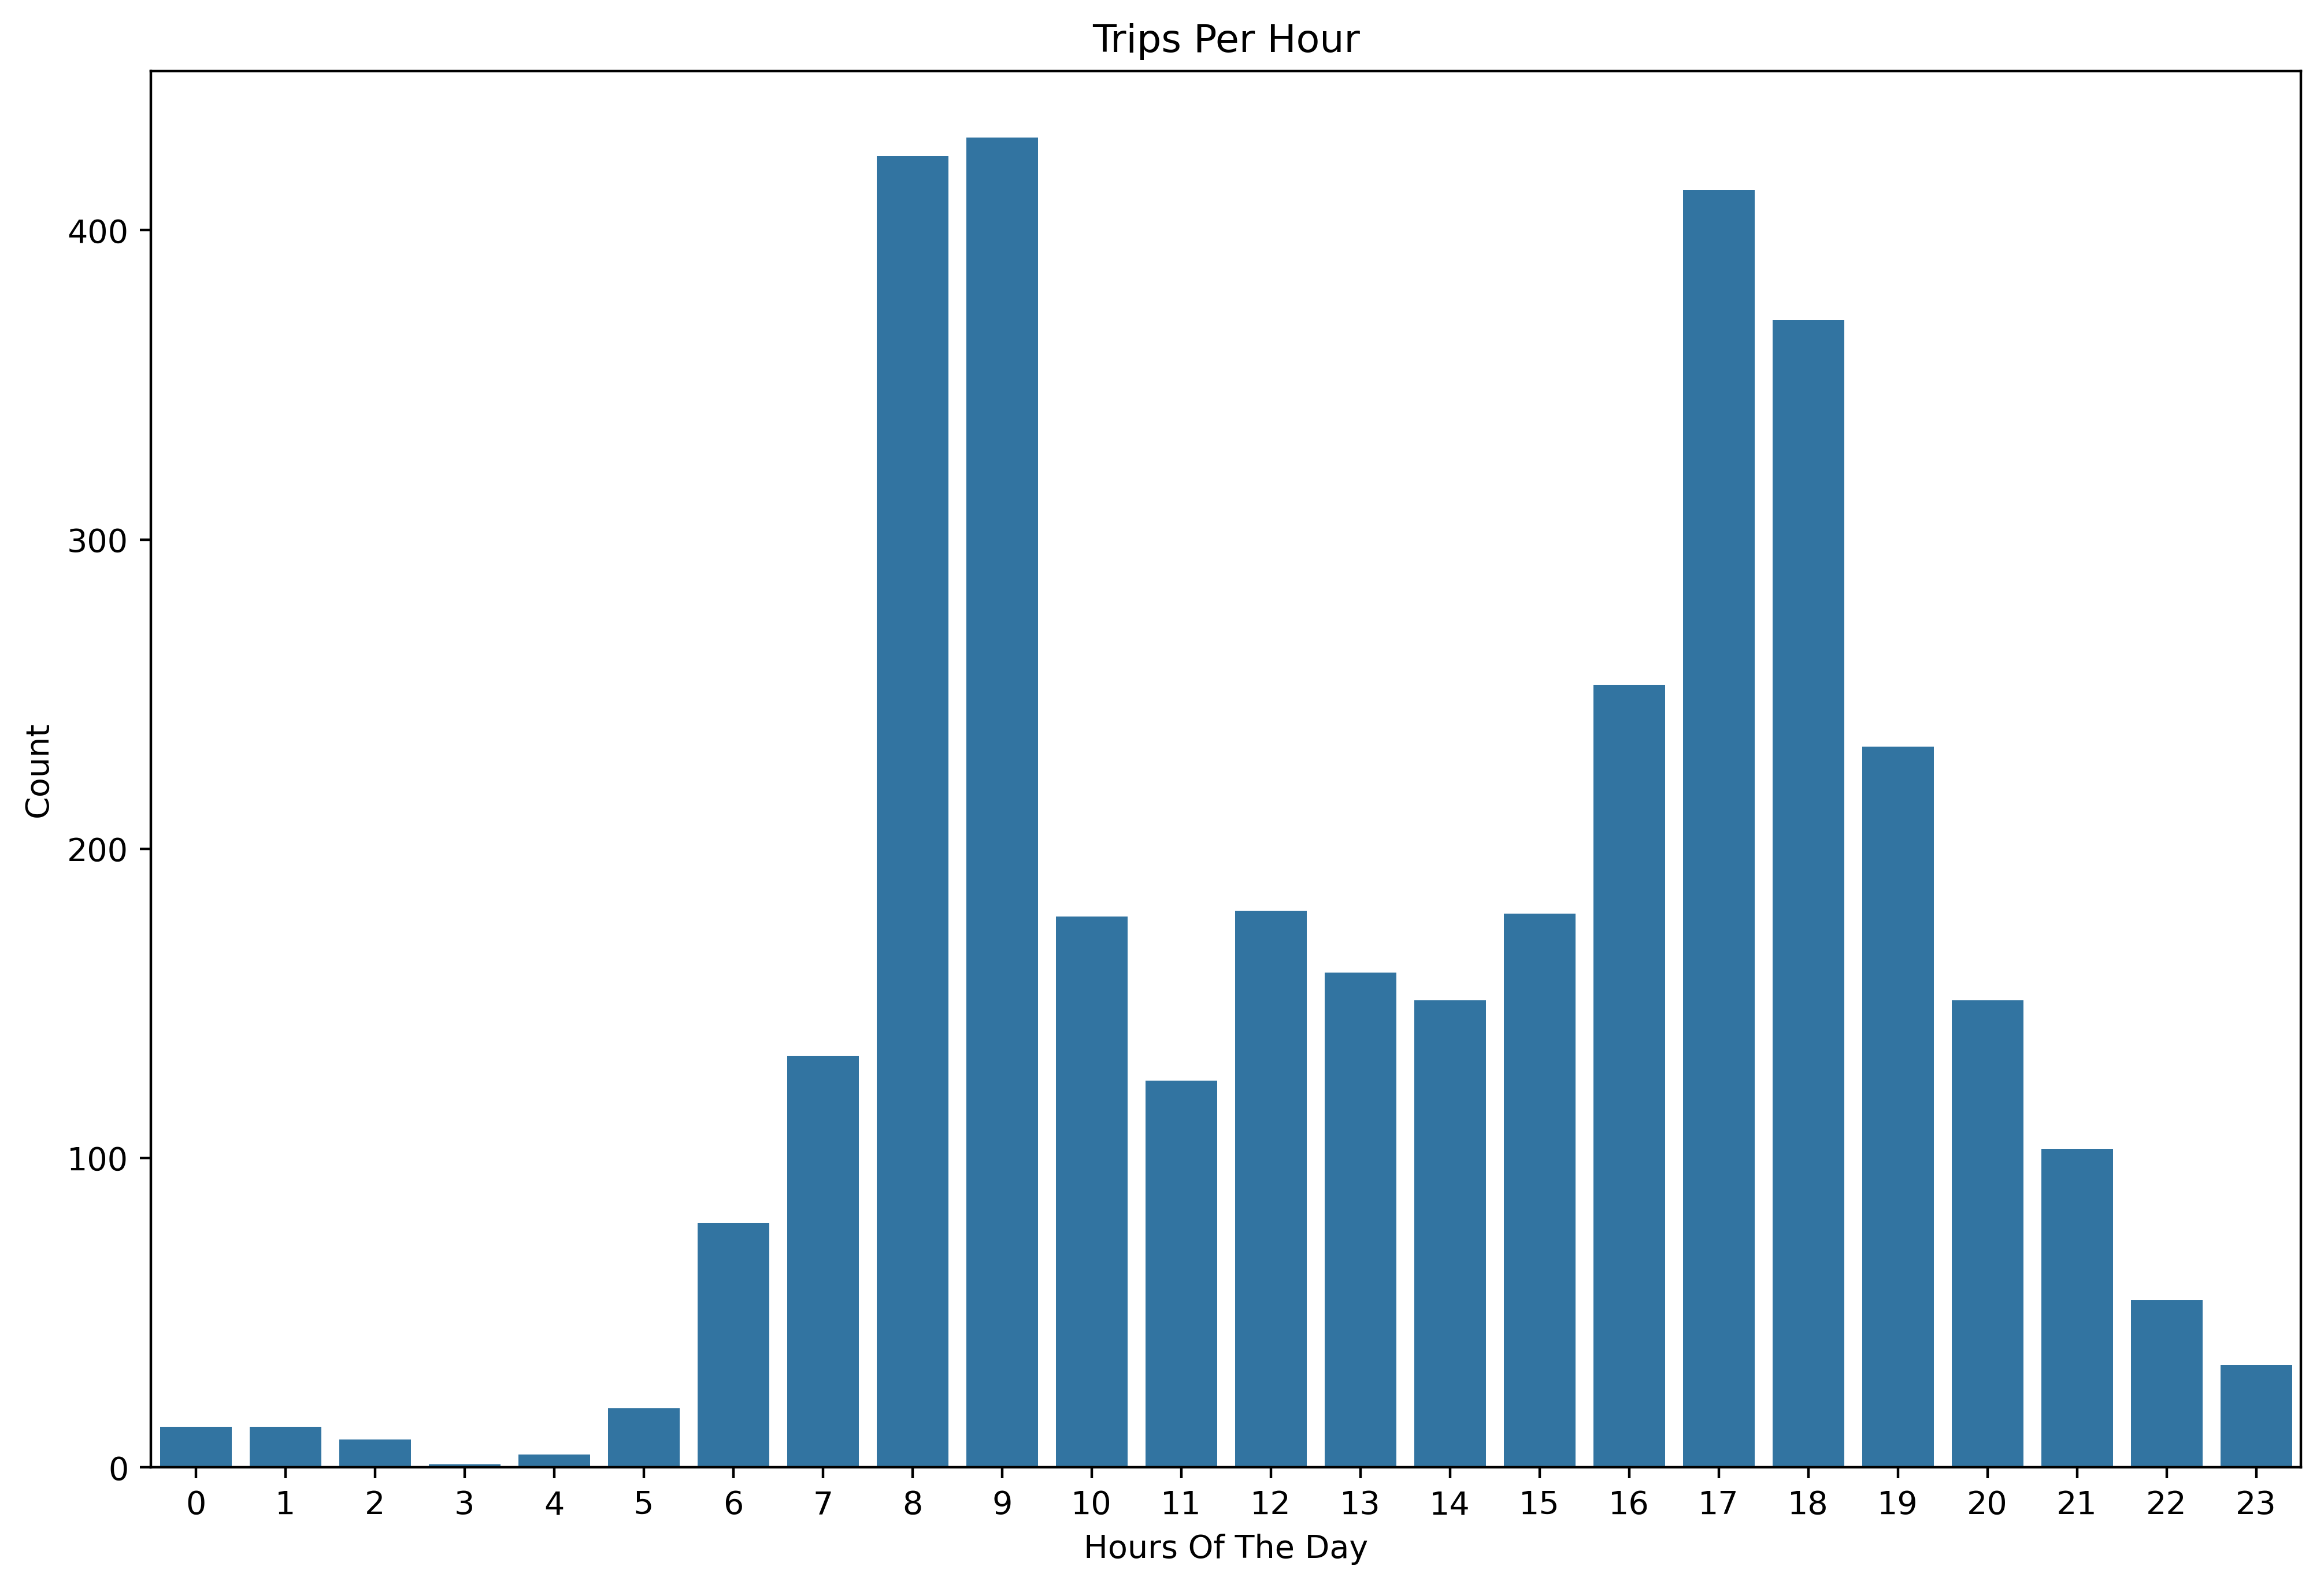

In [31]:
# selecting the rows where the end station is Market St at 10th St
Market = ride_data_copy.query('end_station_name == "Market St at 10th St"').start_time.dt.hour

sb.countplot(x = Market, color=base_color)
plt.xlabel("Hours Of The Day")
plt.ylabel("Count")
plt.title("Trips Per Hour");

**Observation**<br>
>From the graph above, it can be observed that there are two spikes, the first around the hours 8 to 9 in the morning, which could imply that the station is located close to a business district as most jobs start by 8 or 9 am, the second spike around 5 to 6 pm implies that the station although closely located to a business district is also located near a residential area.

#### Using the number of trips per hour, is the San Francisco Caltrain Station 2 located near a highly populated area?

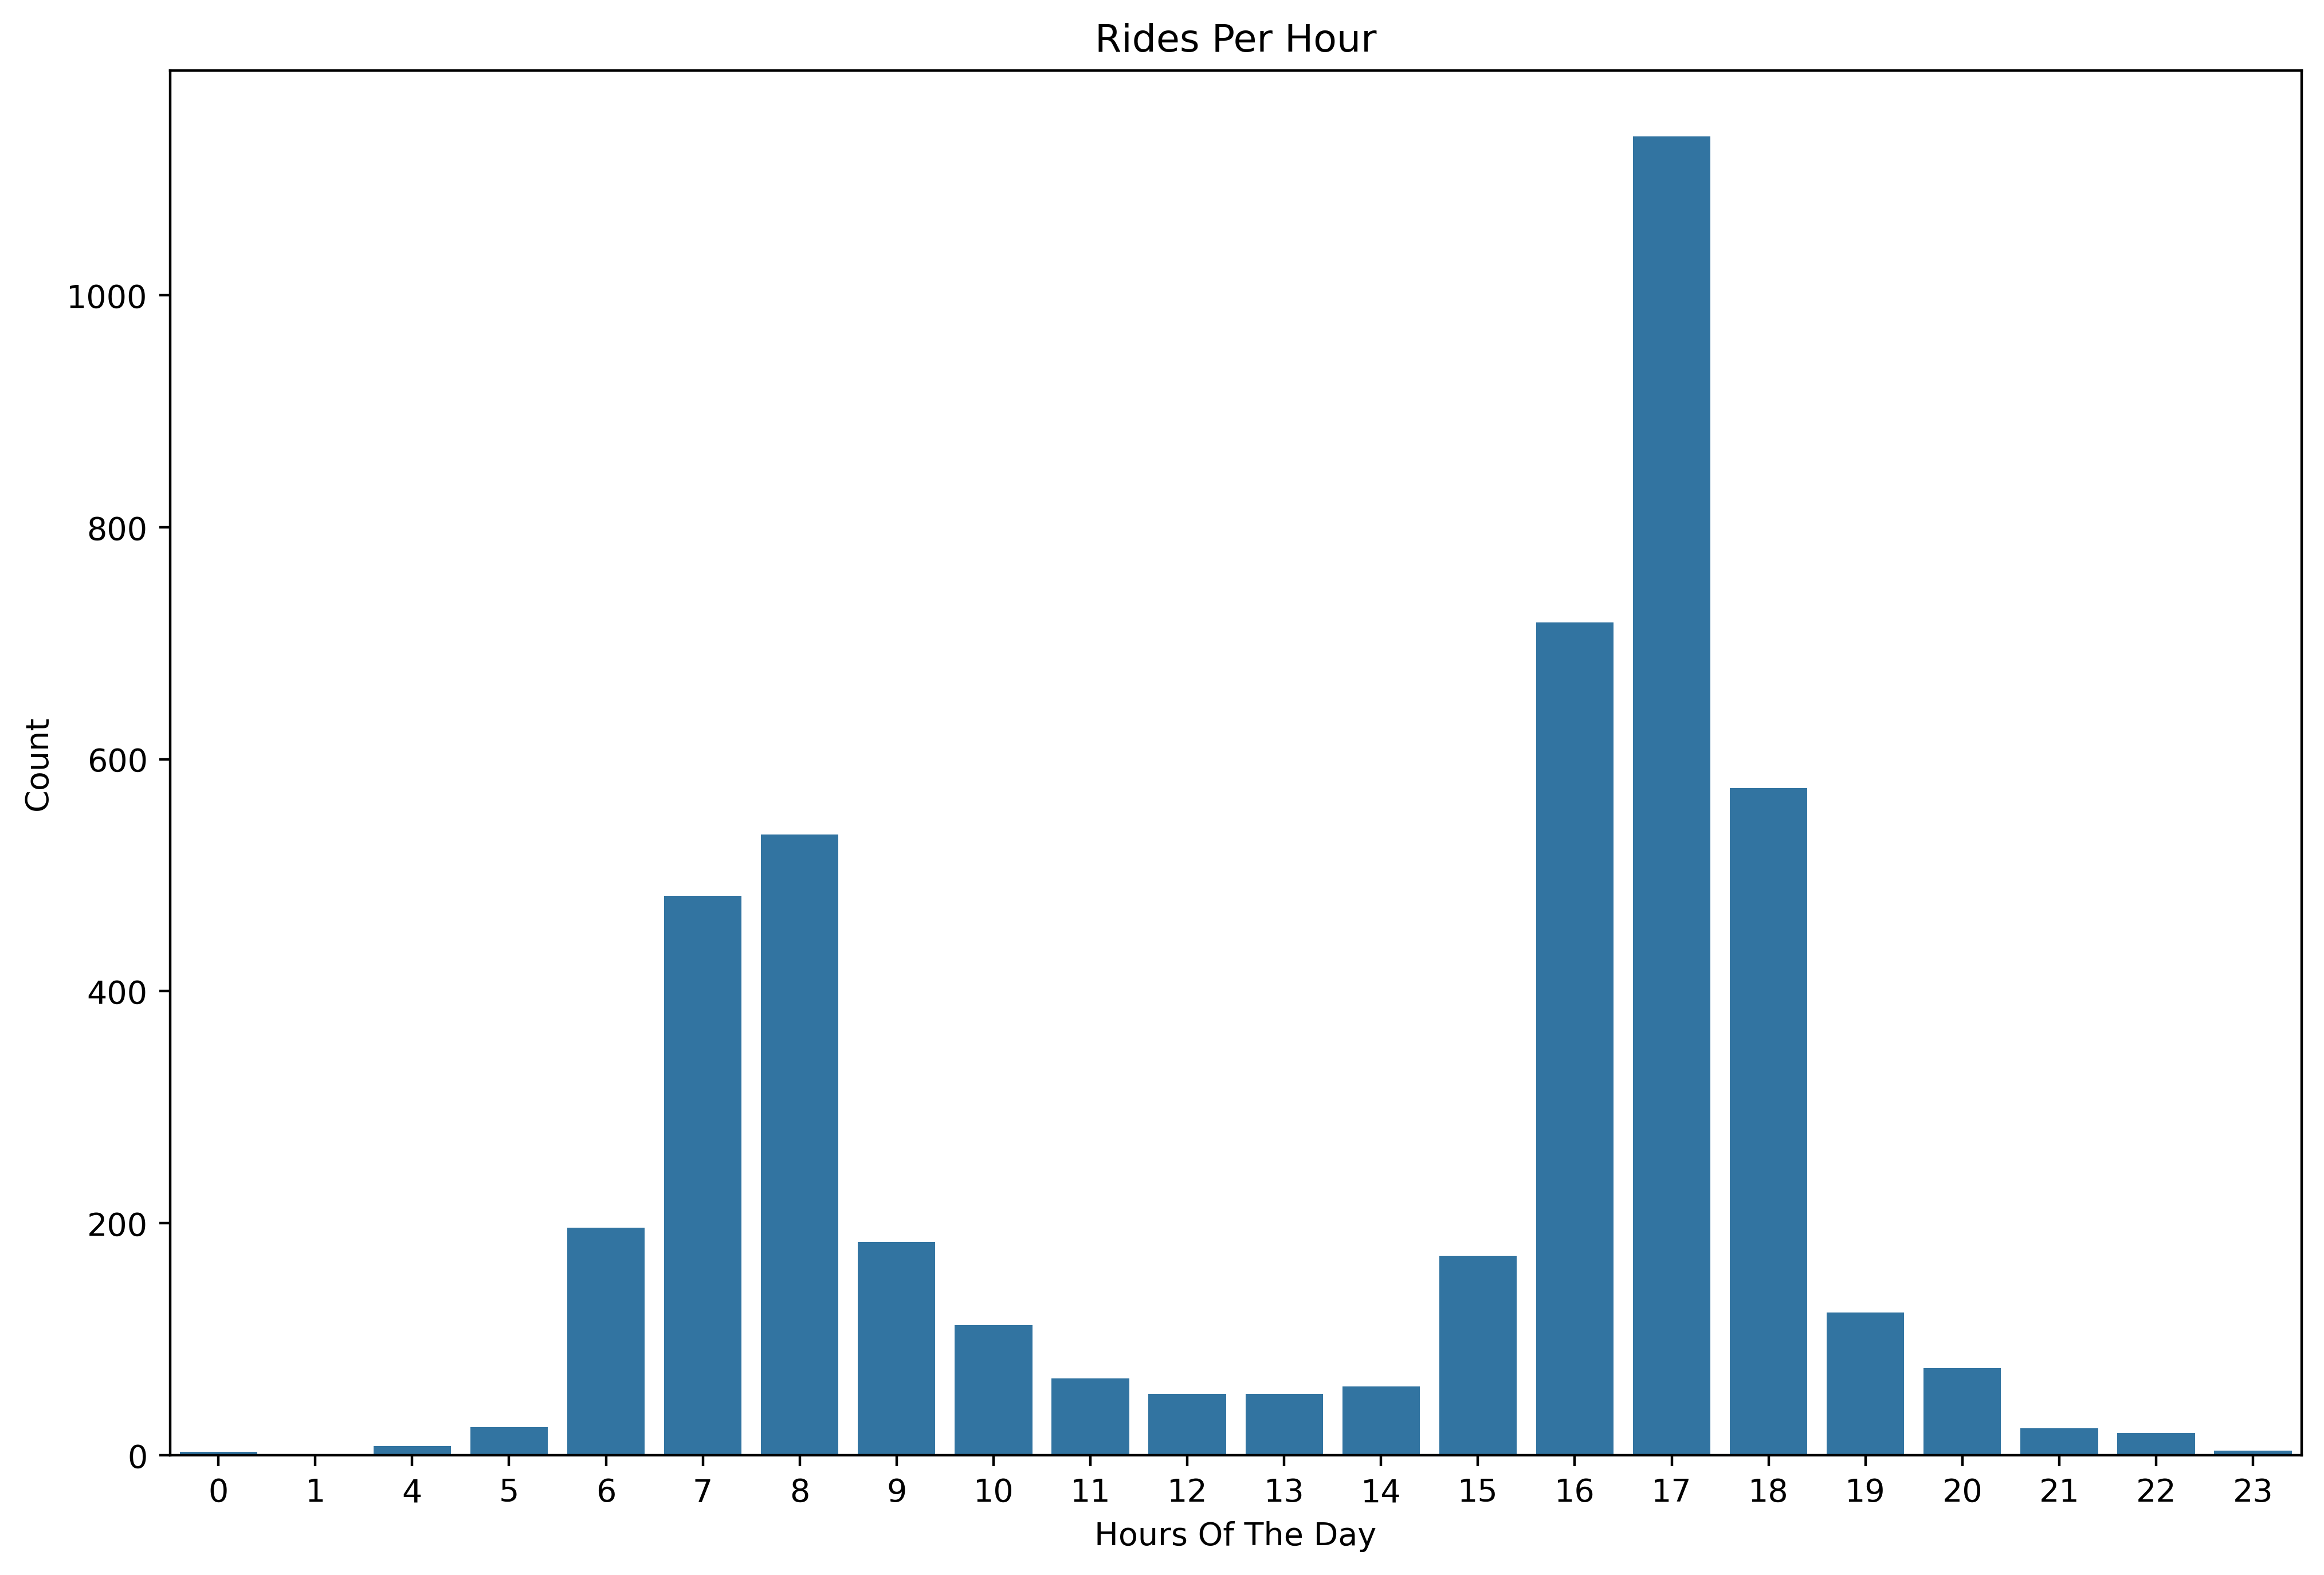

In [32]:
# selecting the rows where the end station is San Francisco Caltrain Station 2
San_Francisco = ride_data_copy.query('end_station_name == "San Francisco Caltrain Station 2  \
(Townsend St at 4th St)"').start_time.dt.hour

sb.countplot(x = San_Francisco, color=base_color)
plt.xlabel("Hours Of The Day")
plt.ylabel("Count")
plt.title("Rides Per Hour");

**Observation**<br>
>It can be observed that more people get off at the San Francisco Caltrain Station 2, there is a prominent spike around the hours 4 to 6 in the afternoon where more people arrived at the station, this could imply that the station is located close to a highly populated residential area. 

#### When are most trips taken in terms of day of the month?

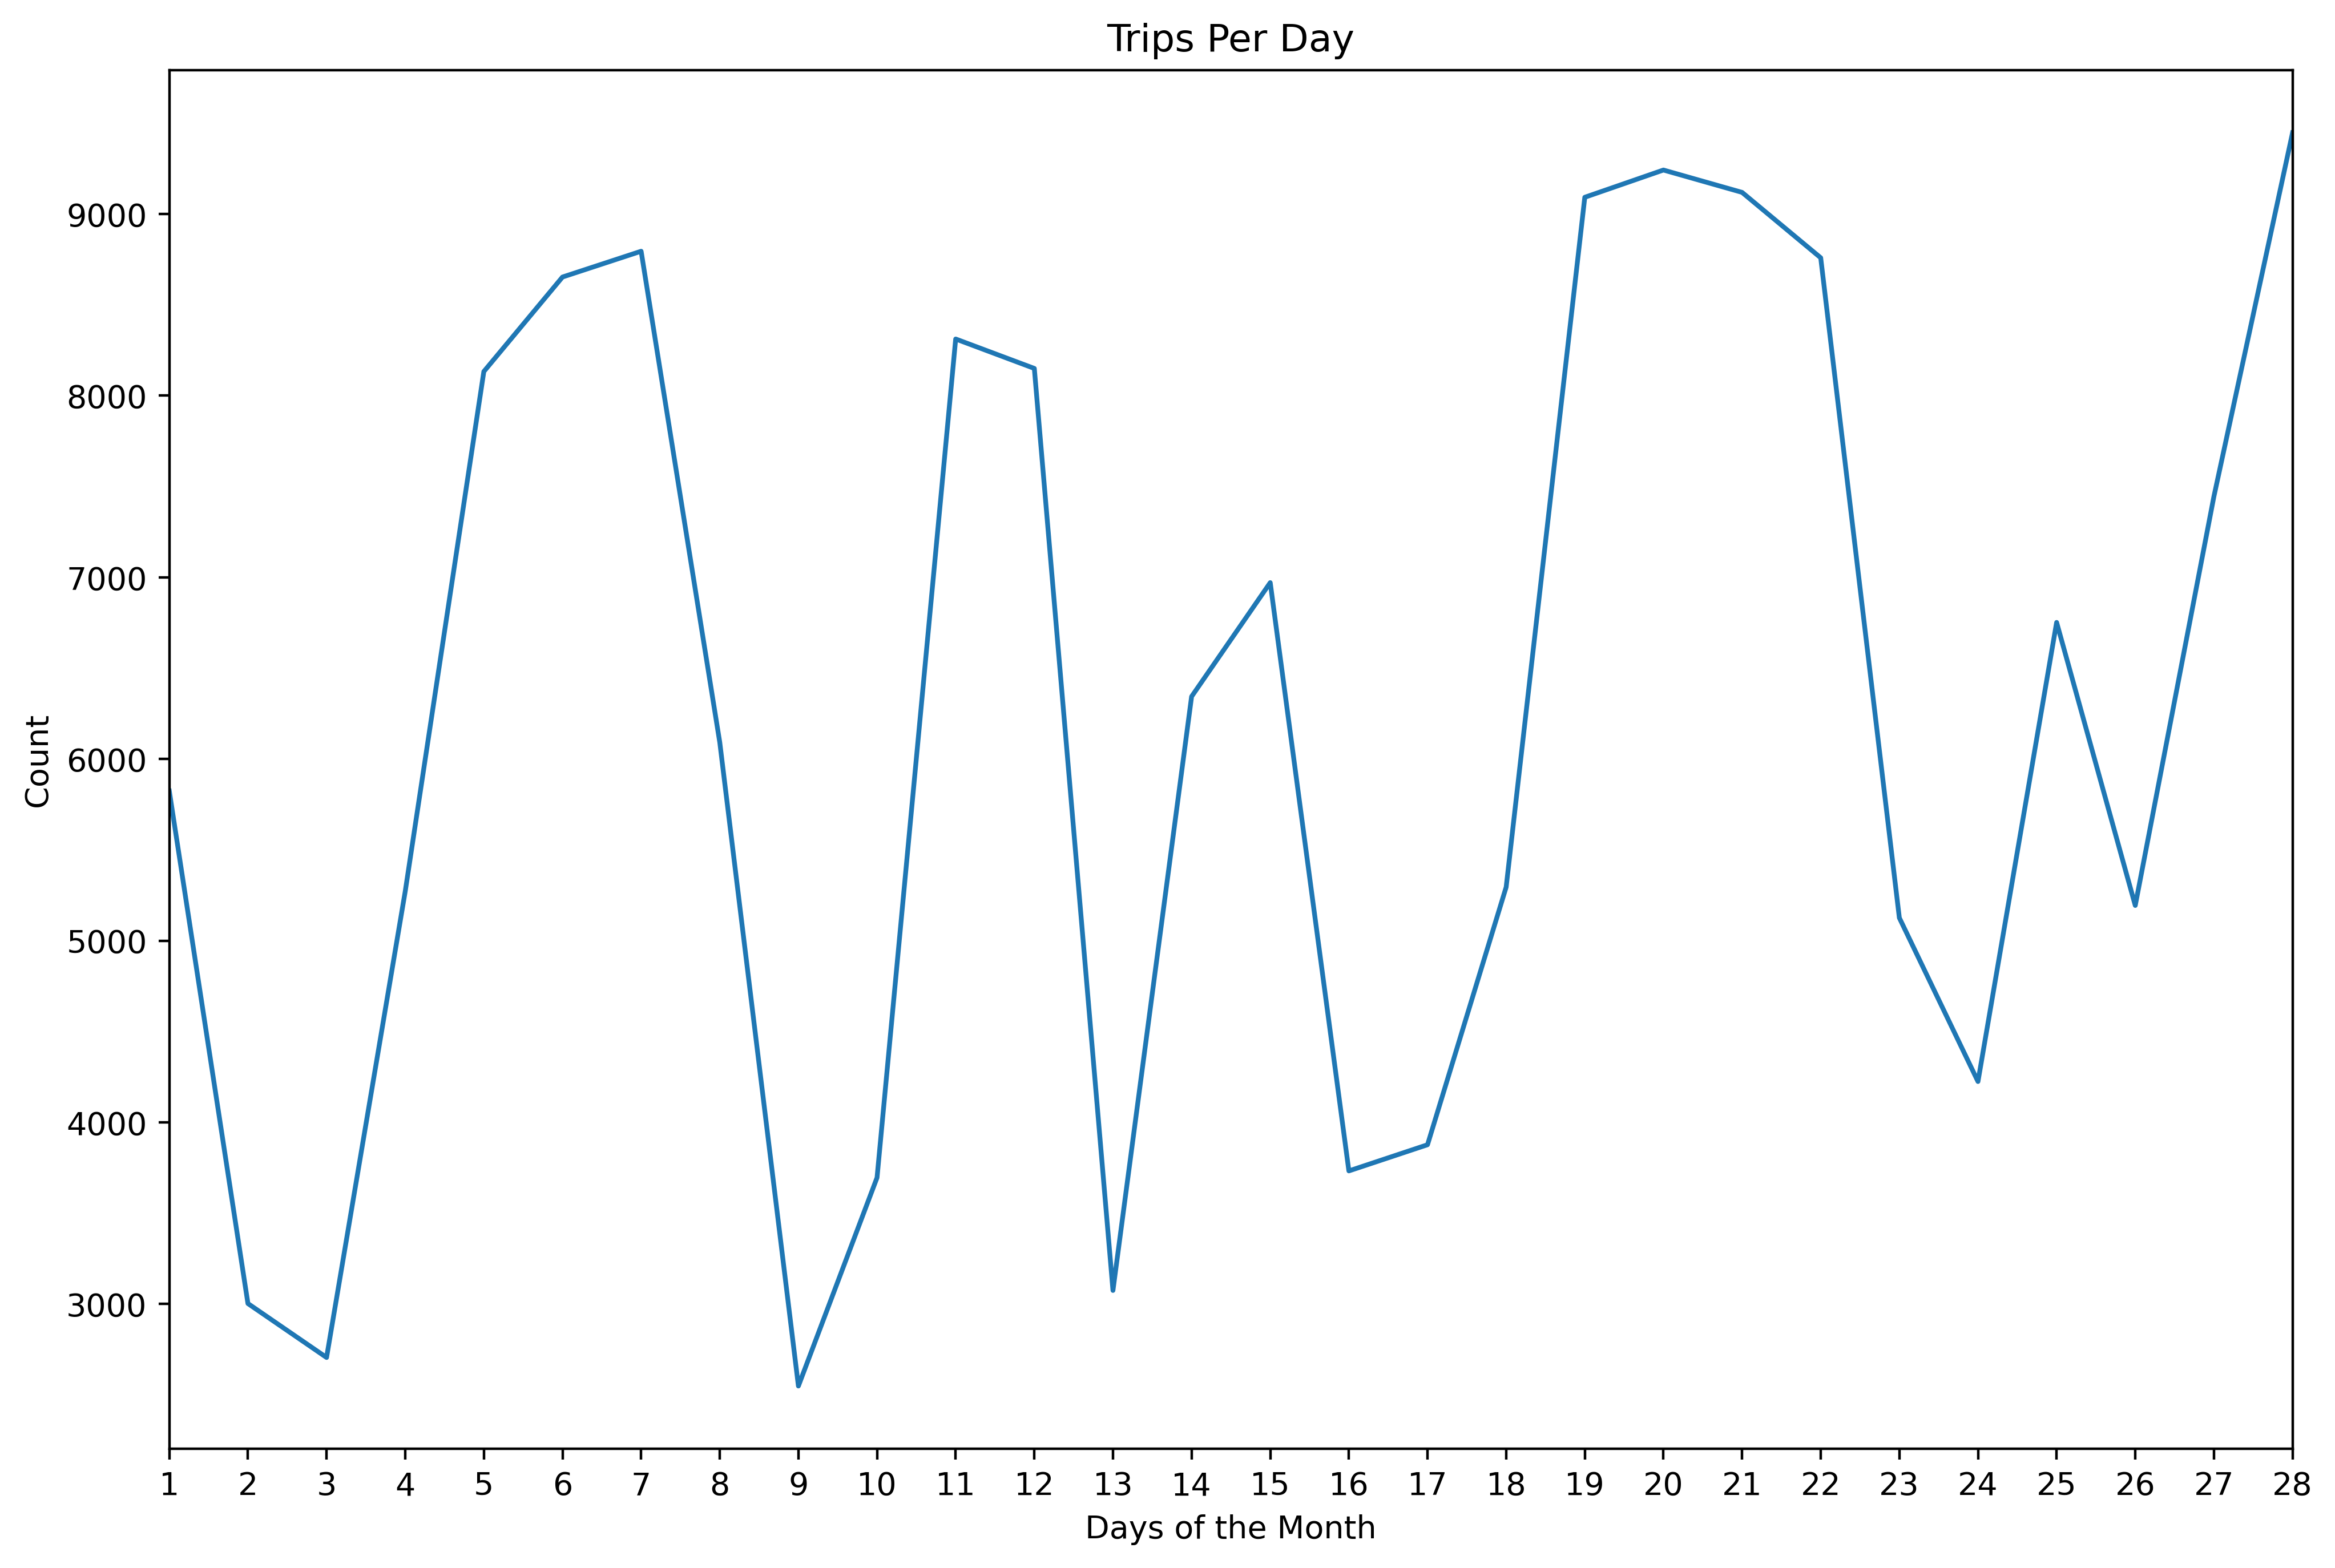

In [33]:
ride_data_copy.start_time.dt.day.value_counts().reset_index().sort_values('index')\
.reset_index(drop=True).plot(x='index', y='start_time')
plt.xticks(np.arange(1,29), np.arange(1,29))
plt.legend().remove()
plt.xlim(1,28)
plt.title('Trips Per Day')
plt.xlabel("Days of the Month")
plt.ylabel("Count");

**Observation**<br>
>The weekends generally have less rides than other days of the weekends so there being a drop in the number of rides it to be expected but on the 13th of the month, there's also a huge drop in the number of rides, this might be attributed to the fact that it's a day away from valentine's day. The day with the highest number of rides is 28th of the month which is also a thursday.

## Bivariate Exploration
#### Do younger people prefer shorter trips?

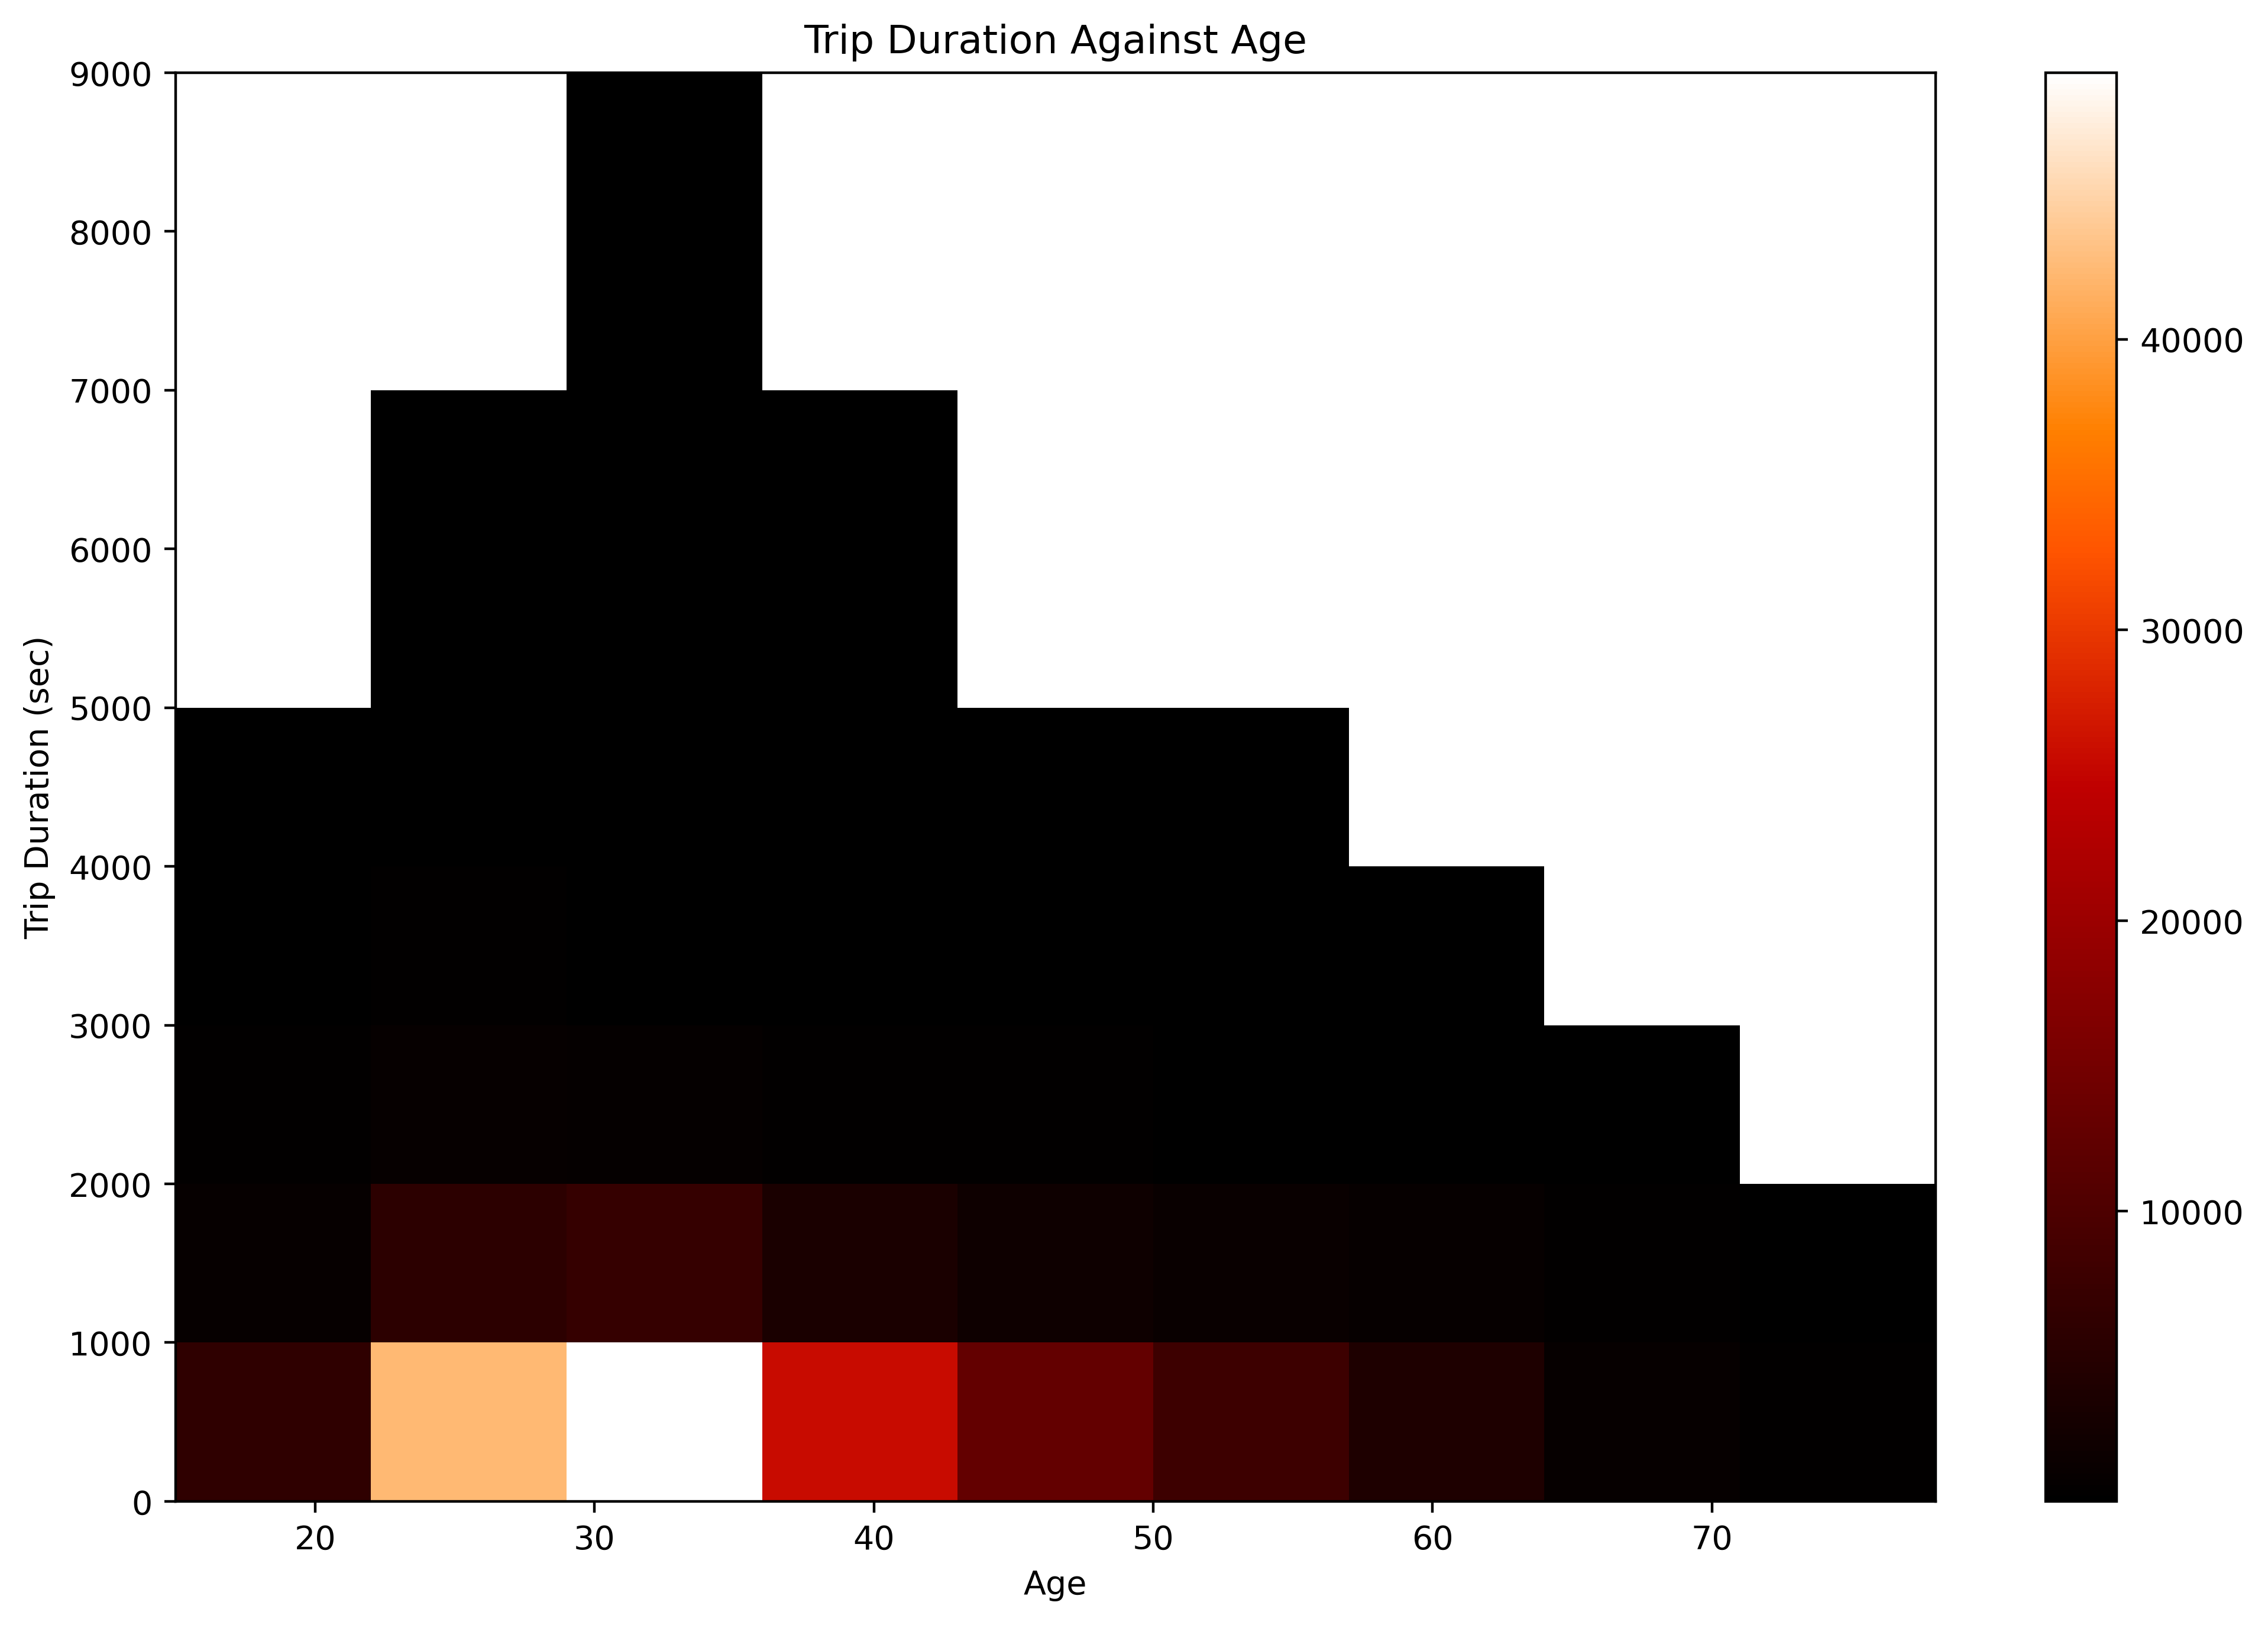

In [34]:
xbins, ybins = np.arange(15,85, 7), np.arange(0,10000, 1000)

plt.hist2d(data=ride_data_copy, x='age', y='duration_sec', cmap='gist_heat', cmin=20
           , bins=[xbins,ybins])
plt.colorbar()
plt.xlabel("Age")
plt.ylabel("Trip Duration (sec)")
plt.title("Trip Duration Against Age");

**Observation**<br>
>The young people make the most trips but generally it can be seen with the graph above that Trip duration has an inverse correlation with the age. Older people generally prefer shorter trips.

#### Which gender takes longer trips?

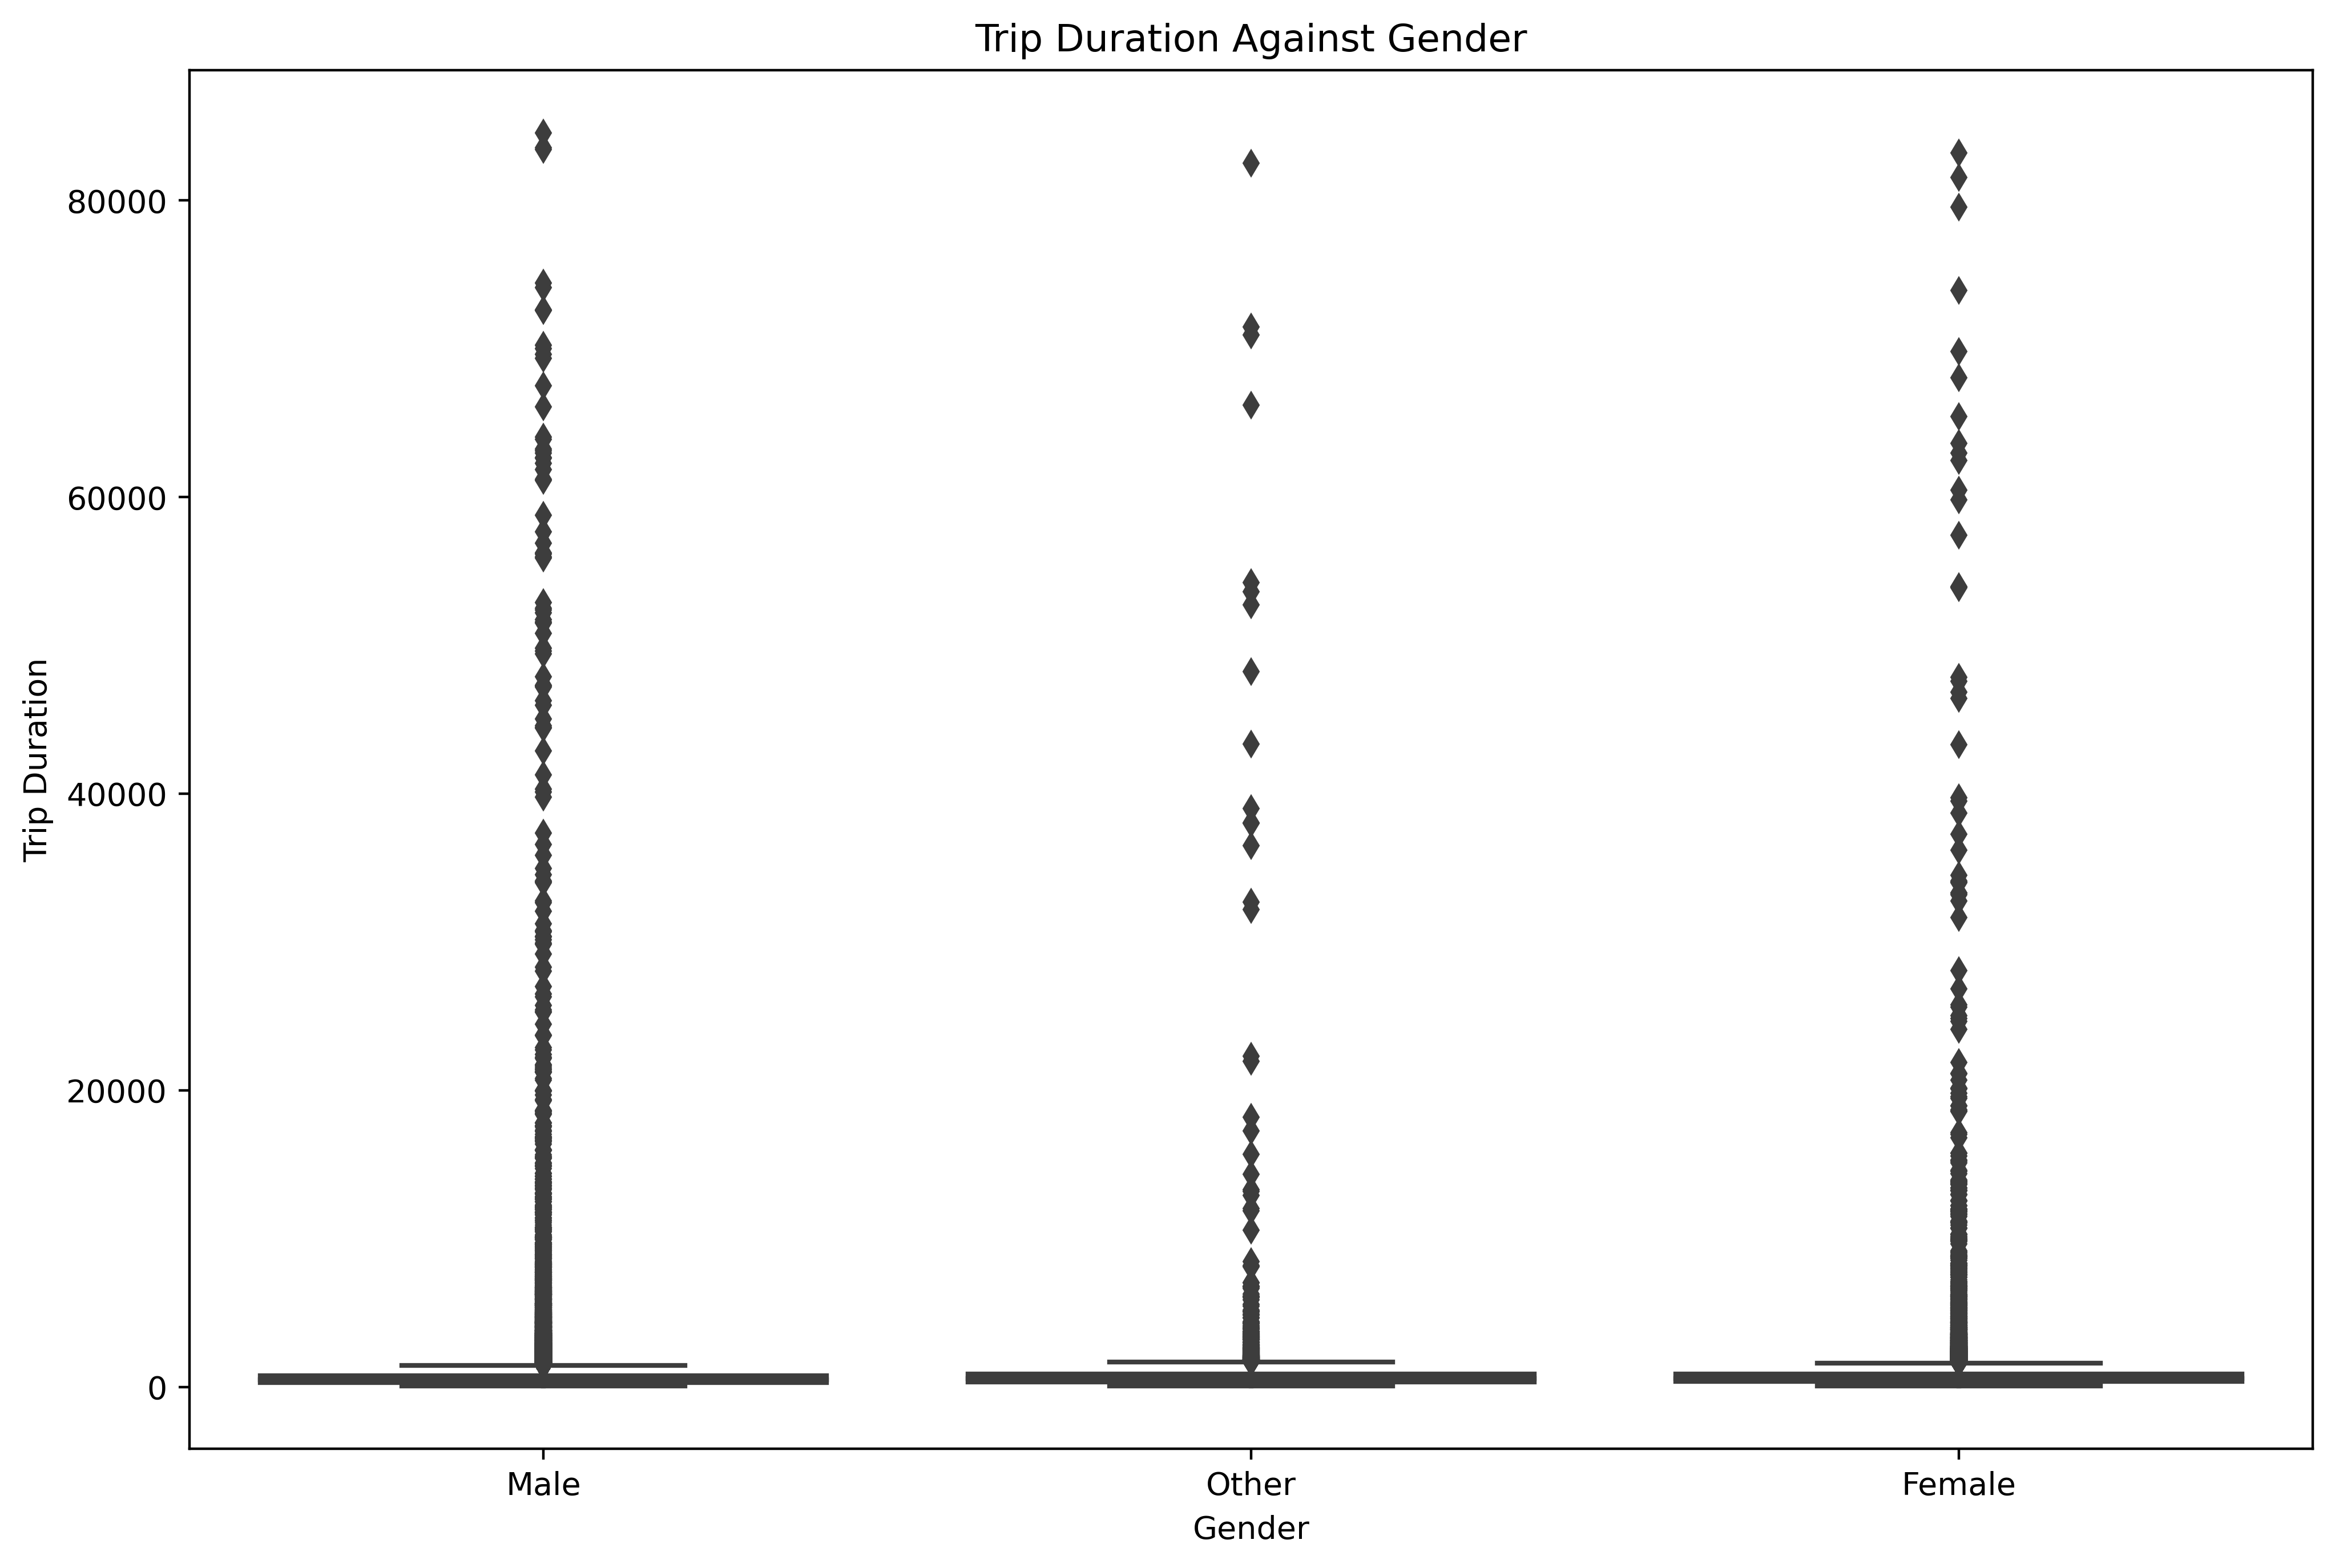

In [35]:
sb.boxplot(data=ride_data_copy, x='member_gender', y="duration_sec")
plt.xlabel("Gender")
plt.ylabel('Trip Duration')
plt.title("Trip Duration Against Gender");

**Observation**<br>
>The values are too wide spread in the visualization, we need to zoom into the key areas of interest.

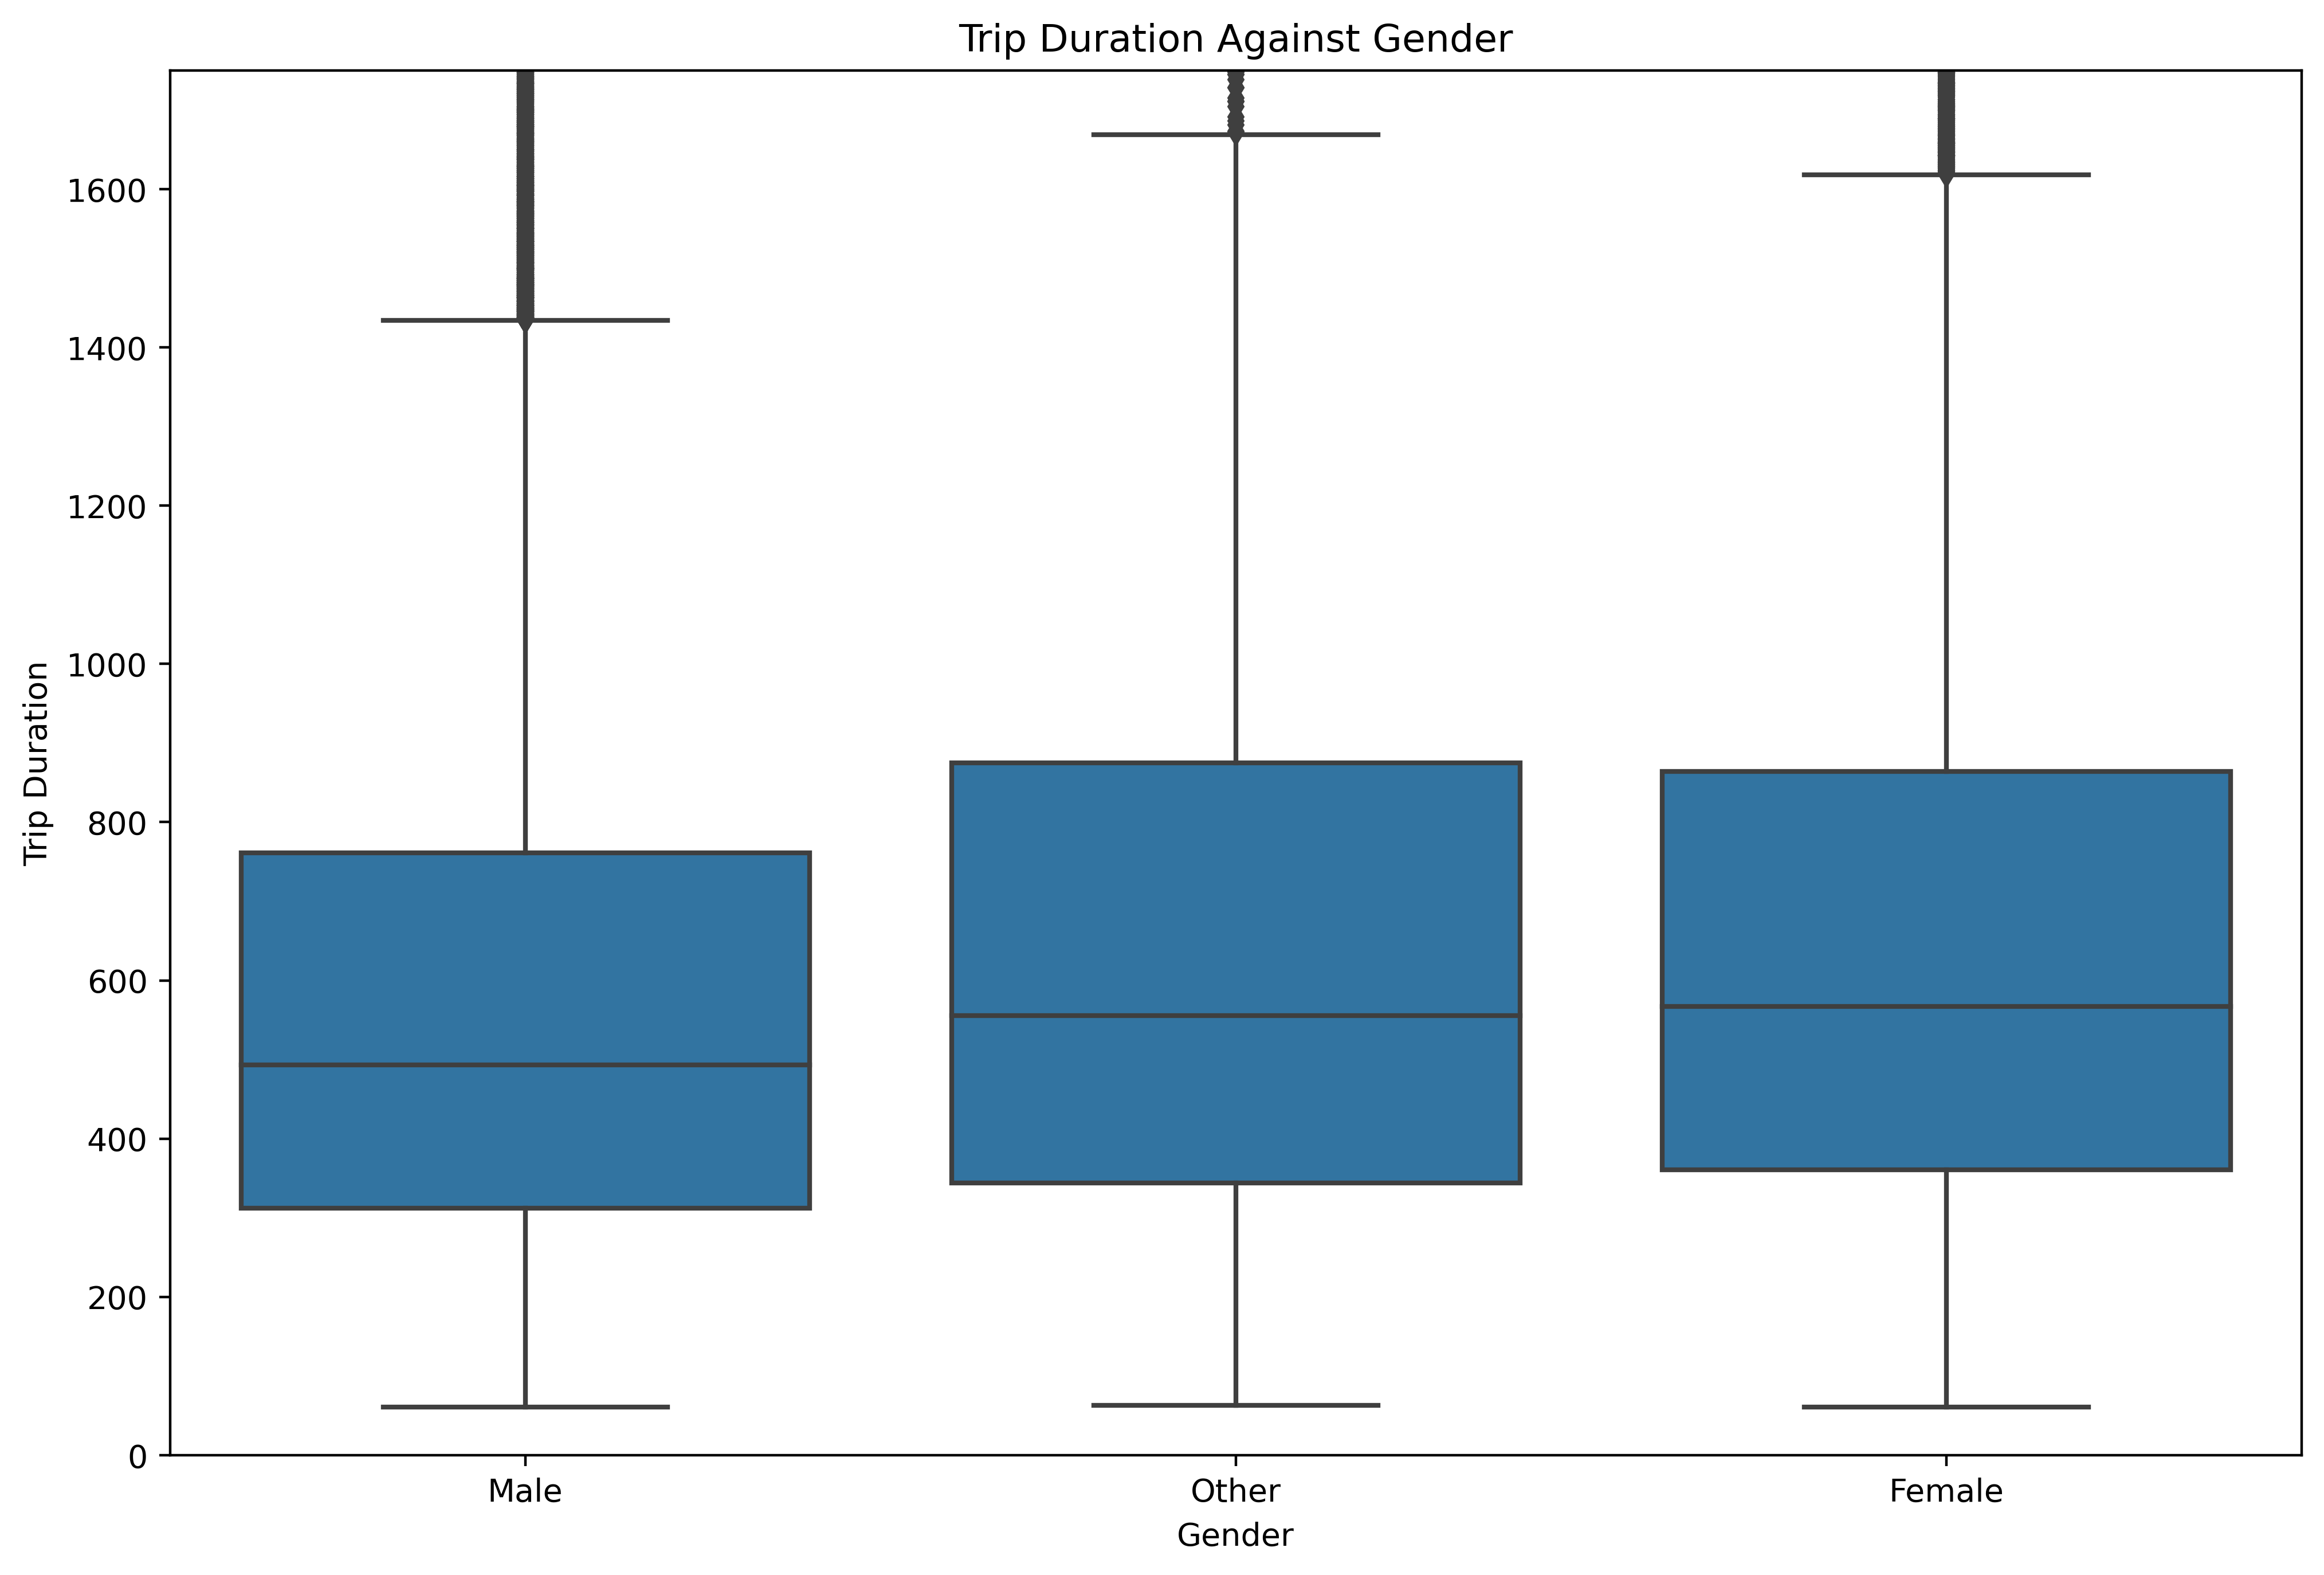

In [36]:
sb.boxplot(data=ride_data_copy, x='member_gender', y="duration_sec", color =base_color )
plt.xlabel("Gender")
plt.ylabel('Trip Duration')
plt.title("Trip Duration Against Gender")
plt.ylim(0,1750);

**Observation**<br>
>Although there are more male riders, it is clear that the other gender riders generally embark on trips of longer durations than their counterparts.

#### Which day of the week on average has the longest trips?

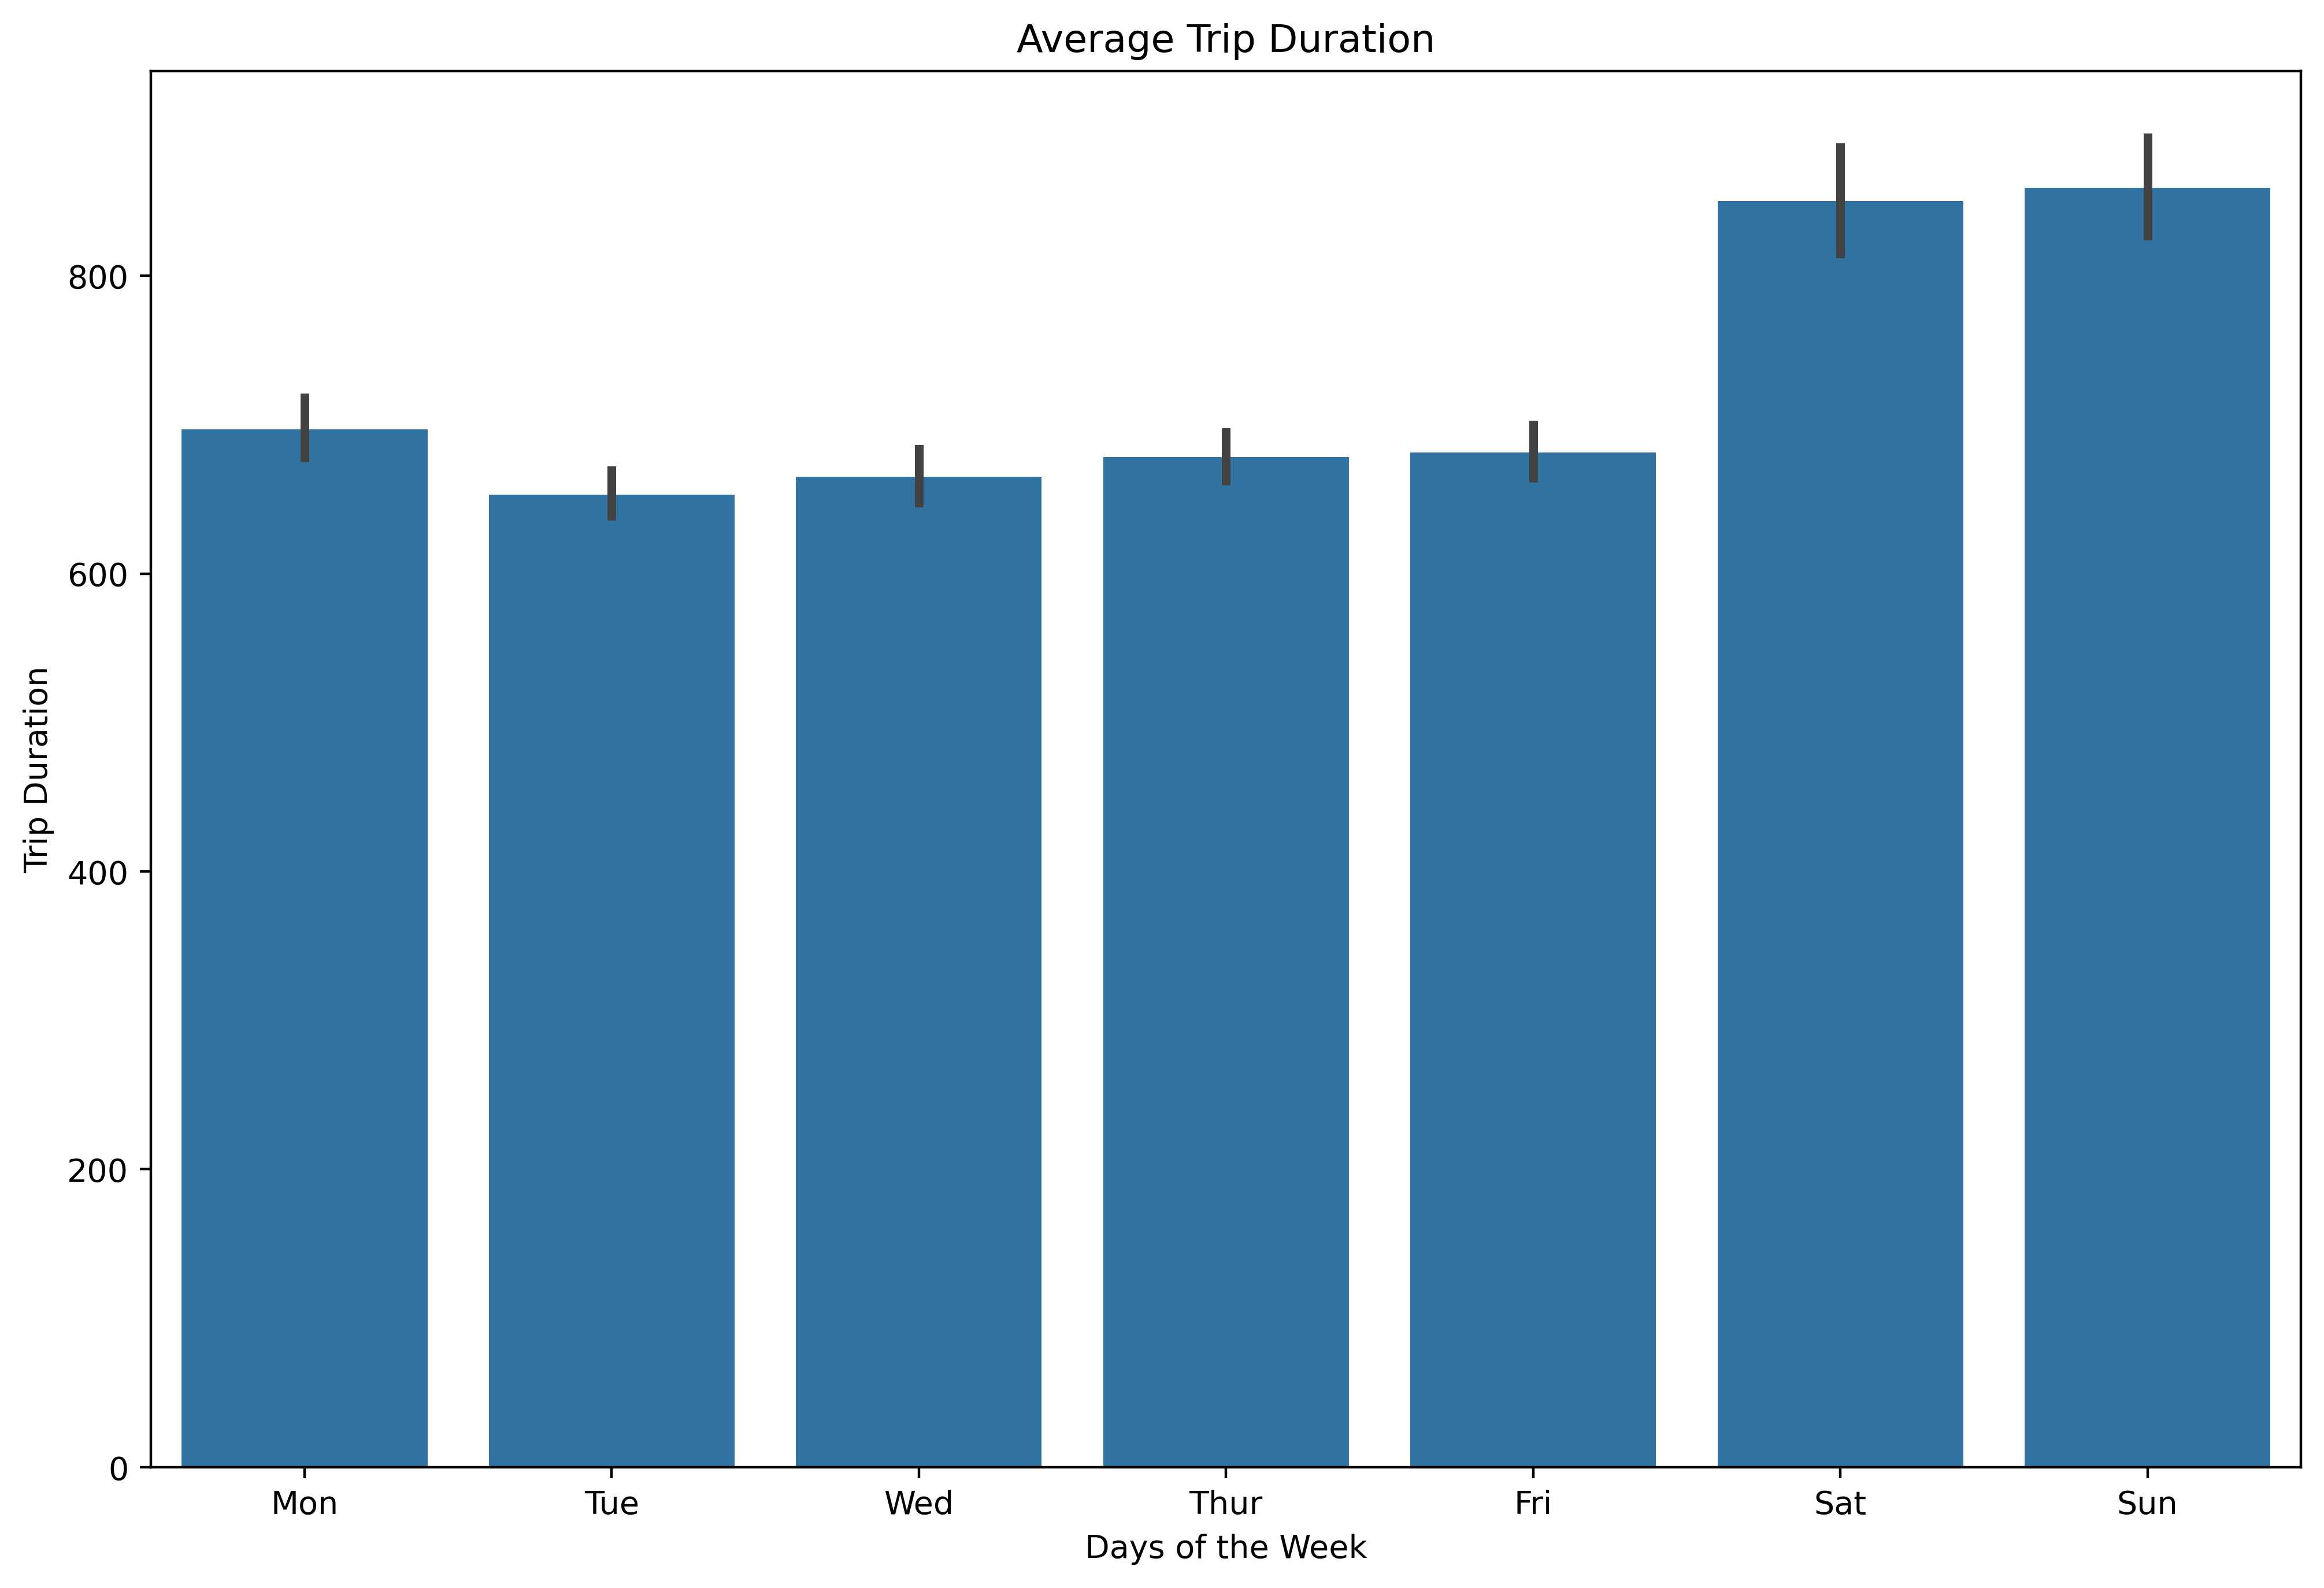

In [37]:
sb.barplot(x = ride_data_copy.start_time.dt.day_of_week, y=ride_data_copy.duration_sec, color=base_color)
plt.title("Average Trip Duration")
plt.xlabel("Days of the Week")
plt.ylabel('Trip Duration')
plt.xticks(np.arange(0,7), days);

**Observation**<br>
>Weekend trips take longer compared to trips taken on other days of the week. Most visits to family occur on the weekend and this might be the cause of this.

#### Which user type takes longer trips?

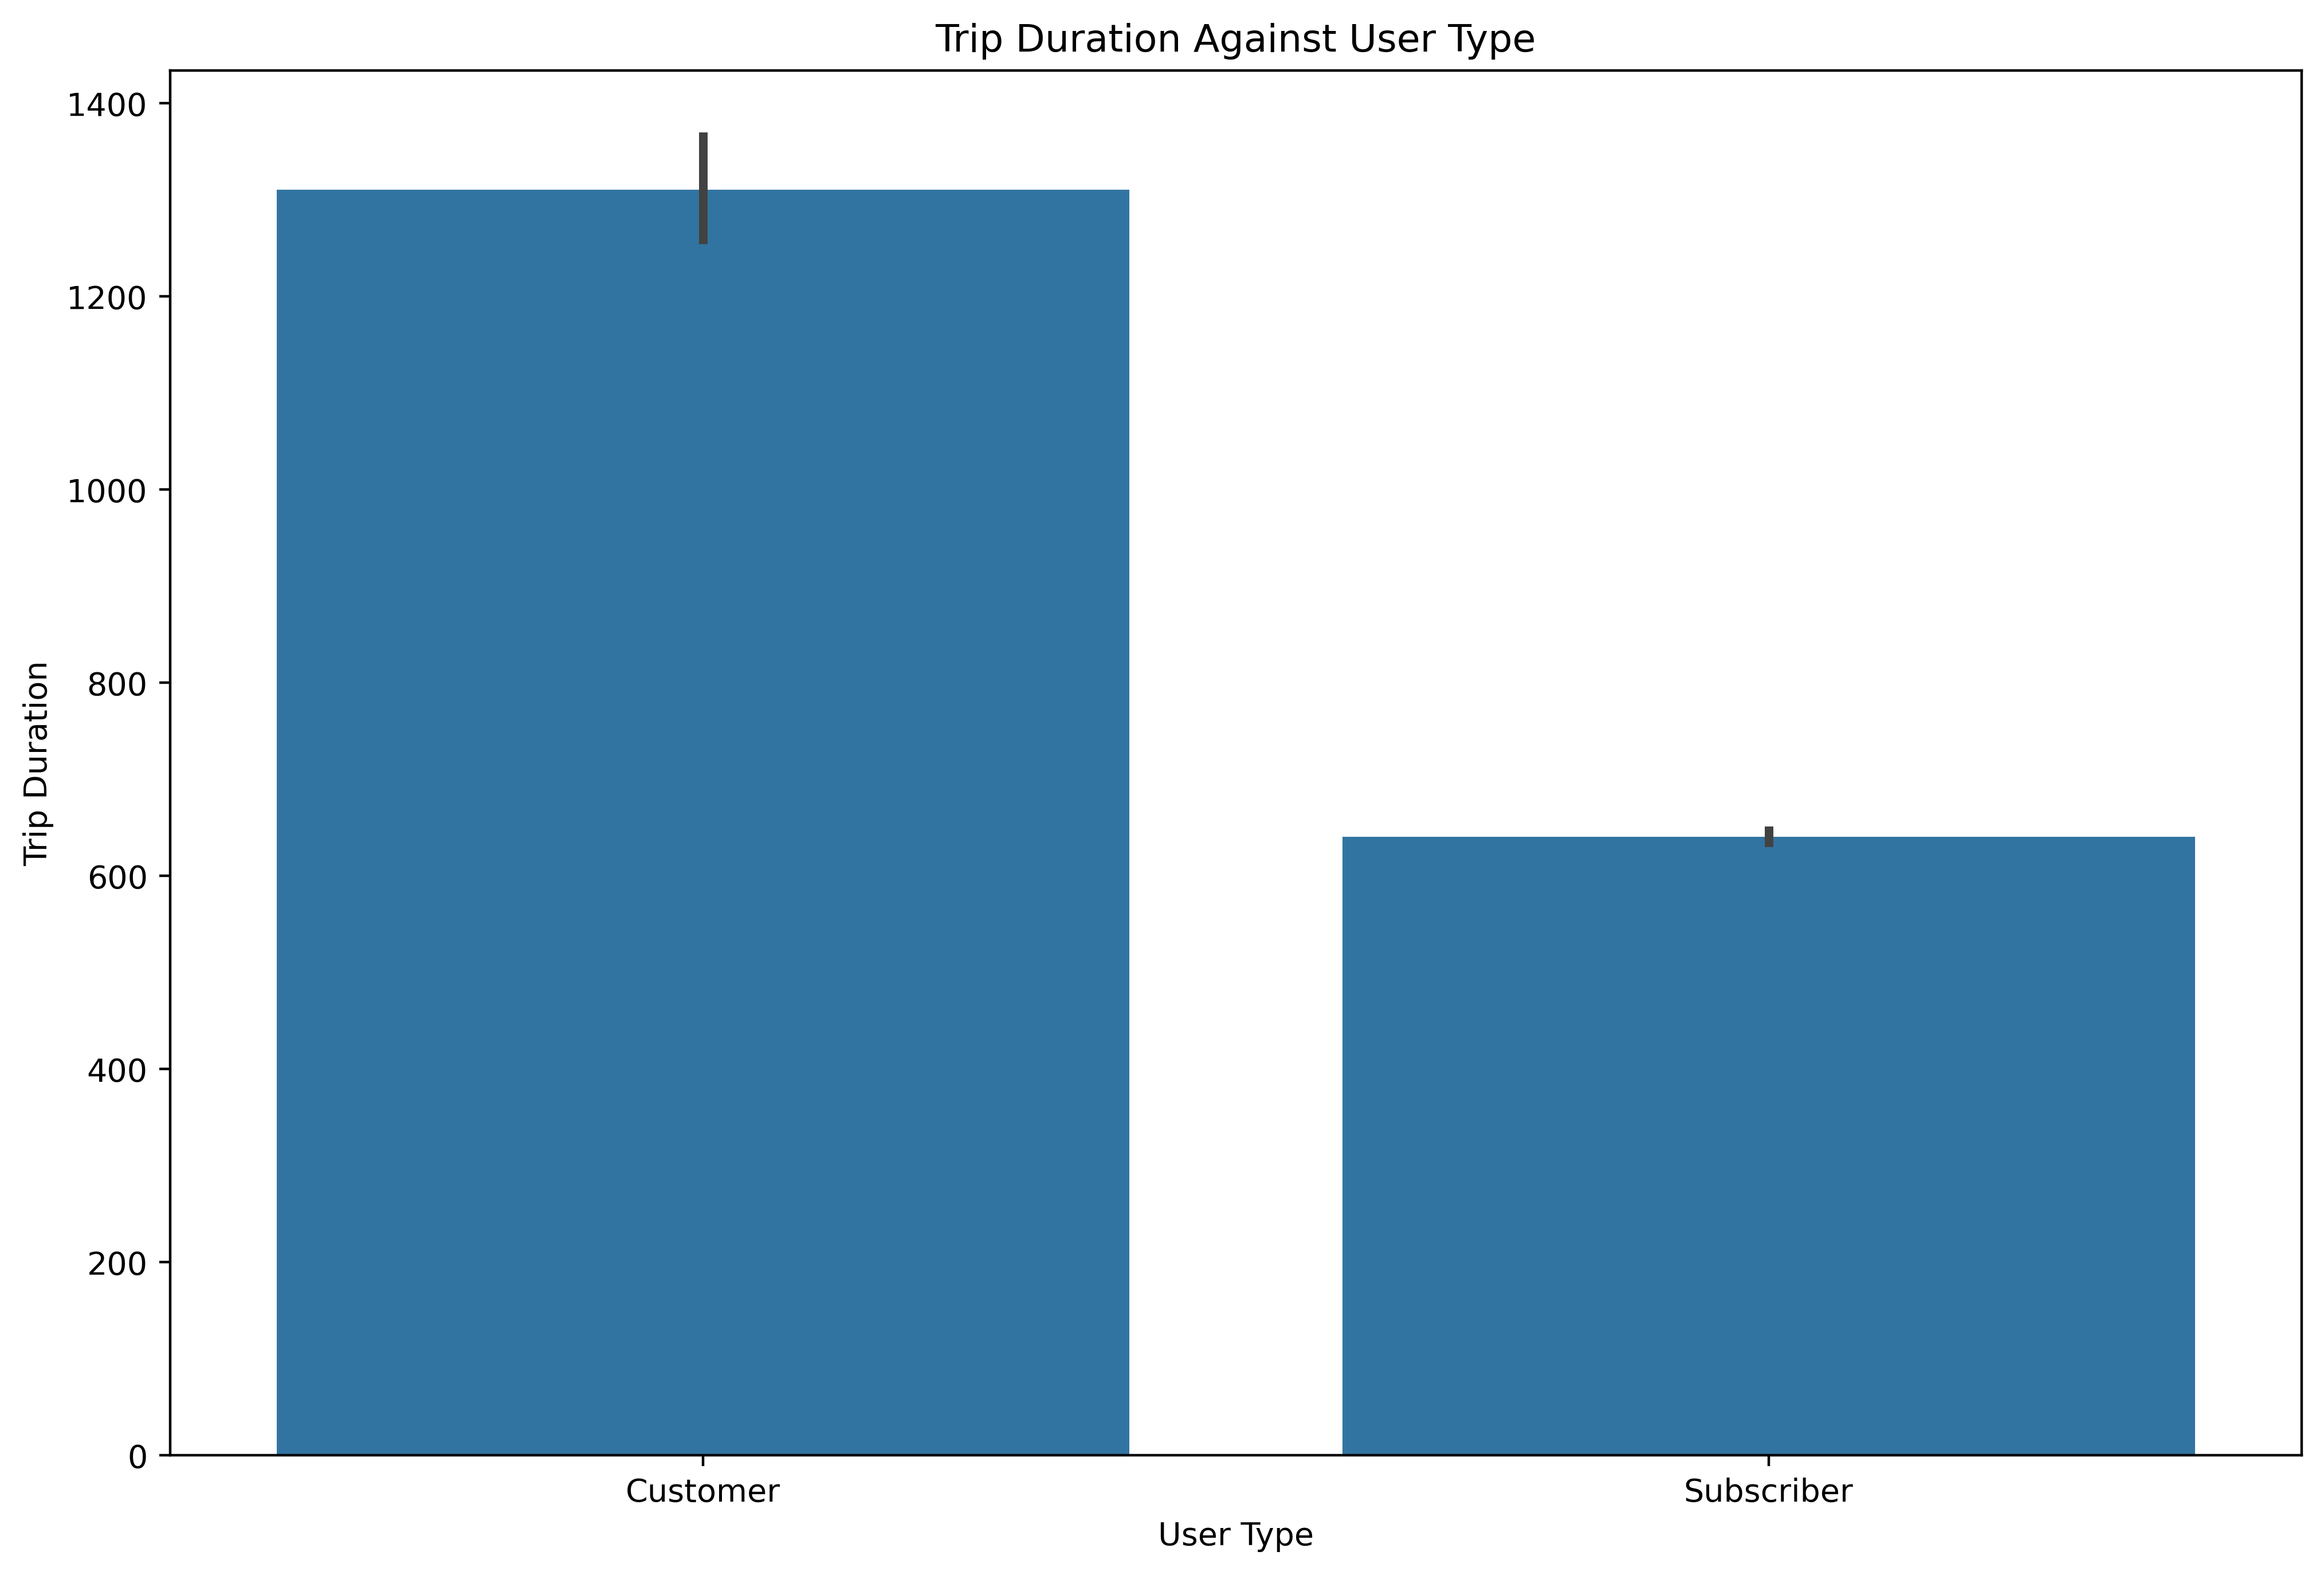

In [38]:
sb.barplot(x='user_type', y='duration_sec', data=ride_data_copy, color=base_color)
plt.title("Trip Duration Against User Type")
plt.xlabel("User Type")
plt.ylabel('Trip Duration');

**Observation**<br>
>Although there are more subscribers than customers, the customer riders trips take a longer duration than the subscribers.

#### Which user types shares more bikes for trips?

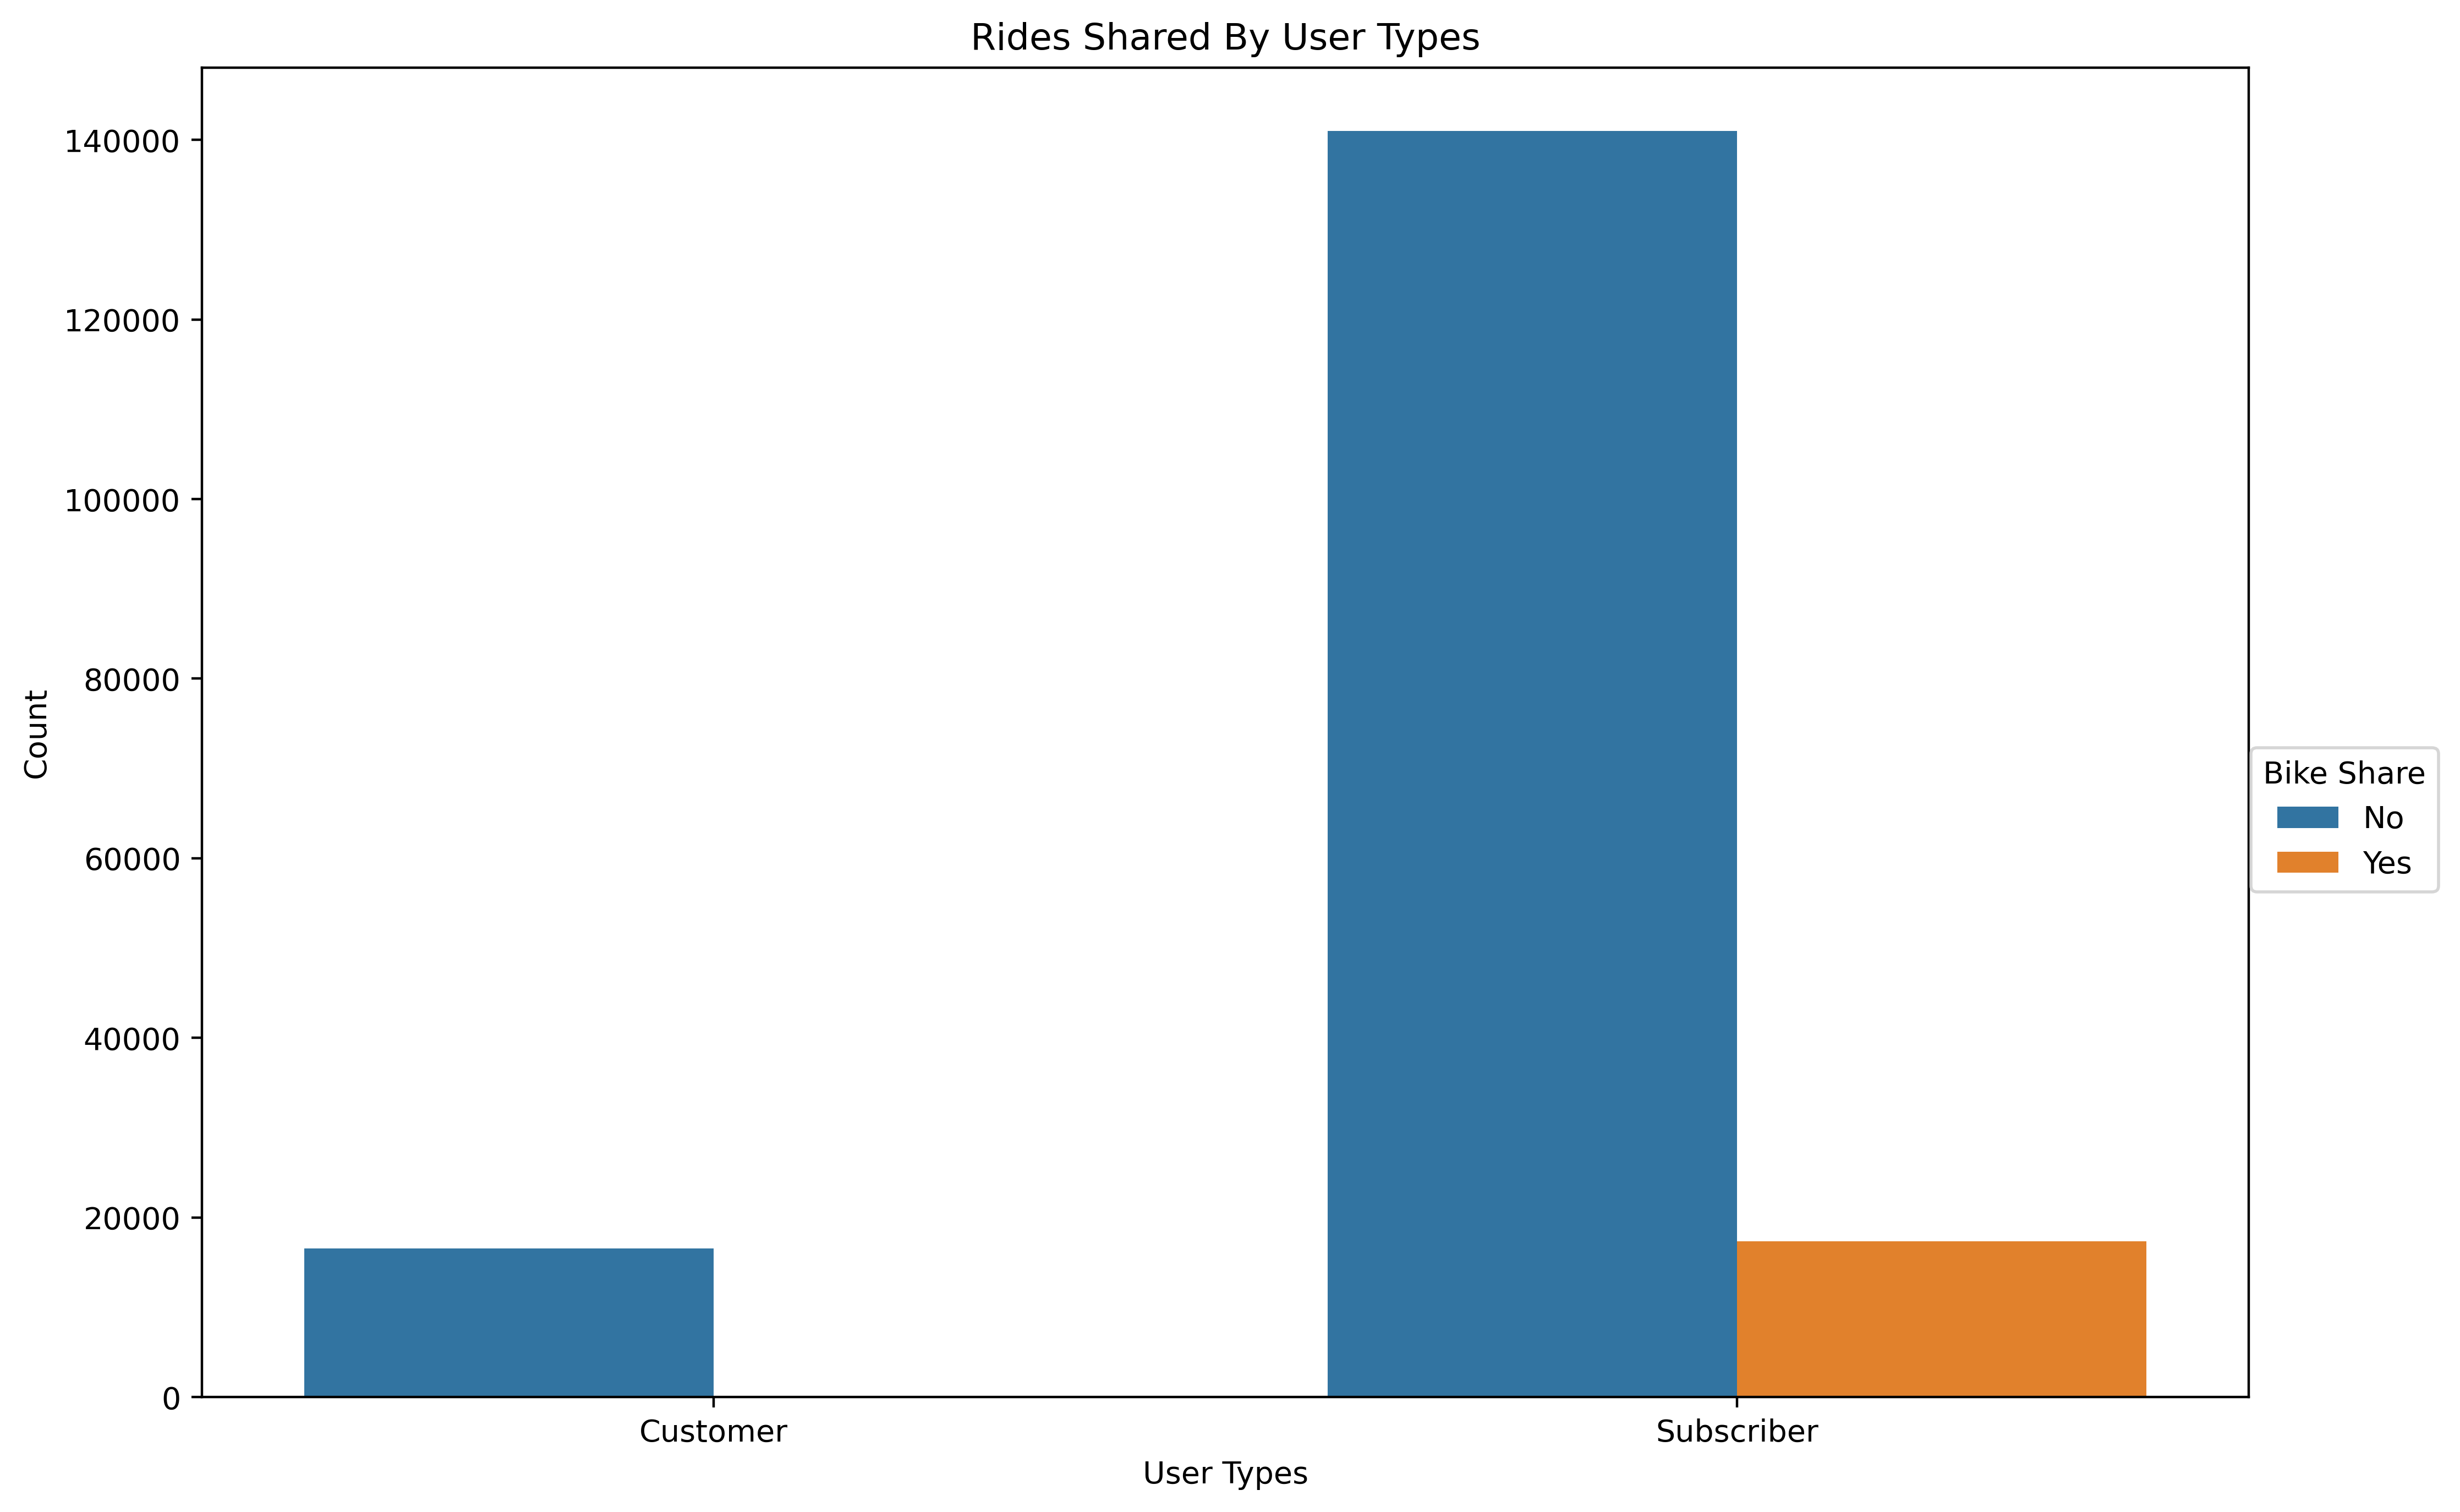

In [39]:
sb.countplot(x='user_type', hue='bike_share_for_all_trip', data=ride_data_copy)
plt.legend(title='Bike Share', bbox_to_anchor=(1.1,0.5))
plt.xlabel("User Types")
plt.ylabel("Count")
plt.title("Rides Shared By User Types");

**Observation**<br>
>From the graph above, it seems like only the subscribers are allowed bike share premium right.

## Multivariate Exploration
#### Which user type has the longest trip duration by bike share?

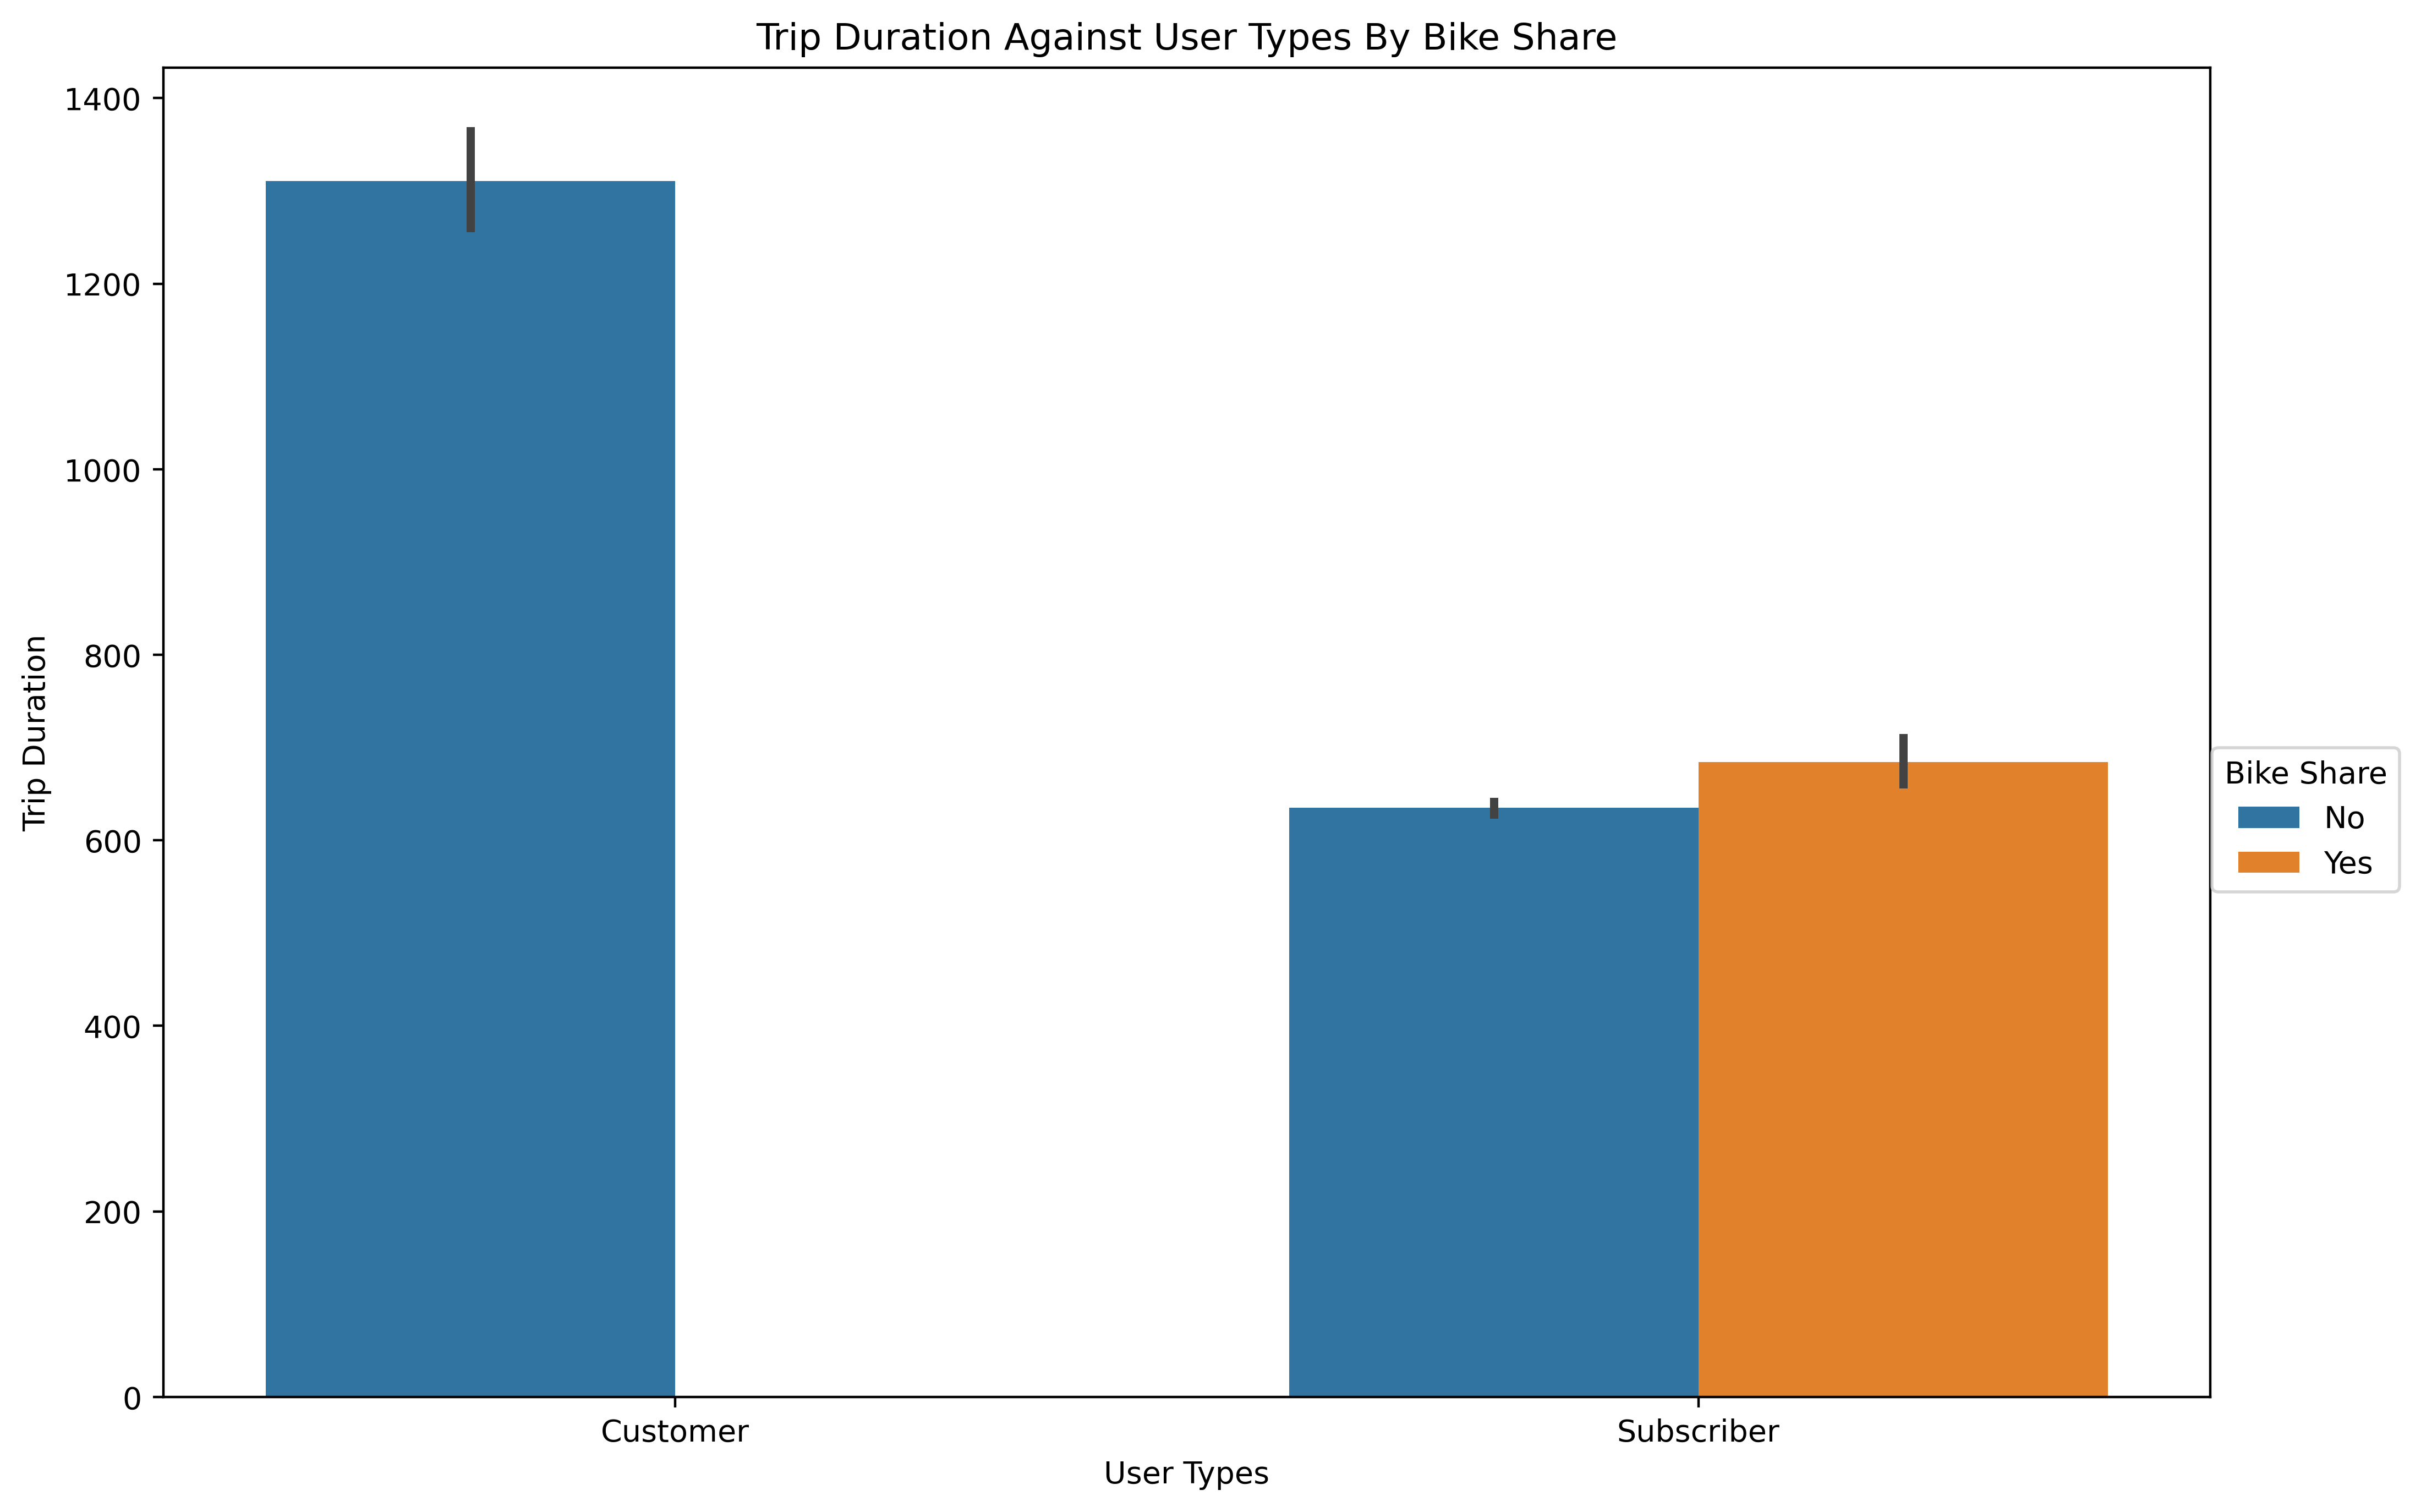

In [40]:
sb.barplot(x='user_type', y='duration_sec', hue='bike_share_for_all_trip', data=ride_data_copy)
plt.legend(title='Bike Share', bbox_to_anchor=(1.1,0.5))
plt.xlabel("User Types")
plt.ylabel("Trip Duration")
plt.title("Trip Duration Against User Types By Bike Share");

**Observation**<br>
>As observed earlier, the customer user type does not seem to have the bike share feature. 
For the subsciber riders, the shared trip on average have longer durations than those not shared.

#### Which user type has the longest trip duration by gender?

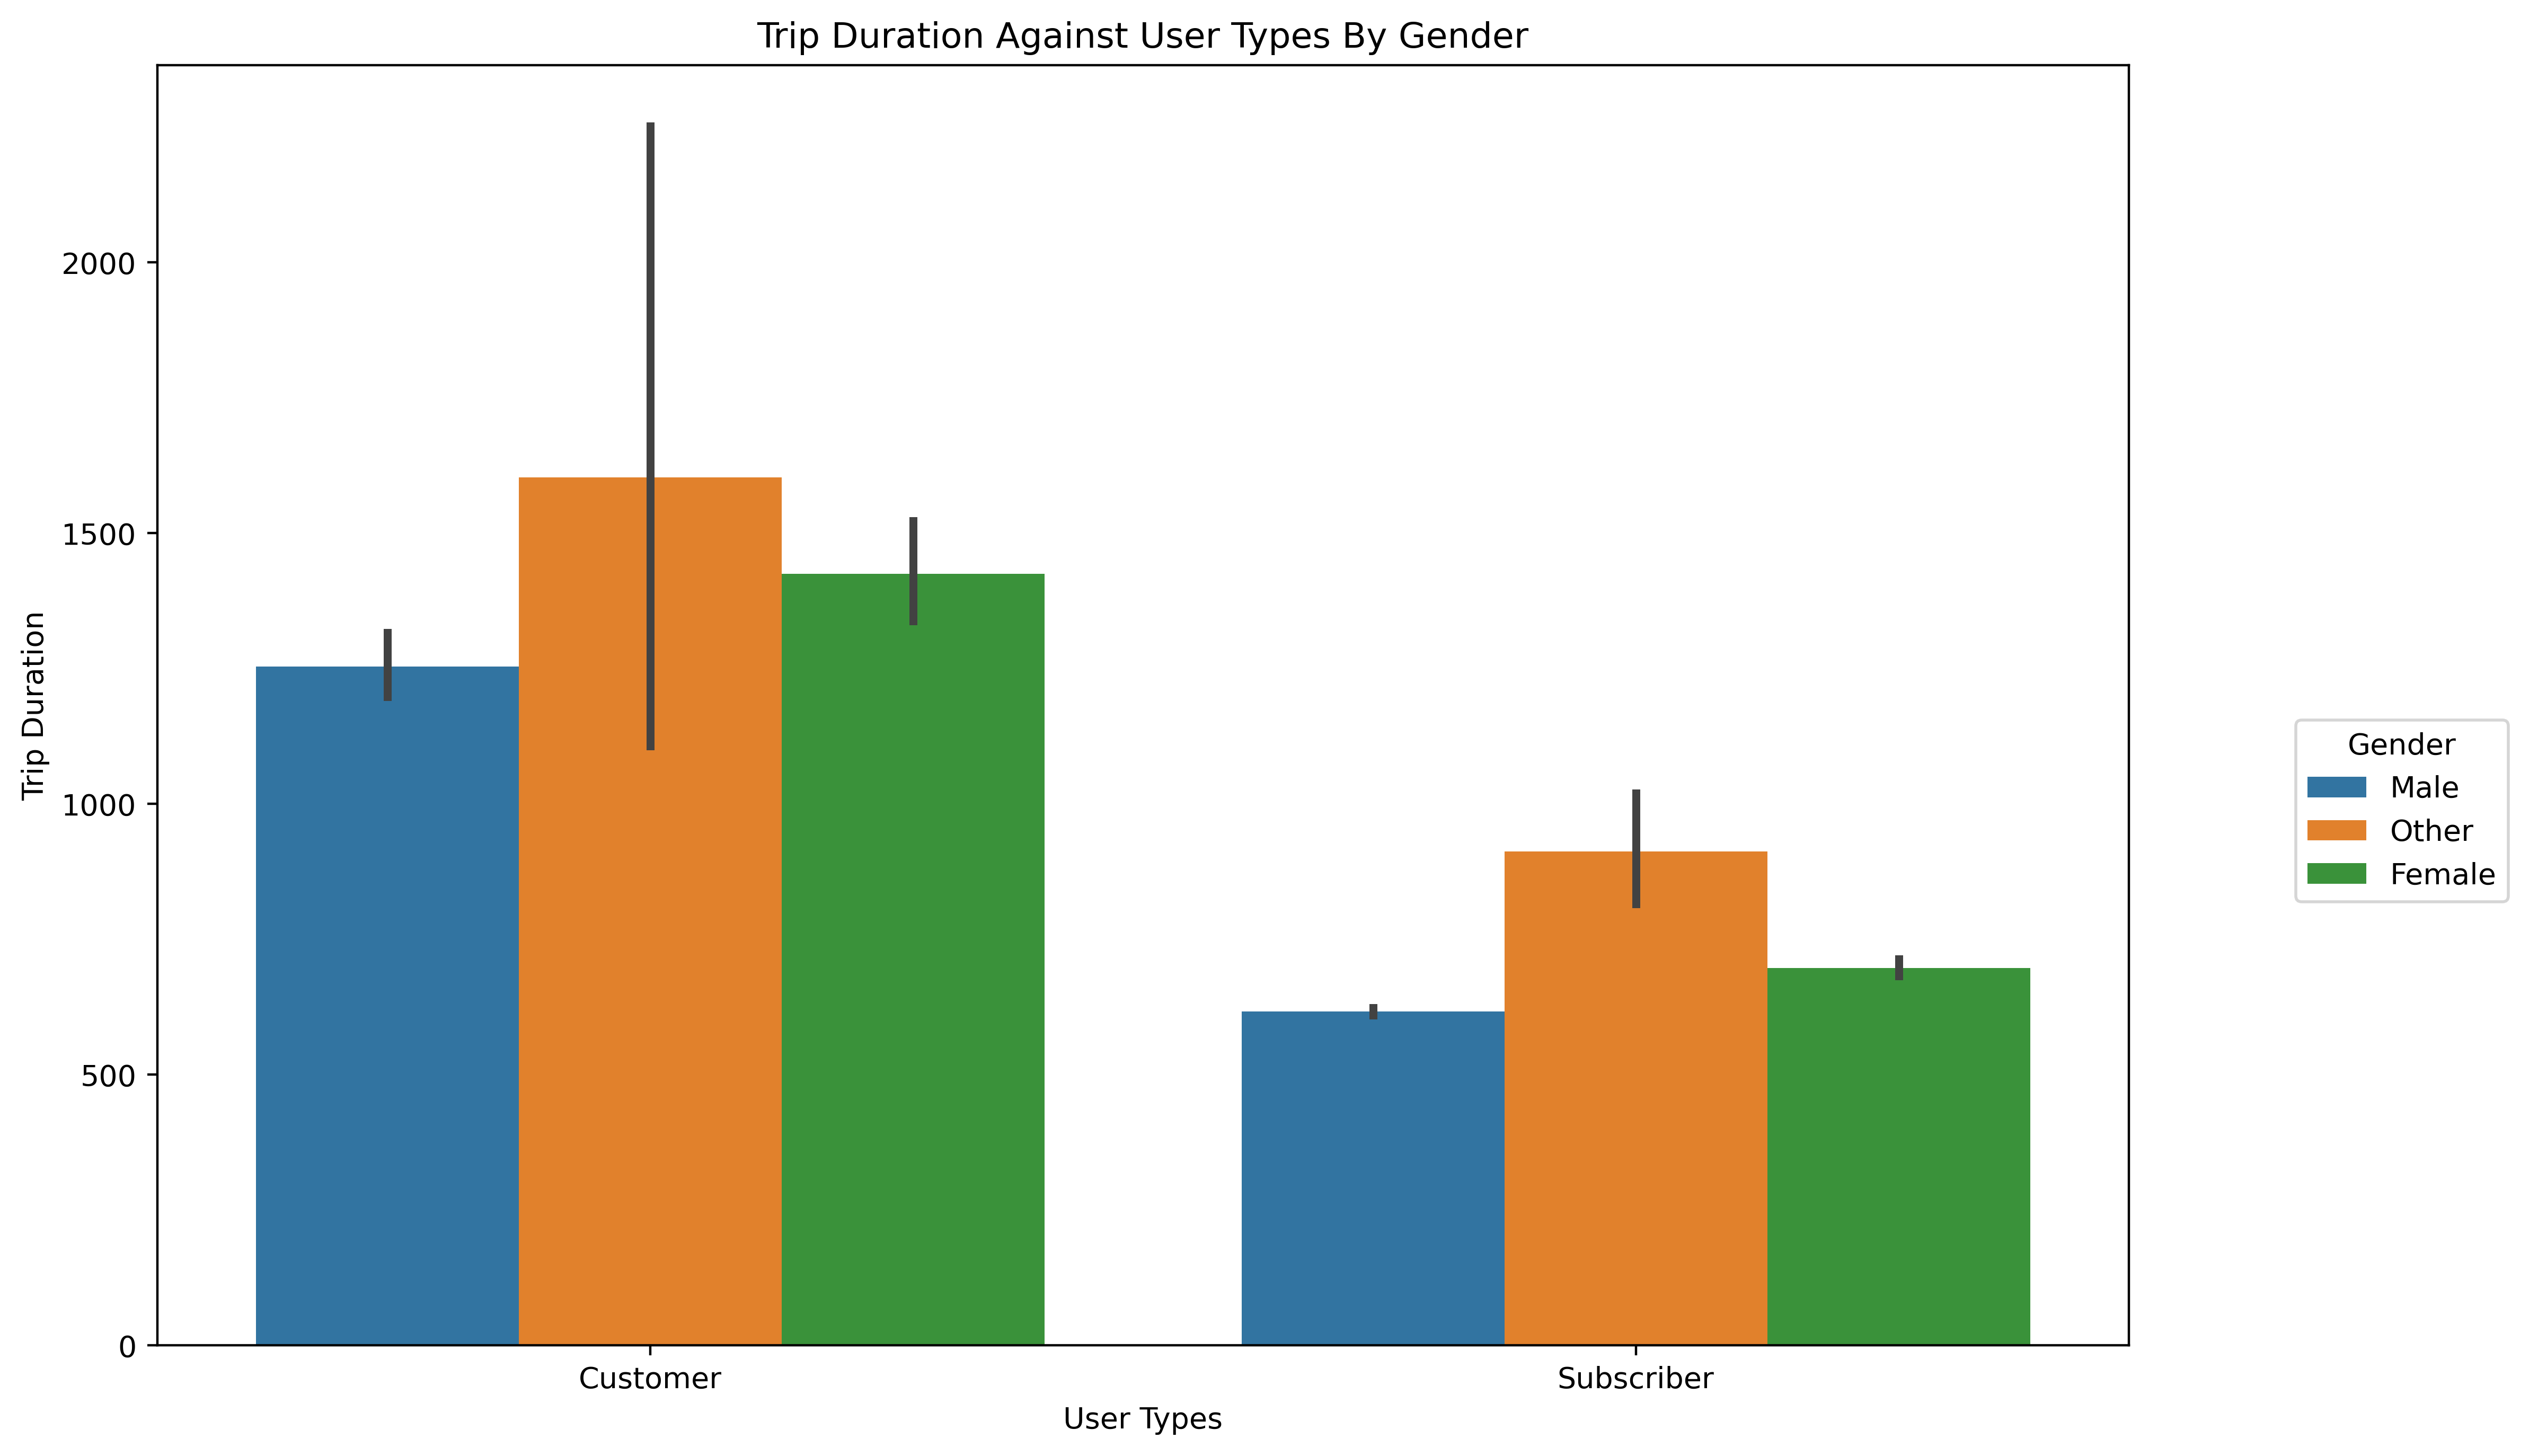

In [41]:
sb.barplot(x='user_type', y='duration_sec', hue='member_gender', data=ride_data_copy)
plt.legend(title='Gender', bbox_to_anchor=(1.2,0.5))
plt.xlabel("User Types")
plt.ylabel("Trip Duration")
plt.title("Trip Duration Against User Types By Gender");

**Observation**<br>
>In the graph above, it can be observed that for both user types, the female riders had longer ride durations than the male riders. For both user types, the other gender riders take longer trips than their counterparts.

#### Which day of the week by user type has the longest trips?

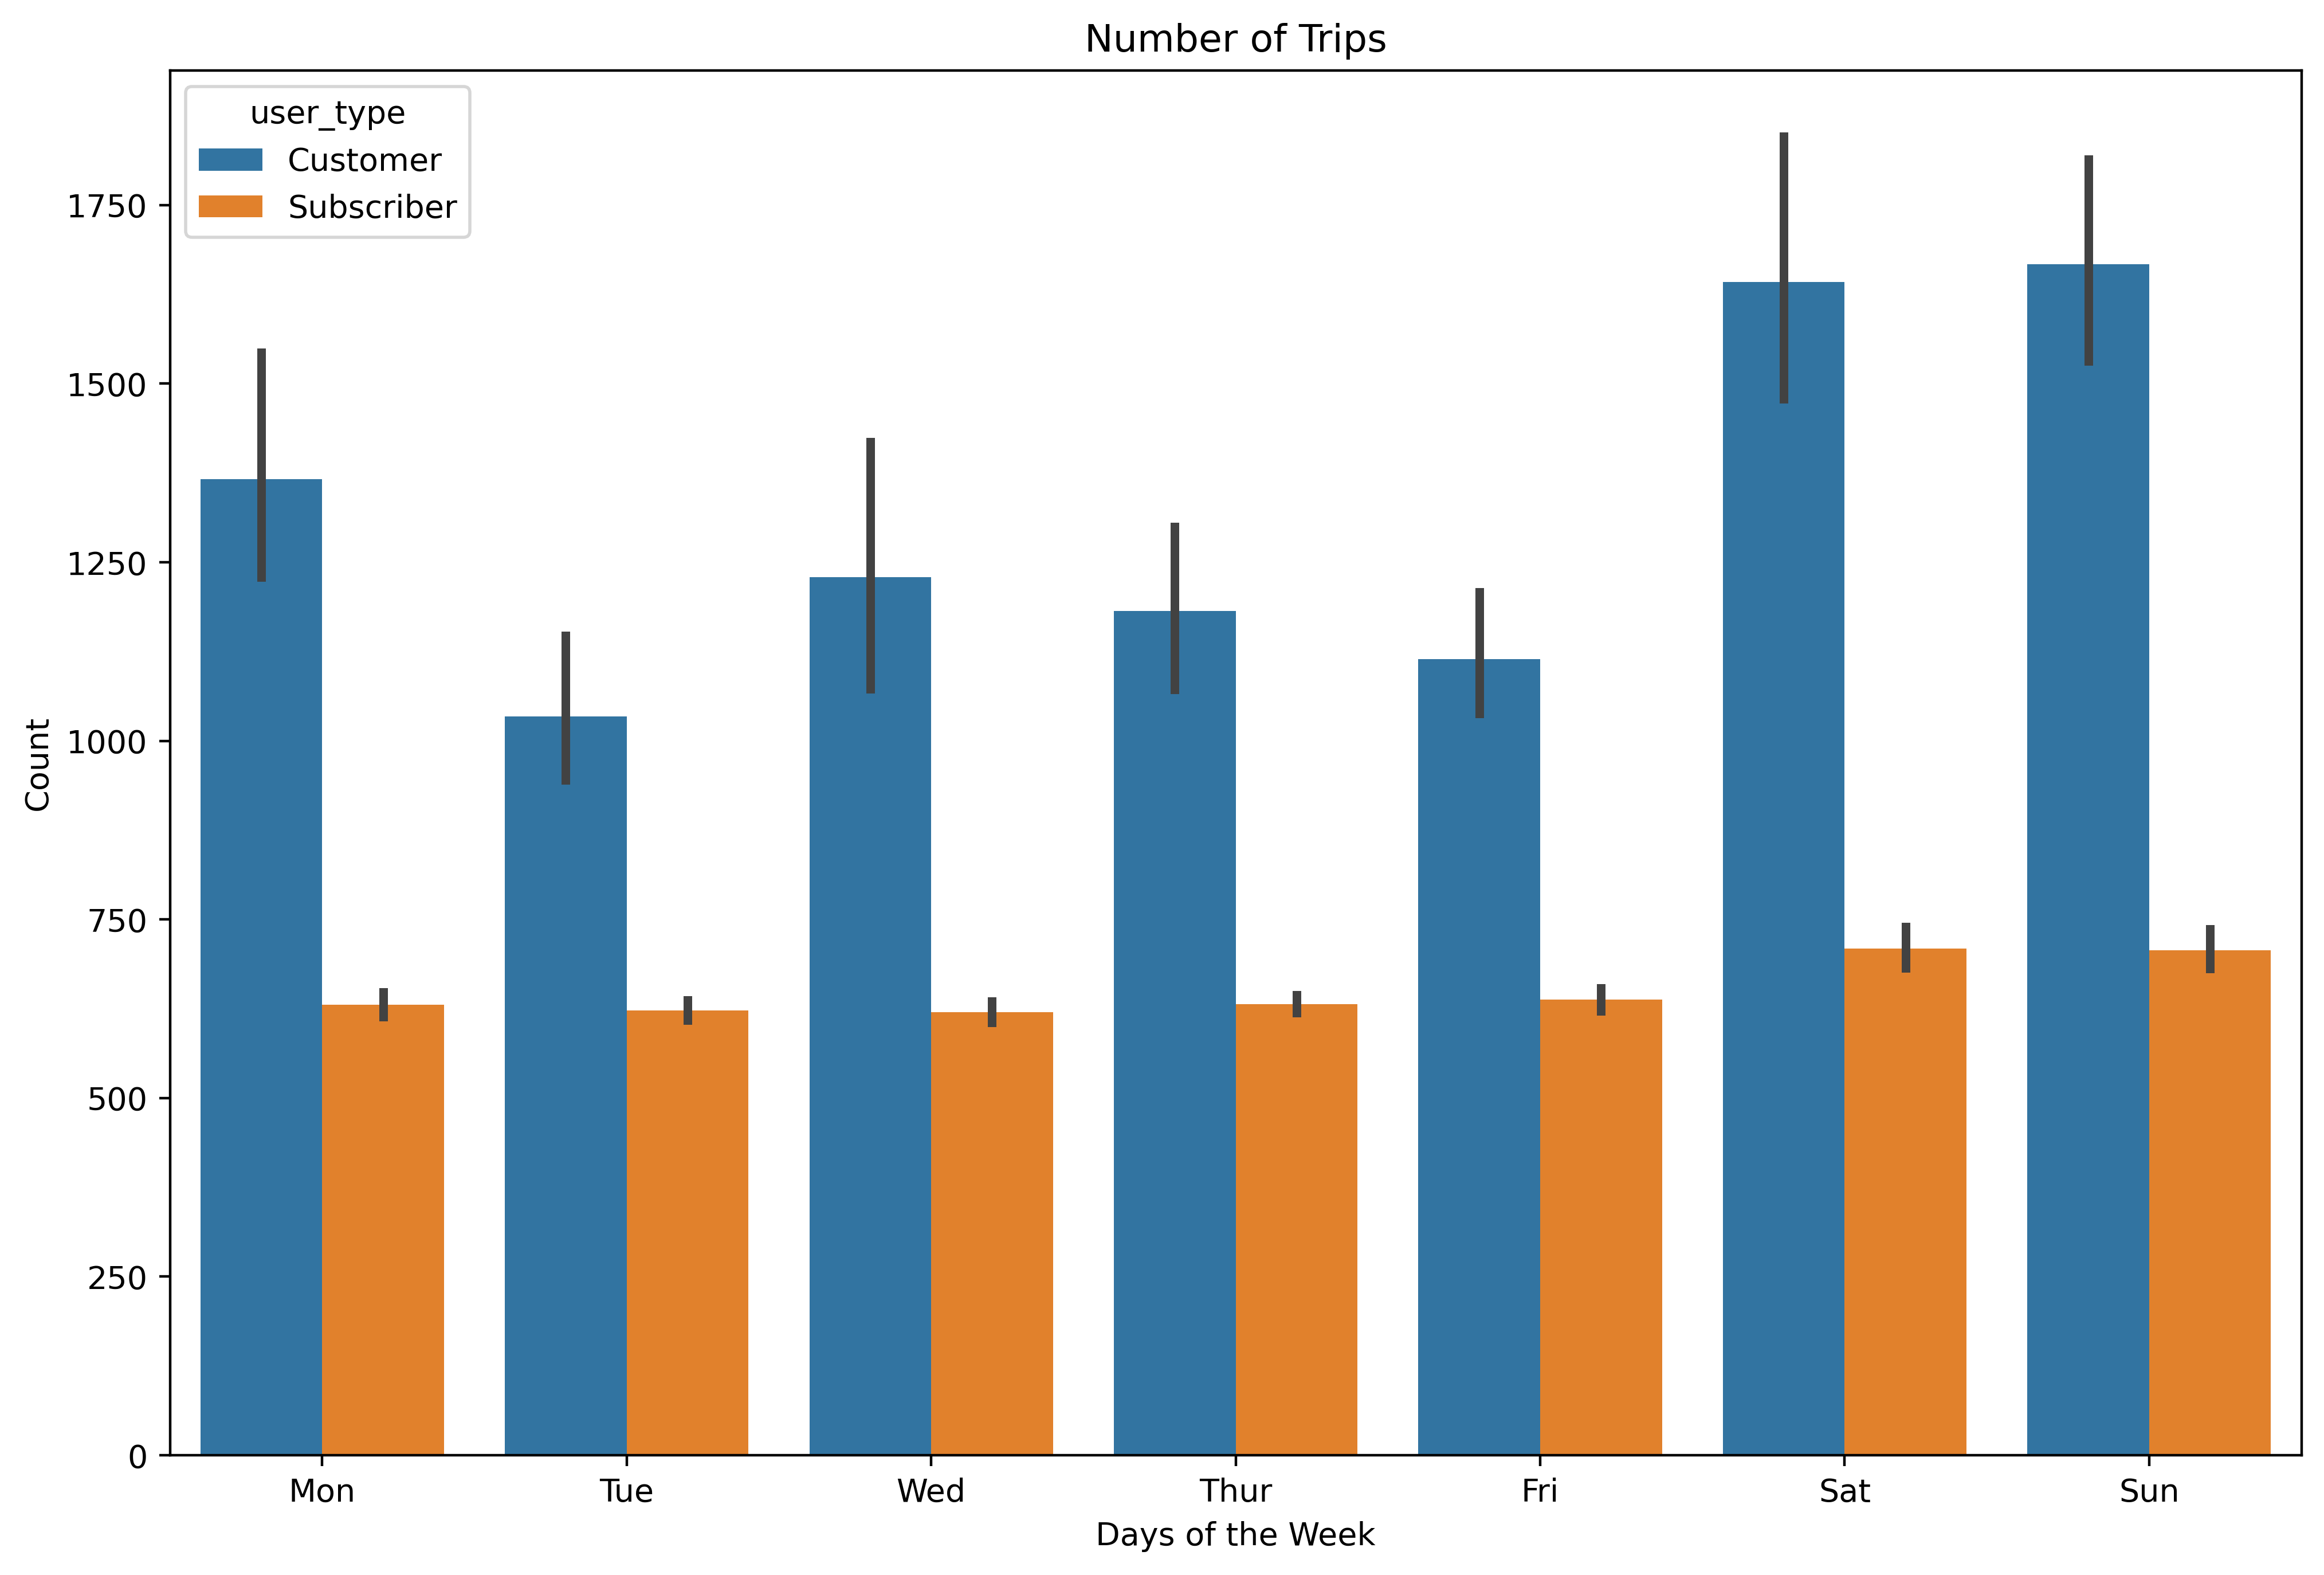

In [42]:
sb.barplot(data = ride_data_copy, x = ride_data_copy.start_time.dt.day_of_week, y='duration_sec',
           hue = 'user_type')
plt.title("Number of Trips")
plt.xlabel("Days of the Week")
plt.ylabel('Count')
plt.xticks(np.arange(0,7), days);

**Observation**<br>
>Due to the very short trip duration we can conclude that the subscriber user type do not travel long distances. The day of the week with longest trips is sunday for both user types.

## Conclusions
>The dataset contains rides for the months of February and March 2019 with the average duration for all trips been 500 seconds, having above 74% of the trips embarked on by male riders. The most number of trips were taken on Thursdays while the Weekends have the least number of trips taken as most people prefer to rest at home during the weekends. The most trips were taken between 8 and 9 in the morning and 5 and 6 in the evening which could be as a result of the work rush and return. The active riders are between the ages of 18 and 50 years. There is a decrease in the average ride durations as ages increase above 50 years, which could imply that older riders prefer shorter trips due to their body strength or agility to ride for longer periods. Above 90% of the trips were taken by subscribers, it could be observed that less than 10% of the trips were shared  and this was observed for only the subscribers, which could imply that only the subscribers are allowed to share bikes on trips.

**Saving the cleaned dataframe**

In [43]:
ride_data_copy.to_csv("cleaned_trip_data.csv",index=False)